In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams.update({'figure.figsize': (18, 8), 'figure.dpi': 100})

Using TensorFlow backend.


In [2]:
df = pd.read_csv('iig_bharati.csv')
df.obstime = pd.to_datetime(df.obstime)
df.set_index('obstime', inplace=True)

df=df[df.tempr>-100]
df.head()

tempr     rh    ws      wd      ap
obstime                                                
2012-01-28 12:00:00  -0.33  34.24  4.51  155.95  982.00
2012-01-28 13:00:00  -0.44  38.07  4.19  149.70  982.02
2012-01-28 14:00:00   0.02  40.88  4.06  149.46  981.18
2012-01-28 15:00:00  -0.15  43.44  2.95  118.61  980.60
2012-01-28 16:00:00   0.06  44.14  3.14  134.17  979.63

In [3]:

#df_month = df.resample('M').mean()
#temp = df_month[['temp']]
#temp.dropna(inplace=True)

In [4]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
#df=df.last(30)
raw_values = df['tempr'].values
# print(raw_values)

In [6]:
n_steps = 24
X, y = split_sequence(raw_values, n_steps)
for i in range(len(raw_values)-n_steps):
    print( X[i], y[i])
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

[-0.33 -0.44  0.02 -0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61
 -3.85 -4.44 -5.11 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79] -1.13
[-0.44  0.02 -0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85
 -4.44 -5.11 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13] 0.52
[ 0.02 -0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44
 -5.11 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52] 1.12
[-0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11
 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52  1.12] 1.12
[ 0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11 -5.21
 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52  1.12  1.12] 0.99
[-0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11 -5.21 -5.06
 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52  1.12  1.12  0.99] 0.63
[-0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11 -5.21 -5.06 -4.98
 -4.43 -3.88 -

 -0.41 -0.09 -0.03 -0.13  0.17  0.    0.06 -0.82 -2.92 -4.02 -4.15 -4.36] -5.43
[-3.12 -2.48 -3.83 -4.63 -4.74 -4.59 -4.29 -3.   -1.65 -1.27 -0.79 -0.41
 -0.09 -0.03 -0.13  0.17  0.    0.06 -0.82 -2.92 -4.02 -4.15 -4.36 -5.43] -5.5
[-2.48 -3.83 -4.63 -4.74 -4.59 -4.29 -3.   -1.65 -1.27 -0.79 -0.41 -0.09
 -0.03 -0.13  0.17  0.    0.06 -0.82 -2.92 -4.02 -4.15 -4.36 -5.43 -5.5 ] -5.25
[-3.83 -4.63 -4.74 -4.59 -4.29 -3.   -1.65 -1.27 -0.79 -0.41 -0.09 -0.03
 -0.13  0.17  0.    0.06 -0.82 -2.92 -4.02 -4.15 -4.36 -5.43 -5.5  -5.25] -5.4
[-4.63 -4.74 -4.59 -4.29 -3.   -1.65 -1.27 -0.79 -0.41 -0.09 -0.03 -0.13
  0.17  0.    0.06 -0.82 -2.92 -4.02 -4.15 -4.36 -5.43 -5.5  -5.25 -5.4 ] -5.67
[-4.74 -4.59 -4.29 -3.   -1.65 -1.27 -0.79 -0.41 -0.09 -0.03 -0.13  0.17
  0.    0.06 -0.82 -2.92 -4.02 -4.15 -4.36 -5.43 -5.5  -5.25 -5.4  -5.67] -5.48
[-4.59 -4.29 -3.   -1.65 -1.27 -0.79 -0.41 -0.09 -0.03 -0.13  0.17  0.
  0.06 -0.82 -2.92 -4.02 -4.15 -4.36 -5.43 -5.5  -5.25 -5.4  -5.67 -5.48] -4.7
[-4.29 

 -2.29 -2.62 -2.89 -3.32 -3.98 -4.95 -5.26 -5.46 -5.38 -5.54 -5.72 -6.  ] -6.4
[-2.66 -2.52 -2.35 -2.41 -3.8  -3.26 -2.14 -1.53 -1.62 -2.03 -2.55 -2.29
 -2.62 -2.89 -3.32 -3.98 -4.95 -5.26 -5.46 -5.38 -5.54 -5.72 -6.   -6.4 ] -6.07
[-2.52 -2.35 -2.41 -3.8  -3.26 -2.14 -1.53 -1.62 -2.03 -2.55 -2.29 -2.62
 -2.89 -3.32 -3.98 -4.95 -5.26 -5.46 -5.38 -5.54 -5.72 -6.   -6.4  -6.07] -5.85
[-2.35 -2.41 -3.8  -3.26 -2.14 -1.53 -1.62 -2.03 -2.55 -2.29 -2.62 -2.89
 -3.32 -3.98 -4.95 -5.26 -5.46 -5.38 -5.54 -5.72 -6.   -6.4  -6.07 -5.85] -5.35
[-2.41 -3.8  -3.26 -2.14 -1.53 -1.62 -2.03 -2.55 -2.29 -2.62 -2.89 -3.32
 -3.98 -4.95 -5.26 -5.46 -5.38 -5.54 -5.72 -6.   -6.4  -6.07 -5.85 -5.35] -4.3
[-3.8  -3.26 -2.14 -1.53 -1.62 -2.03 -2.55 -2.29 -2.62 -2.89 -3.32 -3.98
 -4.95 -5.26 -5.46 -5.38 -5.54 -5.72 -6.   -6.4  -6.07 -5.85 -5.35 -4.3 ] -3.27
[-3.26 -2.14 -1.53 -1.62 -2.03 -2.55 -2.29 -2.62 -2.89 -3.32 -3.98 -4.95
 -5.26 -5.46 -5.38 -5.54 -5.72 -6.   -6.4  -6.07 -5.85 -5.35 -4.3  -3.27] -3.25
[-2.

 -0.02  0.   -0.46 -0.84 -1.06 -1.42 -1.54 -1.88 -1.97 -1.91 -1.78 -1.93] -2.31
[-0.05 -0.07 -0.26 -0.39 -0.67 -0.94 -1.09 -0.98 -0.54  0.01 -0.04 -0.02
  0.   -0.46 -0.84 -1.06 -1.42 -1.54 -1.88 -1.97 -1.91 -1.78 -1.93 -2.31] -2.45
[-0.07 -0.26 -0.39 -0.67 -0.94 -1.09 -0.98 -0.54  0.01 -0.04 -0.02  0.
 -0.46 -0.84 -1.06 -1.42 -1.54 -1.88 -1.97 -1.91 -1.78 -1.93 -2.31 -2.45] -2.58
[-0.26 -0.39 -0.67 -0.94 -1.09 -0.98 -0.54  0.01 -0.04 -0.02  0.   -0.46
 -0.84 -1.06 -1.42 -1.54 -1.88 -1.97 -1.91 -1.78 -1.93 -2.31 -2.45 -2.58] -2.91
[-0.39 -0.67 -0.94 -1.09 -0.98 -0.54  0.01 -0.04 -0.02  0.   -0.46 -0.84
 -1.06 -1.42 -1.54 -1.88 -1.97 -1.91 -1.78 -1.93 -2.31 -2.45 -2.58 -2.91] -3.55
[-0.67 -0.94 -1.09 -0.98 -0.54  0.01 -0.04 -0.02  0.   -0.46 -0.84 -1.06
 -1.42 -1.54 -1.88 -1.97 -1.91 -1.78 -1.93 -2.31 -2.45 -2.58 -2.91 -3.55] -5.02
[-0.94 -1.09 -0.98 -0.54  0.01 -0.04 -0.02  0.   -0.46 -0.84 -1.06 -1.42
 -1.54 -1.88 -1.97 -1.91 -1.78 -1.93 -2.31 -2.45 -2.58 -2.91 -3.55 -5.02] -6.08
[-1.

 -10.32 -10.58 -11.17 -11.11] -11.29
[ -9.33  -9.1   -8.64  -8.35  -7.83  -7.22  -7.04  -6.86  -6.66  -6.5
  -6.53  -7.13  -7.66  -8.3   -9.11  -9.65  -9.82 -10.21  -9.98 -10.32
 -10.58 -11.17 -11.11 -11.29] -11.44
[ -9.1   -8.64  -8.35  -7.83  -7.22  -7.04  -6.86  -6.66  -6.5   -6.53
  -7.13  -7.66  -8.3   -9.11  -9.65  -9.82 -10.21  -9.98 -10.32 -10.58
 -11.17 -11.11 -11.29 -11.44] -11.24
[ -8.64  -8.35  -7.83  -7.22  -7.04  -6.86  -6.66  -6.5   -6.53  -7.13
  -7.66  -8.3   -9.11  -9.65  -9.82 -10.21  -9.98 -10.32 -10.58 -11.17
 -11.11 -11.29 -11.44 -11.24] -10.2
[ -8.35  -7.83  -7.22  -7.04  -6.86  -6.66  -6.5   -6.53  -7.13  -7.66
  -8.3   -9.11  -9.65  -9.82 -10.21  -9.98 -10.32 -10.58 -11.17 -11.11
 -11.29 -11.44 -11.24 -10.2 ] -9.3
[ -7.83  -7.22  -7.04  -6.86  -6.66  -6.5   -6.53  -7.13  -7.66  -8.3
  -9.11  -9.65  -9.82 -10.21  -9.98 -10.32 -10.58 -11.17 -11.11 -11.29
 -11.44 -11.24 -10.2   -9.3 ] -8.5
[ -7.22  -7.04  -6.86  -6.66  -6.5   -6.53  -7.13  -7.66  -8.3   -9.11
  -9

 -6.41 -6.1  -6.06 -5.86 -6.24 -6.36 -6.27 -6.31 -6.78 -7.08 -7.19 -7.11] -6.51
[-5.33 -5.18 -5.58 -6.47 -6.81 -6.71 -6.71 -6.85 -6.96 -6.69 -6.44 -6.41
 -6.1  -6.06 -5.86 -6.24 -6.36 -6.27 -6.31 -6.78 -7.08 -7.19 -7.11 -6.51] -6.14
[-5.18 -5.58 -6.47 -6.81 -6.71 -6.71 -6.85 -6.96 -6.69 -6.44 -6.41 -6.1
 -6.06 -5.86 -6.24 -6.36 -6.27 -6.31 -6.78 -7.08 -7.19 -7.11 -6.51 -6.14] -6.18
[-5.58 -6.47 -6.81 -6.71 -6.71 -6.85 -6.96 -6.69 -6.44 -6.41 -6.1  -6.06
 -5.86 -6.24 -6.36 -6.27 -6.31 -6.78 -7.08 -7.19 -7.11 -6.51 -6.14 -6.18] -5.65
[-6.47 -6.81 -6.71 -6.71 -6.85 -6.96 -6.69 -6.44 -6.41 -6.1  -6.06 -5.86
 -6.24 -6.36 -6.27 -6.31 -6.78 -7.08 -7.19 -7.11 -6.51 -6.14 -6.18 -5.65] -4.75
[-6.81 -6.71 -6.71 -6.85 -6.96 -6.69 -6.44 -6.41 -6.1  -6.06 -5.86 -6.24
 -6.36 -6.27 -6.31 -6.78 -7.08 -7.19 -7.11 -6.51 -6.14 -6.18 -5.65 -4.75] -4.83
[-6.71 -6.71 -6.85 -6.96 -6.69 -6.44 -6.41 -6.1  -6.06 -5.86 -6.24 -6.36
 -6.27 -6.31 -6.78 -7.08 -7.19 -7.11 -6.51 -6.14 -6.18 -5.65 -4.75 -4.83] -6.96
[-6

 -10.83 -11.77 -12.83 -13.14] -12.98
[-12.72 -12.79 -13.1  -12.73 -12.46 -12.47 -12.66 -12.43 -12.24 -11.83
 -11.61 -11.36 -11.67 -11.1  -10.93 -10.61 -10.09  -9.73  -9.23 -10.83
 -11.77 -12.83 -13.14 -12.98] -12.89
[-12.79 -13.1  -12.73 -12.46 -12.47 -12.66 -12.43 -12.24 -11.83 -11.61
 -11.36 -11.67 -11.1  -10.93 -10.61 -10.09  -9.73  -9.23 -10.83 -11.77
 -12.83 -13.14 -12.98 -12.89] -13.19
[-13.1  -12.73 -12.46 -12.47 -12.66 -12.43 -12.24 -11.83 -11.61 -11.36
 -11.67 -11.1  -10.93 -10.61 -10.09  -9.73  -9.23 -10.83 -11.77 -12.83
 -13.14 -12.98 -12.89 -13.19] -13.53
[-12.73 -12.46 -12.47 -12.66 -12.43 -12.24 -11.83 -11.61 -11.36 -11.67
 -11.1  -10.93 -10.61 -10.09  -9.73  -9.23 -10.83 -11.77 -12.83 -13.14
 -12.98 -12.89 -13.19 -13.53] -13.99
[-12.46 -12.47 -12.66 -12.43 -12.24 -11.83 -11.61 -11.36 -11.67 -11.1
 -10.93 -10.61 -10.09  -9.73  -9.23 -10.83 -11.77 -12.83 -13.14 -12.98
 -12.89 -13.19 -13.53 -13.99] -14.25
[-12.47 -12.66 -12.43 -12.24 -11.83 -11.61 -11.36 -11.67 -11.1  -10.9

 -15.67 -15.32 -15.06 -14.78] -14.53
[-14.31 -14.29 -14.22 -14.08 -13.55 -12.8  -12.25 -11.91 -11.65 -11.75
 -11.82 -12.61 -13.6  -14.42 -14.66 -15.1  -15.27 -15.69 -15.86 -15.67
 -15.32 -15.06 -14.78 -14.53] -14.59
[-14.29 -14.22 -14.08 -13.55 -12.8  -12.25 -11.91 -11.65 -11.75 -11.82
 -12.61 -13.6  -14.42 -14.66 -15.1  -15.27 -15.69 -15.86 -15.67 -15.32
 -15.06 -14.78 -14.53 -14.59] -14.45
[-14.22 -14.08 -13.55 -12.8  -12.25 -11.91 -11.65 -11.75 -11.82 -12.61
 -13.6  -14.42 -14.66 -15.1  -15.27 -15.69 -15.86 -15.67 -15.32 -15.06
 -14.78 -14.53 -14.59 -14.45] -14.53
[-14.08 -13.55 -12.8  -12.25 -11.91 -11.65 -11.75 -11.82 -12.61 -13.6
 -14.42 -14.66 -15.1  -15.27 -15.69 -15.86 -15.67 -15.32 -15.06 -14.78
 -14.53 -14.59 -14.45 -14.53] -14.36
[-13.55 -12.8  -12.25 -11.91 -11.65 -11.75 -11.82 -12.61 -13.6  -14.42
 -14.66 -15.1  -15.27 -15.69 -15.86 -15.67 -15.32 -15.06 -14.78 -14.53
 -14.59 -14.45 -14.53 -14.36] -14.09
[-12.8  -12.25 -11.91 -11.65 -11.75 -11.82 -12.61 -13.6  -14.42 -14.6

  -9.88  -9.1   -8.62  -8.21] -8.07
[-10.84 -11.29 -11.27 -11.62 -11.55 -10.74 -10.45  -9.97  -9.57  -9.66
  -9.71  -9.55  -9.76 -10.31 -10.95 -11.   -10.79 -10.48 -10.52  -9.88
  -9.1   -8.62  -8.21  -8.07] -7.74
[-11.29 -11.27 -11.62 -11.55 -10.74 -10.45  -9.97  -9.57  -9.66  -9.71
  -9.55  -9.76 -10.31 -10.95 -11.   -10.79 -10.48 -10.52  -9.88  -9.1
  -8.62  -8.21  -8.07  -7.74] -7.7
[-11.27 -11.62 -11.55 -10.74 -10.45  -9.97  -9.57  -9.66  -9.71  -9.55
  -9.76 -10.31 -10.95 -11.   -10.79 -10.48 -10.52  -9.88  -9.1   -8.62
  -8.21  -8.07  -7.74  -7.7 ] -7.26
[-11.62 -11.55 -10.74 -10.45  -9.97  -9.57  -9.66  -9.71  -9.55  -9.76
 -10.31 -10.95 -11.   -10.79 -10.48 -10.52  -9.88  -9.1   -8.62  -8.21
  -8.07  -7.74  -7.7   -7.26] -7.54
[-11.55 -10.74 -10.45  -9.97  -9.57  -9.66  -9.71  -9.55  -9.76 -10.31
 -10.95 -11.   -10.79 -10.48 -10.52  -9.88  -9.1   -8.62  -8.21  -8.07
  -7.74  -7.7   -7.26  -7.54] -7.45
[-10.74 -10.45  -9.97  -9.57  -9.66  -9.71  -9.55  -9.76 -10.31 -10.95
 -11.

 -14.33 -14.83 -15.07 -15.62] -15.85
[-10.62 -10.85 -11.19 -11.3  -11.6  -11.61 -11.95 -11.85 -12.21 -12.51
 -12.84 -13.14 -13.27 -14.02 -14.24 -14.4  -14.64 -14.73 -14.18 -14.33
 -14.83 -15.07 -15.62 -15.85] -15.92
[-10.85 -11.19 -11.3  -11.6  -11.61 -11.95 -11.85 -12.21 -12.51 -12.84
 -13.14 -13.27 -14.02 -14.24 -14.4  -14.64 -14.73 -14.18 -14.33 -14.83
 -15.07 -15.62 -15.85 -15.92] -15.56
[-11.19 -11.3  -11.6  -11.61 -11.95 -11.85 -12.21 -12.51 -12.84 -13.14
 -13.27 -14.02 -14.24 -14.4  -14.64 -14.73 -14.18 -14.33 -14.83 -15.07
 -15.62 -15.85 -15.92 -15.56] -16.01
[-11.3  -11.6  -11.61 -11.95 -11.85 -12.21 -12.51 -12.84 -13.14 -13.27
 -14.02 -14.24 -14.4  -14.64 -14.73 -14.18 -14.33 -14.83 -15.07 -15.62
 -15.85 -15.92 -15.56 -16.01] -16.13
[-11.6  -11.61 -11.95 -11.85 -12.21 -12.51 -12.84 -13.14 -13.27 -14.02
 -14.24 -14.4  -14.64 -14.73 -14.18 -14.33 -14.83 -15.07 -15.62 -15.85
 -15.92 -15.56 -16.01 -16.13] -16.72
[-11.61 -11.95 -11.85 -12.21 -12.51 -12.84 -13.14 -13.27 -14.02 -14.

 -21.77 -20.84 -19.08 -19.34] -19.92
[-22.64 -21.48 -20.53 -21.65 -21.92 -21.8  -22.68 -22.57 -22.13 -22.22
 -21.65 -21.11 -20.79 -19.93 -19.95 -20.02 -20.11 -21.   -21.44 -21.77
 -20.84 -19.08 -19.34 -19.92] -19.76
[-21.48 -20.53 -21.65 -21.92 -21.8  -22.68 -22.57 -22.13 -22.22 -21.65
 -21.11 -20.79 -19.93 -19.95 -20.02 -20.11 -21.   -21.44 -21.77 -20.84
 -19.08 -19.34 -19.92 -19.76] -19.86
[-20.53 -21.65 -21.92 -21.8  -22.68 -22.57 -22.13 -22.22 -21.65 -21.11
 -20.79 -19.93 -19.95 -20.02 -20.11 -21.   -21.44 -21.77 -20.84 -19.08
 -19.34 -19.92 -19.76 -19.86] -20.82
[-21.65 -21.92 -21.8  -22.68 -22.57 -22.13 -22.22 -21.65 -21.11 -20.79
 -19.93 -19.95 -20.02 -20.11 -21.   -21.44 -21.77 -20.84 -19.08 -19.34
 -19.92 -19.76 -19.86 -20.82] -21.64
[-21.92 -21.8  -22.68 -22.57 -22.13 -22.22 -21.65 -21.11 -20.79 -19.93
 -19.95 -20.02 -20.11 -21.   -21.44 -21.77 -20.84 -19.08 -19.34 -19.92
 -19.76 -19.86 -20.82 -21.64] -21.88
[-21.8  -22.68 -22.57 -22.13 -22.22 -21.65 -21.11 -20.79 -19.93 -19.

 -6.58 -6.55 -6.65 -7.12 -7.26 -7.24 -7.45 -7.54 -7.38 -7.59 -7.71 -7.84] -8.41
[-5.53 -5.48 -5.61 -5.75 -5.73 -5.76 -5.62 -5.89 -6.17 -6.55 -6.48 -6.58
 -6.55 -6.65 -7.12 -7.26 -7.24 -7.45 -7.54 -7.38 -7.59 -7.71 -7.84 -8.41] -8.22
[-5.48 -5.61 -5.75 -5.73 -5.76 -5.62 -5.89 -6.17 -6.55 -6.48 -6.58 -6.55
 -6.65 -7.12 -7.26 -7.24 -7.45 -7.54 -7.38 -7.59 -7.71 -7.84 -8.41 -8.22] -8.42
[-5.61 -5.75 -5.73 -5.76 -5.62 -5.89 -6.17 -6.55 -6.48 -6.58 -6.55 -6.65
 -7.12 -7.26 -7.24 -7.45 -7.54 -7.38 -7.59 -7.71 -7.84 -8.41 -8.22 -8.42] -8.76
[-5.75 -5.73 -5.76 -5.62 -5.89 -6.17 -6.55 -6.48 -6.58 -6.55 -6.65 -7.12
 -7.26 -7.24 -7.45 -7.54 -7.38 -7.59 -7.71 -7.84 -8.41 -8.22 -8.42 -8.76] -9.11
[-5.73 -5.76 -5.62 -5.89 -6.17 -6.55 -6.48 -6.58 -6.55 -6.65 -7.12 -7.26
 -7.24 -7.45 -7.54 -7.38 -7.59 -7.71 -7.84 -8.41 -8.22 -8.42 -8.76 -9.11] -9.35
[-5.76 -5.62 -5.89 -6.17 -6.55 -6.48 -6.58 -6.55 -6.65 -7.12 -7.26 -7.24
 -7.45 -7.54 -7.38 -7.59 -7.71 -7.84 -8.41 -8.22 -8.42 -8.76 -9.11 -9.35] -9.41
[-

 -12.45 -11.03 -10.78 -11.17] -9.98
[-29.07 -29.61 -30.69 -31.17 -30.2  -29.06 -27.78 -25.41 -21.2  -20.46
 -20.81 -20.78 -19.53 -18.17 -17.64 -17.16 -16.2  -14.17 -13.82 -12.45
 -11.03 -10.78 -11.17  -9.98] -8.94
[-29.61 -30.69 -31.17 -30.2  -29.06 -27.78 -25.41 -21.2  -20.46 -20.81
 -20.78 -19.53 -18.17 -17.64 -17.16 -16.2  -14.17 -13.82 -12.45 -11.03
 -10.78 -11.17  -9.98  -8.94] -8.99
[-30.69 -31.17 -30.2  -29.06 -27.78 -25.41 -21.2  -20.46 -20.81 -20.78
 -19.53 -18.17 -17.64 -17.16 -16.2  -14.17 -13.82 -12.45 -11.03 -10.78
 -11.17  -9.98  -8.94  -8.99] -8.78
[-31.17 -30.2  -29.06 -27.78 -25.41 -21.2  -20.46 -20.81 -20.78 -19.53
 -18.17 -17.64 -17.16 -16.2  -14.17 -13.82 -12.45 -11.03 -10.78 -11.17
  -9.98  -8.94  -8.99  -8.78] -8.6
[-30.2  -29.06 -27.78 -25.41 -21.2  -20.46 -20.81 -20.78 -19.53 -18.17
 -17.64 -17.16 -16.2  -14.17 -13.82 -12.45 -11.03 -10.78 -11.17  -9.98
  -8.94  -8.99  -8.78  -8.6 ] -8.5
[-29.06 -27.78 -25.41 -21.2  -20.46 -20.81 -20.78 -19.53 -18.17 -17.64
 -17.

 -21.09 -21.43 -22.14 -22.14] -21.62
[ -6.25  -6.07  -6.07  -6.45  -6.33  -6.18  -6.21  -7.    -9.28 -15.32
 -17.7  -18.33 -19.41 -19.2  -18.53 -17.57 -19.06 -20.58 -21.24 -21.09
 -21.43 -22.14 -22.14 -21.62] -21.63
[ -6.07  -6.07  -6.45  -6.33  -6.18  -6.21  -7.    -9.28 -15.32 -17.7
 -18.33 -19.41 -19.2  -18.53 -17.57 -19.06 -20.58 -21.24 -21.09 -21.43
 -22.14 -22.14 -21.62 -21.63] -21.44
[ -6.07  -6.45  -6.33  -6.18  -6.21  -7.    -9.28 -15.32 -17.7  -18.33
 -19.41 -19.2  -18.53 -17.57 -19.06 -20.58 -21.24 -21.09 -21.43 -22.14
 -22.14 -21.62 -21.63 -21.44] -21.09
[ -6.45  -6.33  -6.18  -6.21  -7.    -9.28 -15.32 -17.7  -18.33 -19.41
 -19.2  -18.53 -17.57 -19.06 -20.58 -21.24 -21.09 -21.43 -22.14 -22.14
 -21.62 -21.63 -21.44 -21.09] -21.05
[ -6.33  -6.18  -6.21  -7.    -9.28 -15.32 -17.7  -18.33 -19.41 -19.2
 -18.53 -17.57 -19.06 -20.58 -21.24 -21.09 -21.43 -22.14 -22.14 -21.62
 -21.63 -21.44 -21.09 -21.05] -21.43
[ -6.18  -6.21  -7.    -9.28 -15.32 -17.7  -18.33 -19.41 -19.2  -18.53

  -9.78 -10.11 -10.26 -10.69] -10.69
[ -7.65  -7.73  -7.72  -8.4   -9.07  -8.93  -8.67  -8.73  -8.45  -8.8
  -9.21  -9.45  -9.46  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78
 -10.11 -10.26 -10.69 -10.69] -10.25
[ -7.73  -7.72  -8.4   -9.07  -8.93  -8.67  -8.73  -8.45  -8.8   -9.21
  -9.45  -9.46  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78 -10.11
 -10.26 -10.69 -10.69 -10.25] -9.92
[ -7.72  -8.4   -9.07  -8.93  -8.67  -8.73  -8.45  -8.8   -9.21  -9.45
  -9.46  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78 -10.11 -10.26
 -10.69 -10.69 -10.25  -9.92] -8.93
[ -8.4   -9.07  -8.93  -8.67  -8.73  -8.45  -8.8   -9.21  -9.45  -9.46
  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78 -10.11 -10.26 -10.69
 -10.69 -10.25  -9.92  -8.93] -8.52
[ -9.07  -8.93  -8.67  -8.73  -8.45  -8.8   -9.21  -9.45  -9.46  -9.95
 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78 -10.11 -10.26 -10.69 -10.69
 -10.25  -9.92  -8.93  -8.52] -8.37
[ -8.93  -8.67  -8.73  -8.45  -8.8   -9.21  -9.45  -9.46  -9.95 -10.45
 -

 -13.79 -13.69 -13.59 -13.4 ] -13.48
[ -8.74  -8.8   -8.89  -9.35  -9.26  -9.34  -9.26  -9.31  -9.02  -9.49
  -9.6   -9.74  -9.54 -10.66 -12.27 -13.14 -14.52 -14.73 -13.65 -13.79
 -13.69 -13.59 -13.4  -13.48] -13.2
[ -8.8   -8.89  -9.35  -9.26  -9.34  -9.26  -9.31  -9.02  -9.49  -9.6
  -9.74  -9.54 -10.66 -12.27 -13.14 -14.52 -14.73 -13.65 -13.79 -13.69
 -13.59 -13.4  -13.48 -13.2 ] -12.94
[ -8.89  -9.35  -9.26  -9.34  -9.26  -9.31  -9.02  -9.49  -9.6   -9.74
  -9.54 -10.66 -12.27 -13.14 -14.52 -14.73 -13.65 -13.79 -13.69 -13.59
 -13.4  -13.48 -13.2  -12.94] -12.37
[ -9.35  -9.26  -9.34  -9.26  -9.31  -9.02  -9.49  -9.6   -9.74  -9.54
 -10.66 -12.27 -13.14 -14.52 -14.73 -13.65 -13.79 -13.69 -13.59 -13.4
 -13.48 -13.2  -12.94 -12.37] -12.29
[ -9.26  -9.34  -9.26  -9.31  -9.02  -9.49  -9.6   -9.74  -9.54 -10.66
 -12.27 -13.14 -14.52 -14.73 -13.65 -13.79 -13.69 -13.59 -13.4  -13.48
 -13.2  -12.94 -12.37 -12.29] -12.83
[ -9.34  -9.26  -9.31  -9.02  -9.49  -9.6   -9.74  -9.54 -10.66 -12.27


 -15.36 -15.31 -15.6  -16.22] -16.41
[ -8.97  -9.15  -8.82  -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75
 -11.3  -11.75 -12.01 -12.55 -13.17 -13.44 -14.25 -14.7  -15.01 -15.36
 -15.31 -15.6  -16.22 -16.41] -16.63
[ -9.15  -8.82  -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3
 -11.75 -12.01 -12.55 -13.17 -13.44 -14.25 -14.7  -15.01 -15.36 -15.31
 -15.6  -16.22 -16.41 -16.63] -16.95
[ -8.82  -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3  -11.75
 -12.01 -12.55 -13.17 -13.44 -14.25 -14.7  -15.01 -15.36 -15.31 -15.6
 -16.22 -16.41 -16.63 -16.95] -17.2
[ -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3  -11.75 -12.01
 -12.55 -13.17 -13.44 -14.25 -14.7  -15.01 -15.36 -15.31 -15.6  -16.22
 -16.41 -16.63 -16.95 -17.2 ] -17.36
[ -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3  -11.75 -12.01 -12.55
 -13.17 -13.44 -14.25 -14.7  -15.01 -15.36 -15.31 -15.6  -16.22 -16.41
 -16.63 -16.95 -17.2  -17.36] -16.91
[ -9.37  -9.65  -9.81 -10.02 -10.75 -11.3  -11.75 -12.01 -12.55 -13.17


 -16.59 -16.77 -16.22 -16.28] -16.99
[-17.09 -17.48 -18.21 -18.92 -18.86 -18.94 -19.08 -19.5  -19.34 -19.93
 -19.36 -19.37 -18.87 -18.5  -18.34 -18.01 -17.46 -17.08 -16.72 -16.59
 -16.77 -16.22 -16.28 -16.99] -16.9
[-17.48 -18.21 -18.92 -18.86 -18.94 -19.08 -19.5  -19.34 -19.93 -19.36
 -19.37 -18.87 -18.5  -18.34 -18.01 -17.46 -17.08 -16.72 -16.59 -16.77
 -16.22 -16.28 -16.99 -16.9 ] -16.15
[-18.21 -18.92 -18.86 -18.94 -19.08 -19.5  -19.34 -19.93 -19.36 -19.37
 -18.87 -18.5  -18.34 -18.01 -17.46 -17.08 -16.72 -16.59 -16.77 -16.22
 -16.28 -16.99 -16.9  -16.15] -16.23
[-18.92 -18.86 -18.94 -19.08 -19.5  -19.34 -19.93 -19.36 -19.37 -18.87
 -18.5  -18.34 -18.01 -17.46 -17.08 -16.72 -16.59 -16.77 -16.22 -16.28
 -16.99 -16.9  -16.15 -16.23] -16.46
[-18.86 -18.94 -19.08 -19.5  -19.34 -19.93 -19.36 -19.37 -18.87 -18.5
 -18.34 -18.01 -17.46 -17.08 -16.72 -16.59 -16.77 -16.22 -16.28 -16.99
 -16.9  -16.15 -16.23 -16.46] -16.44
[-18.94 -19.08 -19.5  -19.34 -19.93 -19.36 -19.37 -18.87 -18.5  -18.34

[-26.56 -26.98 -26.94 -27.15 -26.78 -27.03 -26.9  -26.58 -26.61 -26.82
 -26.87 -27.26 -27.48 -27.53 -27.4  -27.63 -27.8  -27.57 -27.12 -27.47
 -26.63 -26.43 -26.54 -26.69] -26.53
[-26.98 -26.94 -27.15 -26.78 -27.03 -26.9  -26.58 -26.61 -26.82 -26.87
 -27.26 -27.48 -27.53 -27.4  -27.63 -27.8  -27.57 -27.12 -27.47 -26.63
 -26.43 -26.54 -26.69 -26.53] -27.31
[-26.94 -27.15 -26.78 -27.03 -26.9  -26.58 -26.61 -26.82 -26.87 -27.26
 -27.48 -27.53 -27.4  -27.63 -27.8  -27.57 -27.12 -27.47 -26.63 -26.43
 -26.54 -26.69 -26.53 -27.31] -27.65
[-27.15 -26.78 -27.03 -26.9  -26.58 -26.61 -26.82 -26.87 -27.26 -27.48
 -27.53 -27.4  -27.63 -27.8  -27.57 -27.12 -27.47 -26.63 -26.43 -26.54
 -26.69 -26.53 -27.31 -27.65] -27.86
[-26.78 -27.03 -26.9  -26.58 -26.61 -26.82 -26.87 -27.26 -27.48 -27.53
 -27.4  -27.63 -27.8  -27.57 -27.12 -27.47 -26.63 -26.43 -26.54 -26.69
 -26.53 -27.31 -27.65 -27.86] -27.65
[-27.03 -26.9  -26.58 -26.61 -26.82 -26.87 -27.26 -27.48 -27.53 -27.4
 -27.63 -27.8  -27.57 -27.12 -27.47

[-17.02 -18.03 -18.53 -18.33 -19.06 -20.24 -20.41 -19.61 -19.61 -19.23
 -19.81 -19.64 -20.05 -20.21 -20.73 -20.59 -20.77 -20.8  -20.88 -21.
 -20.96 -20.97 -20.82 -20.94] -20.53
[-18.03 -18.53 -18.33 -19.06 -20.24 -20.41 -19.61 -19.61 -19.23 -19.81
 -19.64 -20.05 -20.21 -20.73 -20.59 -20.77 -20.8  -20.88 -21.   -20.96
 -20.97 -20.82 -20.94 -20.53] -20.16
[-18.53 -18.33 -19.06 -20.24 -20.41 -19.61 -19.61 -19.23 -19.81 -19.64
 -20.05 -20.21 -20.73 -20.59 -20.77 -20.8  -20.88 -21.   -20.96 -20.97
 -20.82 -20.94 -20.53 -20.16] -20.54
[-18.33 -19.06 -20.24 -20.41 -19.61 -19.61 -19.23 -19.81 -19.64 -20.05
 -20.21 -20.73 -20.59 -20.77 -20.8  -20.88 -21.   -20.96 -20.97 -20.82
 -20.94 -20.53 -20.16 -20.54] -20.91
[-19.06 -20.24 -20.41 -19.61 -19.61 -19.23 -19.81 -19.64 -20.05 -20.21
 -20.73 -20.59 -20.77 -20.8  -20.88 -21.   -20.96 -20.97 -20.82 -20.94
 -20.53 -20.16 -20.54 -20.91] -21.31
[-20.24 -20.41 -19.61 -19.61 -19.23 -19.81 -19.64 -20.05 -20.21 -20.73
 -20.59 -20.77 -20.8  -20.88 -21.   

[-17.62 -17.44 -17.75 -17.58 -17.88 -18.24 -17.84 -17.65 -17.73 -17.77
 -17.98 -17.77 -17.84 -17.59 -18.09 -18.14 -18.11 -18.51 -18.94 -19.53
 -19.36 -19.31 -19.94 -19.91] -19.53
[-17.44 -17.75 -17.58 -17.88 -18.24 -17.84 -17.65 -17.73 -17.77 -17.98
 -17.77 -17.84 -17.59 -18.09 -18.14 -18.11 -18.51 -18.94 -19.53 -19.36
 -19.31 -19.94 -19.91 -19.53] -19.25
[-17.75 -17.58 -17.88 -18.24 -17.84 -17.65 -17.73 -17.77 -17.98 -17.77
 -17.84 -17.59 -18.09 -18.14 -18.11 -18.51 -18.94 -19.53 -19.36 -19.31
 -19.94 -19.91 -19.53 -19.25] -19.17
[-17.58 -17.88 -18.24 -17.84 -17.65 -17.73 -17.77 -17.98 -17.77 -17.84
 -17.59 -18.09 -18.14 -18.11 -18.51 -18.94 -19.53 -19.36 -19.31 -19.94
 -19.91 -19.53 -19.25 -19.17] -18.8
[-17.88 -18.24 -17.84 -17.65 -17.73 -17.77 -17.98 -17.77 -17.84 -17.59
 -18.09 -18.14 -18.11 -18.51 -18.94 -19.53 -19.36 -19.31 -19.94 -19.91
 -19.53 -19.25 -19.17 -18.8 ] -19.49
[-18.24 -17.84 -17.65 -17.73 -17.77 -17.98 -17.77 -17.84 -17.59 -18.09
 -18.14 -18.11 -18.51 -18.94 -19.53

 -26.07 -26.75 -27.57 -27.41] -28.09
[-24.33 -24.96 -25.15 -25.26 -25.3  -25.1  -24.51 -24.25 -24.62 -25.52
 -25.26 -25.24 -25.17 -25.15 -25.13 -25.14 -25.43 -25.72 -25.89 -26.07
 -26.75 -27.57 -27.41 -28.09] -28.1
[-24.96 -25.15 -25.26 -25.3  -25.1  -24.51 -24.25 -24.62 -25.52 -25.26
 -25.24 -25.17 -25.15 -25.13 -25.14 -25.43 -25.72 -25.89 -26.07 -26.75
 -27.57 -27.41 -28.09 -28.1 ] -27.87
[-25.15 -25.26 -25.3  -25.1  -24.51 -24.25 -24.62 -25.52 -25.26 -25.24
 -25.17 -25.15 -25.13 -25.14 -25.43 -25.72 -25.89 -26.07 -26.75 -27.57
 -27.41 -28.09 -28.1  -27.87] -28.17
[-25.26 -25.3  -25.1  -24.51 -24.25 -24.62 -25.52 -25.26 -25.24 -25.17
 -25.15 -25.13 -25.14 -25.43 -25.72 -25.89 -26.07 -26.75 -27.57 -27.41
 -28.09 -28.1  -27.87 -28.17] -28.36
[-25.3  -25.1  -24.51 -24.25 -24.62 -25.52 -25.26 -25.24 -25.17 -25.15
 -25.13 -25.14 -25.43 -25.72 -25.89 -26.07 -26.75 -27.57 -27.41 -28.09
 -28.1  -27.87 -28.17 -28.36] -28.58
[-25.1  -24.51 -24.25 -24.62 -25.52 -25.26 -25.24 -25.17 -25.15 -25.1

 -19.29 -19.29 -19.08 -18.67] -18.69
[-21.43 -21.5  -20.9  -20.45 -19.67 -19.08 -18.65 -18.83 -19.26 -19.57
 -20.32 -20.6  -20.86 -20.84 -20.53 -20.52 -20.28 -19.59 -19.68 -19.29
 -19.29 -19.08 -18.67 -18.69] -18.54
[-21.5  -20.9  -20.45 -19.67 -19.08 -18.65 -18.83 -19.26 -19.57 -20.32
 -20.6  -20.86 -20.84 -20.53 -20.52 -20.28 -19.59 -19.68 -19.29 -19.29
 -19.08 -18.67 -18.69 -18.54] -18.64
[-20.9  -20.45 -19.67 -19.08 -18.65 -18.83 -19.26 -19.57 -20.32 -20.6
 -20.86 -20.84 -20.53 -20.52 -20.28 -19.59 -19.68 -19.29 -19.29 -19.08
 -18.67 -18.69 -18.54 -18.64] -17.59
[-20.45 -19.67 -19.08 -18.65 -18.83 -19.26 -19.57 -20.32 -20.6  -20.86
 -20.84 -20.53 -20.52 -20.28 -19.59 -19.68 -19.29 -19.29 -19.08 -18.67
 -18.69 -18.54 -18.64 -17.59] -16.59
[-19.67 -19.08 -18.65 -18.83 -19.26 -19.57 -20.32 -20.6  -20.86 -20.84
 -20.53 -20.52 -20.28 -19.59 -19.68 -19.29 -19.29 -19.08 -18.67 -18.69
 -18.54 -18.64 -17.59 -16.59] -16.06
[-19.08 -18.65 -18.83 -19.26 -19.57 -20.32 -20.6  -20.86 -20.84 -20.5

[-21.09 -20.87 -20.5  -20.47 -22.02 -22.34 -20.65 -20.27 -18.83 -19.1
 -19.83 -20.47 -20.67 -20.34 -19.49 -19.49 -19.22 -19.59 -19.54 -20.08
 -20.85 -21.27 -21.78 -22.18] -22.78
[-20.87 -20.5  -20.47 -22.02 -22.34 -20.65 -20.27 -18.83 -19.1  -19.83
 -20.47 -20.67 -20.34 -19.49 -19.49 -19.22 -19.59 -19.54 -20.08 -20.85
 -21.27 -21.78 -22.18 -22.78] -22.56
[-20.5  -20.47 -22.02 -22.34 -20.65 -20.27 -18.83 -19.1  -19.83 -20.47
 -20.67 -20.34 -19.49 -19.49 -19.22 -19.59 -19.54 -20.08 -20.85 -21.27
 -21.78 -22.18 -22.78 -22.56] -22.76
[-20.47 -22.02 -22.34 -20.65 -20.27 -18.83 -19.1  -19.83 -20.47 -20.67
 -20.34 -19.49 -19.49 -19.22 -19.59 -19.54 -20.08 -20.85 -21.27 -21.78
 -22.18 -22.78 -22.56 -22.76] -22.25
[-22.02 -22.34 -20.65 -20.27 -18.83 -19.1  -19.83 -20.47 -20.67 -20.34
 -19.49 -19.49 -19.22 -19.59 -19.54 -20.08 -20.85 -21.27 -21.78 -22.18
 -22.78 -22.56 -22.76 -22.25] -21.7
[-22.34 -20.65 -20.27 -18.83 -19.1  -19.83 -20.47 -20.67 -20.34 -19.49
 -19.49 -19.22 -19.59 -19.54 -20.08 

 -12.25 -12.8  -13.85 -14.76] -14.96
[-15.49 -15.67 -15.54 -15.95 -16.11 -16.29 -16.   -15.5  -15.02 -13.99
 -13.29 -12.27 -11.68 -11.43 -11.4  -10.94 -11.34 -10.84 -10.95 -12.25
 -12.8  -13.85 -14.76 -14.96] -14.74
[-15.67 -15.54 -15.95 -16.11 -16.29 -16.   -15.5  -15.02 -13.99 -13.29
 -12.27 -11.68 -11.43 -11.4  -10.94 -11.34 -10.84 -10.95 -12.25 -12.8
 -13.85 -14.76 -14.96 -14.74] -14.5
[-15.54 -15.95 -16.11 -16.29 -16.   -15.5  -15.02 -13.99 -13.29 -12.27
 -11.68 -11.43 -11.4  -10.94 -11.34 -10.84 -10.95 -12.25 -12.8  -13.85
 -14.76 -14.96 -14.74 -14.5 ] -15.29
[-15.95 -16.11 -16.29 -16.   -15.5  -15.02 -13.99 -13.29 -12.27 -11.68
 -11.43 -11.4  -10.94 -11.34 -10.84 -10.95 -12.25 -12.8  -13.85 -14.76
 -14.96 -14.74 -14.5  -15.29] -16.34
[-16.11 -16.29 -16.   -15.5  -15.02 -13.99 -13.29 -12.27 -11.68 -11.43
 -11.4  -10.94 -11.34 -10.84 -10.95 -12.25 -12.8  -13.85 -14.76 -14.96
 -14.74 -14.5  -15.29 -16.34] -16.28
[-16.29 -16.   -15.5  -15.02 -13.99 -13.29 -12.27 -11.68 -11.43 -11.4


[-5.25 -6.16 -6.9  -7.64 -7.99 -8.06 -7.9  -7.65 -7.01 -6.6  -6.2  -5.69
 -5.65 -5.46 -4.87 -4.74 -5.1  -5.18 -4.82 -5.22 -6.05 -7.5  -8.2  -8.81] -8.43
[-6.16 -6.9  -7.64 -7.99 -8.06 -7.9  -7.65 -7.01 -6.6  -6.2  -5.69 -5.65
 -5.46 -4.87 -4.74 -5.1  -5.18 -4.82 -5.22 -6.05 -7.5  -8.2  -8.81 -8.43] -8.84
[-6.9  -7.64 -7.99 -8.06 -7.9  -7.65 -7.01 -6.6  -6.2  -5.69 -5.65 -5.46
 -4.87 -4.74 -5.1  -5.18 -4.82 -5.22 -6.05 -7.5  -8.2  -8.81 -8.43 -8.84] -9.55
[-7.64 -7.99 -8.06 -7.9  -7.65 -7.01 -6.6  -6.2  -5.69 -5.65 -5.46 -4.87
 -4.74 -5.1  -5.18 -4.82 -5.22 -6.05 -7.5  -8.2  -8.81 -8.43 -8.84 -9.55] -9.98
[-7.99 -8.06 -7.9  -7.65 -7.01 -6.6  -6.2  -5.69 -5.65 -5.46 -4.87 -4.74
 -5.1  -5.18 -4.82 -5.22 -6.05 -7.5  -8.2  -8.81 -8.43 -8.84 -9.55 -9.98] -10.44
[ -8.06  -7.9   -7.65  -7.01  -6.6   -6.2   -5.69  -5.65  -5.46  -4.87
  -4.74  -5.1   -5.18  -4.82  -5.22  -6.05  -7.5   -8.2   -8.81  -8.43
  -8.84  -9.55  -9.98 -10.44] -10.75
[ -7.9   -7.65  -7.01  -6.6   -6.2   -5.69  -5.65  -5.4

  0.26  0.57  0.98  1.19  1.49  1.48  1.34  1.2   1.47  0.94  0.46 -0.64] -2.03
[-2.03 -1.97 -1.77 -2.55 -3.66 -3.98 -3.2  -2.33 -1.55 -0.89 -0.24  0.26
  0.57  0.98  1.19  1.49  1.48  1.34  1.2   1.47  0.94  0.46 -0.64 -2.03] -1.89
[-1.97 -1.77 -2.55 -3.66 -3.98 -3.2  -2.33 -1.55 -0.89 -0.24  0.26  0.57
  0.98  1.19  1.49  1.48  1.34  1.2   1.47  0.94  0.46 -0.64 -2.03 -1.89] -2.16
[-1.77 -2.55 -3.66 -3.98 -3.2  -2.33 -1.55 -0.89 -0.24  0.26  0.57  0.98
  1.19  1.49  1.48  1.34  1.2   1.47  0.94  0.46 -0.64 -2.03 -1.89 -2.16] -2.73
[-2.55 -3.66 -3.98 -3.2  -2.33 -1.55 -0.89 -0.24  0.26  0.57  0.98  1.19
  1.49  1.48  1.34  1.2   1.47  0.94  0.46 -0.64 -2.03 -1.89 -2.16 -2.73] -2.9
[-3.66 -3.98 -3.2  -2.33 -1.55 -0.89 -0.24  0.26  0.57  0.98  1.19  1.49
  1.48  1.34  1.2   1.47  0.94  0.46 -0.64 -2.03 -1.89 -2.16 -2.73 -2.9 ] -3.42
[-3.98 -3.2  -2.33 -1.55 -0.89 -0.24  0.26  0.57  0.98  1.19  1.49  1.48
  1.34  1.2   1.47  0.94  0.46 -0.64 -2.03 -1.89 -2.16 -2.73 -2.9  -3.42] -3.65
[-3

 -1.83 -1.34 -1.09 -0.88 -0.89 -0.64 -0.76 -1.39 -1.56 -1.35 -1.5  -2.95] -3.58
[-3.39 -3.63 -3.69 -3.54 -3.96 -3.88 -3.49 -3.06 -2.48 -2.23 -2.23 -1.83
 -1.34 -1.09 -0.88 -0.89 -0.64 -0.76 -1.39 -1.56 -1.35 -1.5  -2.95 -3.58] -4.25
[-3.63 -3.69 -3.54 -3.96 -3.88 -3.49 -3.06 -2.48 -2.23 -2.23 -1.83 -1.34
 -1.09 -0.88 -0.89 -0.64 -0.76 -1.39 -1.56 -1.35 -1.5  -2.95 -3.58 -4.25] -4.69
[-3.69 -3.54 -3.96 -3.88 -3.49 -3.06 -2.48 -2.23 -2.23 -1.83 -1.34 -1.09
 -0.88 -0.89 -0.64 -0.76 -1.39 -1.56 -1.35 -1.5  -2.95 -3.58 -4.25 -4.69] -5.26
[-3.54 -3.96 -3.88 -3.49 -3.06 -2.48 -2.23 -2.23 -1.83 -1.34 -1.09 -0.88
 -0.89 -0.64 -0.76 -1.39 -1.56 -1.35 -1.5  -2.95 -3.58 -4.25 -4.69 -5.26] -5.2
[-3.96 -3.88 -3.49 -3.06 -2.48 -2.23 -2.23 -1.83 -1.34 -1.09 -0.88 -0.89
 -0.64 -0.76 -1.39 -1.56 -1.35 -1.5  -2.95 -3.58 -4.25 -4.69 -5.26 -5.2 ] -4.84
[-3.88 -3.49 -3.06 -2.48 -2.23 -2.23 -1.83 -1.34 -1.09 -0.88 -0.89 -0.64
 -0.76 -1.39 -1.56 -1.35 -1.5  -2.95 -3.58 -4.25 -4.69 -5.26 -5.2  -4.84] -4.59
[-3

 -5.55 -6.43 -6.34 -6.56 -7.82 -8.06 -8.67 -8.29 -7.45 -6.51 -5.99 -5.27] -4.66
[-4.85 -4.42 -3.85 -3.29 -3.12 -3.12 -3.44 -4.1  -4.64 -4.9  -5.2  -5.55
 -6.43 -6.34 -6.56 -7.82 -8.06 -8.67 -8.29 -7.45 -6.51 -5.99 -5.27 -4.66] -3.84
[-4.42 -3.85 -3.29 -3.12 -3.12 -3.44 -4.1  -4.64 -4.9  -5.2  -5.55 -6.43
 -6.34 -6.56 -7.82 -8.06 -8.67 -8.29 -7.45 -6.51 -5.99 -5.27 -4.66 -3.84] -3.27
[-3.85 -3.29 -3.12 -3.12 -3.44 -4.1  -4.64 -4.9  -5.2  -5.55 -6.43 -6.34
 -6.56 -7.82 -8.06 -8.67 -8.29 -7.45 -6.51 -5.99 -5.27 -4.66 -3.84 -3.27] -2.94
[-3.29 -3.12 -3.12 -3.44 -4.1  -4.64 -4.9  -5.2  -5.55 -6.43 -6.34 -6.56
 -7.82 -8.06 -8.67 -8.29 -7.45 -6.51 -5.99 -5.27 -4.66 -3.84 -3.27 -2.94] -3.92
[-3.12 -3.12 -3.44 -4.1  -4.64 -4.9  -5.2  -5.55 -6.43 -6.34 -6.56 -7.82
 -8.06 -8.67 -8.29 -7.45 -6.51 -5.99 -5.27 -4.66 -3.84 -3.27 -2.94 -3.92] -4.86
[-3.12 -3.44 -4.1  -4.64 -4.9  -5.2  -5.55 -6.43 -6.34 -6.56 -7.82 -8.06
 -8.67 -8.29 -7.45 -6.51 -5.99 -5.27 -4.66 -3.84 -3.27 -2.94 -3.92 -4.86] -4.59
[-

 -11.13 -10.78 -10.45 -10.32] -10.13
[-11.46 -12.34 -13.08 -13.02 -13.69 -14.17 -14.13 -13.41 -14.1  -13.45
 -13.73 -13.72 -13.93 -13.68 -13.38 -12.96 -12.14 -11.56 -11.33 -11.13
 -10.78 -10.45 -10.32 -10.13] -10.33
[-12.34 -13.08 -13.02 -13.69 -14.17 -14.13 -13.41 -14.1  -13.45 -13.73
 -13.72 -13.93 -13.68 -13.38 -12.96 -12.14 -11.56 -11.33 -11.13 -10.78
 -10.45 -10.32 -10.13 -10.33] -10.56
[-13.08 -13.02 -13.69 -14.17 -14.13 -13.41 -14.1  -13.45 -13.73 -13.72
 -13.93 -13.68 -13.38 -12.96 -12.14 -11.56 -11.33 -11.13 -10.78 -10.45
 -10.32 -10.13 -10.33 -10.56] -11.32
[-13.02 -13.69 -14.17 -14.13 -13.41 -14.1  -13.45 -13.73 -13.72 -13.93
 -13.68 -13.38 -12.96 -12.14 -11.56 -11.33 -11.13 -10.78 -10.45 -10.32
 -10.13 -10.33 -10.56 -11.32] -11.83
[-13.69 -14.17 -14.13 -13.41 -14.1  -13.45 -13.73 -13.72 -13.93 -13.68
 -13.38 -12.96 -12.14 -11.56 -11.33 -11.13 -10.78 -10.45 -10.32 -10.13
 -10.33 -10.56 -11.32 -11.83] -13.4
[-14.17 -14.13 -13.41 -14.1  -13.45 -13.73 -13.72 -13.93 -13.68 -13.3

 -6.09 -6.09 -6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41] -7.4
[-5.64 -5.99 -6.06 -6.39 -6.78 -6.6  -6.91 -7.08 -6.87 -6.66 -6.34 -6.09
 -6.09 -6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4 ] -7.5
[-5.99 -6.06 -6.39 -6.78 -6.6  -6.91 -7.08 -6.87 -6.66 -6.34 -6.09 -6.09
 -6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5 ] -7.48
[-6.06 -6.39 -6.78 -6.6  -6.91 -7.08 -6.87 -6.66 -6.34 -6.09 -6.09 -6.03
 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5  -7.48] -7.63
[-6.39 -6.78 -6.6  -6.91 -7.08 -6.87 -6.66 -6.34 -6.09 -6.09 -6.03 -6.15
 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5  -7.48 -7.63] -7.6
[-6.78 -6.6  -6.91 -7.08 -6.87 -6.66 -6.34 -6.09 -6.09 -6.03 -6.15 -6.51
 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5  -7.48 -7.63 -7.6 ] -7.68
[-6.6  -6.91 -7.08 -6.87 -6.66 -6.34 -6.09 -6.09 -6.03 -6.15 -6.51 -6.42
 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5  -7.48 -7.63 -7.6  -7.68] -7.65
[-6.9

 -17.36 -18.38 -18.35 -18.03] -18.4
[-15.37 -14.76 -14.06 -13.34 -13.09 -12.75 -13.1  -13.11 -12.57 -12.53
 -13.07 -13.37 -14.41 -14.78 -15.04 -15.29 -16.52 -16.42 -16.88 -17.36
 -18.38 -18.35 -18.03 -18.4 ] -18.95
[-14.76 -14.06 -13.34 -13.09 -12.75 -13.1  -13.11 -12.57 -12.53 -13.07
 -13.37 -14.41 -14.78 -15.04 -15.29 -16.52 -16.42 -16.88 -17.36 -18.38
 -18.35 -18.03 -18.4  -18.95] -19.57
[-14.06 -13.34 -13.09 -12.75 -13.1  -13.11 -12.57 -12.53 -13.07 -13.37
 -14.41 -14.78 -15.04 -15.29 -16.52 -16.42 -16.88 -17.36 -18.38 -18.35
 -18.03 -18.4  -18.95 -19.57] -19.14
[-13.34 -13.09 -12.75 -13.1  -13.11 -12.57 -12.53 -13.07 -13.37 -14.41
 -14.78 -15.04 -15.29 -16.52 -16.42 -16.88 -17.36 -18.38 -18.35 -18.03
 -18.4  -18.95 -19.57 -19.14] -18.91
[-13.09 -12.75 -13.1  -13.11 -12.57 -12.53 -13.07 -13.37 -14.41 -14.78
 -15.04 -15.29 -16.52 -16.42 -16.88 -17.36 -18.38 -18.35 -18.03 -18.4
 -18.95 -19.57 -19.14 -18.91] -18.31
[-12.75 -13.1  -13.11 -12.57 -12.53 -13.07 -13.37 -14.41 -14.78 -15.04

 -16.9  -16.29 -16.05 -15.99] -16.02
[-15.63 -16.33 -16.57 -17.02 -17.8  -17.6  -17.38 -17.56 -17.97 -17.75
 -17.87 -17.93 -18.35 -18.96 -19.14 -18.94 -19.03 -18.55 -18.03 -16.9
 -16.29 -16.05 -15.99 -16.02] -16.11
[-16.33 -16.57 -17.02 -17.8  -17.6  -17.38 -17.56 -17.97 -17.75 -17.87
 -17.93 -18.35 -18.96 -19.14 -18.94 -19.03 -18.55 -18.03 -16.9  -16.29
 -16.05 -15.99 -16.02 -16.11] -16.31
[-16.57 -17.02 -17.8  -17.6  -17.38 -17.56 -17.97 -17.75 -17.87 -17.93
 -18.35 -18.96 -19.14 -18.94 -19.03 -18.55 -18.03 -16.9  -16.29 -16.05
 -15.99 -16.02 -16.11 -16.31] -17.93
[-17.02 -17.8  -17.6  -17.38 -17.56 -17.97 -17.75 -17.87 -17.93 -18.35
 -18.96 -19.14 -18.94 -19.03 -18.55 -18.03 -16.9  -16.29 -16.05 -15.99
 -16.02 -16.11 -16.31 -17.93] -19.61
[-17.8  -17.6  -17.38 -17.56 -17.97 -17.75 -17.87 -17.93 -18.35 -18.96
 -19.14 -18.94 -19.03 -18.55 -18.03 -16.9  -16.29 -16.05 -15.99 -16.02
 -16.11 -16.31 -17.93 -19.61] -19.96
[-17.6  -17.38 -17.56 -17.97 -17.75 -17.87 -17.93 -18.35 -18.96 -19.1

 -18.28 -18.2  -18.57 -19.79] -19.69
[-18.27 -18.4  -18.48 -18.71 -18.73 -18.99 -19.01 -18.92 -18.97 -19.23
 -19.61 -19.97 -19.86 -19.98 -19.92 -19.36 -19.19 -18.66 -18.27 -18.28
 -18.2  -18.57 -19.79 -19.69] -19.86
[-18.4  -18.48 -18.71 -18.73 -18.99 -19.01 -18.92 -18.97 -19.23 -19.61
 -19.97 -19.86 -19.98 -19.92 -19.36 -19.19 -18.66 -18.27 -18.28 -18.2
 -18.57 -19.79 -19.69 -19.86] -19.95
[-18.48 -18.71 -18.73 -18.99 -19.01 -18.92 -18.97 -19.23 -19.61 -19.97
 -19.86 -19.98 -19.92 -19.36 -19.19 -18.66 -18.27 -18.28 -18.2  -18.57
 -19.79 -19.69 -19.86 -19.95] -19.6
[-18.71 -18.73 -18.99 -19.01 -18.92 -18.97 -19.23 -19.61 -19.97 -19.86
 -19.98 -19.92 -19.36 -19.19 -18.66 -18.27 -18.28 -18.2  -18.57 -19.79
 -19.69 -19.86 -19.95 -19.6 ] -18.91
[-18.73 -18.99 -19.01 -18.92 -18.97 -19.23 -19.61 -19.97 -19.86 -19.98
 -19.92 -19.36 -19.19 -18.66 -18.27 -18.28 -18.2  -18.57 -19.79 -19.69
 -19.86 -19.95 -19.6  -18.91] -18.69
[-18.99 -19.01 -18.92 -18.97 -19.23 -19.61 -19.97 -19.86 -19.98 -19.92

  -5.48  -5.31  -5.42  -5.86] -5.93
[-14.85 -14.61 -14.51 -14.17 -13.83 -13.53 -13.17 -13.21 -14.03 -13.55
 -12.59 -11.71 -11.2   -9.41  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48
  -5.31  -5.42  -5.86  -5.93] -5.78
[-14.61 -14.51 -14.17 -13.83 -13.53 -13.17 -13.21 -14.03 -13.55 -12.59
 -11.71 -11.2   -9.41  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48  -5.31
  -5.42  -5.86  -5.93  -5.78] -5.37
[-14.51 -14.17 -13.83 -13.53 -13.17 -13.21 -14.03 -13.55 -12.59 -11.71
 -11.2   -9.41  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48  -5.31  -5.42
  -5.86  -5.93  -5.78  -5.37] -5.51
[-14.17 -13.83 -13.53 -13.17 -13.21 -14.03 -13.55 -12.59 -11.71 -11.2
  -9.41  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48  -5.31  -5.42  -5.86
  -5.93  -5.78  -5.37  -5.51] -5.82
[-13.83 -13.53 -13.17 -13.21 -14.03 -13.55 -12.59 -11.71 -11.2   -9.41
  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48  -5.31  -5.42  -5.86  -5.93
  -5.78  -5.37  -5.51  -5.82] -5.93
[-13.53 -13.17 -13.21 -14.03 -13.55 -12.59 -11.71 -11.2   -9.41  -8.35
  -7

  -9.8   -9.95  -9.9   -9.85] -9.44
[-20.09 -19.76 -19.16 -19.03 -19.05 -18.48 -17.55 -16.48 -15.57 -14.82
 -14.43 -13.82 -13.38 -13.01 -12.62 -11.79 -10.81 -10.34  -9.81  -9.8
  -9.95  -9.9   -9.85  -9.44] -9.23
[-19.76 -19.16 -19.03 -19.05 -18.48 -17.55 -16.48 -15.57 -14.82 -14.43
 -13.82 -13.38 -13.01 -12.62 -11.79 -10.81 -10.34  -9.81  -9.8   -9.95
  -9.9   -9.85  -9.44  -9.23] -9.44
[-19.16 -19.03 -19.05 -18.48 -17.55 -16.48 -15.57 -14.82 -14.43 -13.82
 -13.38 -13.01 -12.62 -11.79 -10.81 -10.34  -9.81  -9.8   -9.95  -9.9
  -9.85  -9.44  -9.23  -9.44] -9.38
[-19.03 -19.05 -18.48 -17.55 -16.48 -15.57 -14.82 -14.43 -13.82 -13.38
 -13.01 -12.62 -11.79 -10.81 -10.34  -9.81  -9.8   -9.95  -9.9   -9.85
  -9.44  -9.23  -9.44  -9.38] -9.53
[-19.05 -18.48 -17.55 -16.48 -15.57 -14.82 -14.43 -13.82 -13.38 -13.01
 -12.62 -11.79 -10.81 -10.34  -9.81  -9.8   -9.95  -9.9   -9.85  -9.44
  -9.23  -9.44  -9.38  -9.53] -9.76
[-18.48 -17.55 -16.48 -15.57 -14.82 -14.43 -13.82 -13.38 -13.01 -12.62
 -11.

 -14.83 -15.85 -15.92 -17.2 ] -16.59
[-13.55 -13.48 -13.22 -13.3  -13.41 -13.19 -13.11 -13.41 -13.57 -13.57
 -13.55 -13.4  -13.09 -12.6  -13.71 -13.57 -13.38 -13.5  -14.42 -14.83
 -15.85 -15.92 -17.2  -16.59] -17.45
[-13.48 -13.22 -13.3  -13.41 -13.19 -13.11 -13.41 -13.57 -13.57 -13.55
 -13.4  -13.09 -12.6  -13.71 -13.57 -13.38 -13.5  -14.42 -14.83 -15.85
 -15.92 -17.2  -16.59 -17.45] -18.09
[-13.22 -13.3  -13.41 -13.19 -13.11 -13.41 -13.57 -13.57 -13.55 -13.4
 -13.09 -12.6  -13.71 -13.57 -13.38 -13.5  -14.42 -14.83 -15.85 -15.92
 -17.2  -16.59 -17.45 -18.09] -17.69
[-13.3  -13.41 -13.19 -13.11 -13.41 -13.57 -13.57 -13.55 -13.4  -13.09
 -12.6  -13.71 -13.57 -13.38 -13.5  -14.42 -14.83 -15.85 -15.92 -17.2
 -16.59 -17.45 -18.09 -17.69] -18.09
[-13.41 -13.19 -13.11 -13.41 -13.57 -13.57 -13.55 -13.4  -13.09 -12.6
 -13.71 -13.57 -13.38 -13.5  -14.42 -14.83 -15.85 -15.92 -17.2  -16.59
 -17.45 -18.09 -17.69 -18.09] -18.84
[-13.19 -13.11 -13.41 -13.57 -13.57 -13.55 -13.4  -13.09 -12.6  -13.71


[-20.47 -20.41 -20.57 -20.52 -20.13 -20.   -19.97 -19.79 -19.47 -18.95
 -18.75 -18.5  -18.43 -17.83 -17.32 -16.62 -16.11 -15.97 -15.73 -15.71
 -15.85 -15.39 -15.97 -16.87] -17.1
[-20.41 -20.57 -20.52 -20.13 -20.   -19.97 -19.79 -19.47 -18.95 -18.75
 -18.5  -18.43 -17.83 -17.32 -16.62 -16.11 -15.97 -15.73 -15.71 -15.85
 -15.39 -15.97 -16.87 -17.1 ] -17.35
[-20.57 -20.52 -20.13 -20.   -19.97 -19.79 -19.47 -18.95 -18.75 -18.5
 -18.43 -17.83 -17.32 -16.62 -16.11 -15.97 -15.73 -15.71 -15.85 -15.39
 -15.97 -16.87 -17.1  -17.35] -17.24
[-20.52 -20.13 -20.   -19.97 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43
 -17.83 -17.32 -16.62 -16.11 -15.97 -15.73 -15.71 -15.85 -15.39 -15.97
 -16.87 -17.1  -17.35 -17.24] -17.28
[-20.13 -20.   -19.97 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43 -17.83
 -17.32 -16.62 -16.11 -15.97 -15.73 -15.71 -15.85 -15.39 -15.97 -16.87
 -17.1  -17.35 -17.24 -17.28] -17.33
[-20.   -19.97 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43 -17.83 -17.32
 -16.62 -16.11 -15.97 -15.73 -15.71 

 -7.9  -8.19 -8.19 -8.05 -8.09 -7.83 -8.45 -8.03 -8.14 -8.38 -8.74 -8.74] -9.11
[-6.57 -6.53 -6.59 -6.61 -6.67 -6.67 -6.79 -7.   -7.47 -7.7  -7.72 -7.9
 -8.19 -8.19 -8.05 -8.09 -7.83 -8.45 -8.03 -8.14 -8.38 -8.74 -8.74 -9.11] -9.05
[-6.53 -6.59 -6.61 -6.67 -6.67 -6.79 -7.   -7.47 -7.7  -7.72 -7.9  -8.19
 -8.19 -8.05 -8.09 -7.83 -8.45 -8.03 -8.14 -8.38 -8.74 -8.74 -9.11 -9.05] -8.97
[-6.59 -6.61 -6.67 -6.67 -6.79 -7.   -7.47 -7.7  -7.72 -7.9  -8.19 -8.19
 -8.05 -8.09 -7.83 -8.45 -8.03 -8.14 -8.38 -8.74 -8.74 -9.11 -9.05 -8.97] -8.91
[-6.61 -6.67 -6.67 -6.79 -7.   -7.47 -7.7  -7.72 -7.9  -8.19 -8.19 -8.05
 -8.09 -7.83 -8.45 -8.03 -8.14 -8.38 -8.74 -8.74 -9.11 -9.05 -8.97 -8.91] -8.83
[-6.67 -6.67 -6.79 -7.   -7.47 -7.7  -7.72 -7.9  -8.19 -8.19 -8.05 -8.09
 -7.83 -8.45 -8.03 -8.14 -8.38 -8.74 -8.74 -9.11 -9.05 -8.97 -8.91 -8.83] -8.21
[-6.67 -6.79 -7.   -7.47 -7.7  -7.72 -7.9  -8.19 -8.19 -8.05 -8.09 -7.83
 -8.45 -8.03 -8.14 -8.38 -8.74 -8.74 -9.11 -9.05 -8.97 -8.91 -8.83 -8.21] -8.36
[-6

[-16.63 -16.09 -15.66 -15.2  -14.83 -14.22 -14.54 -14.35 -13.94 -13.46
 -13.29 -12.89 -12.21 -11.81 -11.45 -11.02 -10.53 -10.15 -10.42 -11.05
 -10.32  -9.84  -9.91  -9.99] -9.51
[-16.09 -15.66 -15.2  -14.83 -14.22 -14.54 -14.35 -13.94 -13.46 -13.29
 -12.89 -12.21 -11.81 -11.45 -11.02 -10.53 -10.15 -10.42 -11.05 -10.32
  -9.84  -9.91  -9.99  -9.51] -9.58
[-15.66 -15.2  -14.83 -14.22 -14.54 -14.35 -13.94 -13.46 -13.29 -12.89
 -12.21 -11.81 -11.45 -11.02 -10.53 -10.15 -10.42 -11.05 -10.32  -9.84
  -9.91  -9.99  -9.51  -9.58] -9.42
[-15.2  -14.83 -14.22 -14.54 -14.35 -13.94 -13.46 -13.29 -12.89 -12.21
 -11.81 -11.45 -11.02 -10.53 -10.15 -10.42 -11.05 -10.32  -9.84  -9.91
  -9.99  -9.51  -9.58  -9.42] -9.51
[-14.83 -14.22 -14.54 -14.35 -13.94 -13.46 -13.29 -12.89 -12.21 -11.81
 -11.45 -11.02 -10.53 -10.15 -10.42 -11.05 -10.32  -9.84  -9.91  -9.99
  -9.51  -9.58  -9.42  -9.51] -10.01
[-14.22 -14.54 -14.35 -13.94 -13.46 -13.29 -12.89 -12.21 -11.81 -11.45
 -11.02 -10.53 -10.15 -10.42 -11.05 -1

 -7.71 -8.69 -8.78 -8.62 -8.95 -9.27 -9.14 -9.33 -9.49 -9.38 -9.58 -9.59] -10.25
[ -6.05  -6.02  -5.7   -5.68  -5.36  -5.22  -5.67  -6.81  -6.93  -7.61
  -8.67  -7.71  -8.69  -8.78  -8.62  -8.95  -9.27  -9.14  -9.33  -9.49
  -9.38  -9.58  -9.59 -10.25] -10.33
[ -6.02  -5.7   -5.68  -5.36  -5.22  -5.67  -6.81  -6.93  -7.61  -8.67
  -7.71  -8.69  -8.78  -8.62  -8.95  -9.27  -9.14  -9.33  -9.49  -9.38
  -9.58  -9.59 -10.25 -10.33] -11.59
[ -5.7   -5.68  -5.36  -5.22  -5.67  -6.81  -6.93  -7.61  -8.67  -7.71
  -8.69  -8.78  -8.62  -8.95  -9.27  -9.14  -9.33  -9.49  -9.38  -9.58
  -9.59 -10.25 -10.33 -11.59] -12.63
[ -5.68  -5.36  -5.22  -5.67  -6.81  -6.93  -7.61  -8.67  -7.71  -8.69
  -8.78  -8.62  -8.95  -9.27  -9.14  -9.33  -9.49  -9.38  -9.58  -9.59
 -10.25 -10.33 -11.59 -12.63] -12.88
[ -5.36  -5.22  -5.67  -6.81  -6.93  -7.61  -8.67  -7.71  -8.69  -8.78
  -8.62  -8.95  -9.27  -9.14  -9.33  -9.49  -9.38  -9.58  -9.59 -10.25
 -10.33 -11.59 -12.63 -12.88] -12.8
[ -5.22  -5.67  -6.81  -6

 -13.72 -14.   -14.25 -14.16] -14.13
[-20.69 -20.1  -20.21 -19.51 -19.02 -18.27 -17.48 -16.72 -16.45 -16.28
 -15.66 -15.06 -14.58 -13.93 -13.48 -13.29 -13.26 -12.85 -13.07 -13.72
 -14.   -14.25 -14.16 -14.13] -14.74
[-20.1  -20.21 -19.51 -19.02 -18.27 -17.48 -16.72 -16.45 -16.28 -15.66
 -15.06 -14.58 -13.93 -13.48 -13.29 -13.26 -12.85 -13.07 -13.72 -14.
 -14.25 -14.16 -14.13 -14.74] -14.28
[-20.21 -19.51 -19.02 -18.27 -17.48 -16.72 -16.45 -16.28 -15.66 -15.06
 -14.58 -13.93 -13.48 -13.29 -13.26 -12.85 -13.07 -13.72 -14.   -14.25
 -14.16 -14.13 -14.74 -14.28] -14.37
[-19.51 -19.02 -18.27 -17.48 -16.72 -16.45 -16.28 -15.66 -15.06 -14.58
 -13.93 -13.48 -13.29 -13.26 -12.85 -13.07 -13.72 -14.   -14.25 -14.16
 -14.13 -14.74 -14.28 -14.37] -13.95
[-19.02 -18.27 -17.48 -16.72 -16.45 -16.28 -15.66 -15.06 -14.58 -13.93
 -13.48 -13.29 -13.26 -12.85 -13.07 -13.72 -14.   -14.25 -14.16 -14.13
 -14.74 -14.28 -14.37 -13.95] -13.27
[-18.27 -17.48 -16.72 -16.45 -16.28 -15.66 -15.06 -14.58 -13.93 -13.48

 -12.41 -12.48 -12.51 -11.89] -11.18
[ -8.61  -8.72  -8.86  -8.54  -8.24  -8.59  -9.24  -9.93 -10.96 -11.77
 -12.59 -13.4  -13.26 -13.54 -13.52 -12.67 -12.18 -12.24 -12.19 -12.41
 -12.48 -12.51 -11.89 -11.18] -10.68
[ -8.72  -8.86  -8.54  -8.24  -8.59  -9.24  -9.93 -10.96 -11.77 -12.59
 -13.4  -13.26 -13.54 -13.52 -12.67 -12.18 -12.24 -12.19 -12.41 -12.48
 -12.51 -11.89 -11.18 -10.68] -10.0
[ -8.86  -8.54  -8.24  -8.59  -9.24  -9.93 -10.96 -11.77 -12.59 -13.4
 -13.26 -13.54 -13.52 -12.67 -12.18 -12.24 -12.19 -12.41 -12.48 -12.51
 -11.89 -11.18 -10.68 -10.  ] -9.2
[ -8.54  -8.24  -8.59  -9.24  -9.93 -10.96 -11.77 -12.59 -13.4  -13.26
 -13.54 -13.52 -12.67 -12.18 -12.24 -12.19 -12.41 -12.48 -12.51 -11.89
 -11.18 -10.68 -10.    -9.2 ] -9.43
[ -8.24  -8.59  -9.24  -9.93 -10.96 -11.77 -12.59 -13.4  -13.26 -13.54
 -13.52 -12.67 -12.18 -12.24 -12.19 -12.41 -12.48 -12.51 -11.89 -11.18
 -10.68 -10.    -9.2   -9.43] -8.98
[ -8.59  -9.24  -9.93 -10.96 -11.77 -12.59 -13.4  -13.26 -13.54 -13.52
 -1

[-31.81 -31.43 -31.27 -30.64 -28.61 -28.4  -28.58 -28.18 -26.84 -26.23
 -26.66 -26.1  -24.74 -24.5  -24.41 -23.79 -23.23 -22.83 -22.31 -23.36
 -25.04 -25.19 -25.   -25.93] -26.93
[-31.43 -31.27 -30.64 -28.61 -28.4  -28.58 -28.18 -26.84 -26.23 -26.66
 -26.1  -24.74 -24.5  -24.41 -23.79 -23.23 -22.83 -22.31 -23.36 -25.04
 -25.19 -25.   -25.93 -26.93] -29.37
[-31.27 -30.64 -28.61 -28.4  -28.58 -28.18 -26.84 -26.23 -26.66 -26.1
 -24.74 -24.5  -24.41 -23.79 -23.23 -22.83 -22.31 -23.36 -25.04 -25.19
 -25.   -25.93 -26.93 -29.37] -29.93
[-30.64 -28.61 -28.4  -28.58 -28.18 -26.84 -26.23 -26.66 -26.1  -24.74
 -24.5  -24.41 -23.79 -23.23 -22.83 -22.31 -23.36 -25.04 -25.19 -25.
 -25.93 -26.93 -29.37 -29.93] -31.94
[-28.61 -28.4  -28.58 -28.18 -26.84 -26.23 -26.66 -26.1  -24.74 -24.5
 -24.41 -23.79 -23.23 -22.83 -22.31 -23.36 -25.04 -25.19 -25.   -25.93
 -26.93 -29.37 -29.93 -31.94] -32.46
[-28.4  -28.58 -28.18 -26.84 -26.23 -26.66 -26.1  -24.74 -24.5  -24.41
 -23.79 -23.23 -22.83 -22.31 -23.36 -2

 -13.61 -13.54 -12.82 -13.08] -12.9
[-13.51 -13.67 -13.92 -13.81 -14.17 -14.35 -14.56 -14.25 -14.71 -14.47
 -14.51 -14.37 -14.53 -14.76 -14.68 -14.47 -14.23 -13.54 -13.52 -13.61
 -13.54 -12.82 -13.08 -12.9 ] -12.99
[-13.67 -13.92 -13.81 -14.17 -14.35 -14.56 -14.25 -14.71 -14.47 -14.51
 -14.37 -14.53 -14.76 -14.68 -14.47 -14.23 -13.54 -13.52 -13.61 -13.54
 -12.82 -13.08 -12.9  -12.99] -12.8
[-13.92 -13.81 -14.17 -14.35 -14.56 -14.25 -14.71 -14.47 -14.51 -14.37
 -14.53 -14.76 -14.68 -14.47 -14.23 -13.54 -13.52 -13.61 -13.54 -12.82
 -13.08 -12.9  -12.99 -12.8 ] -13.05
[-13.81 -14.17 -14.35 -14.56 -14.25 -14.71 -14.47 -14.51 -14.37 -14.53
 -14.76 -14.68 -14.47 -14.23 -13.54 -13.52 -13.61 -13.54 -12.82 -13.08
 -12.9  -12.99 -12.8  -13.05] -13.96
[-14.17 -14.35 -14.56 -14.25 -14.71 -14.47 -14.51 -14.37 -14.53 -14.76
 -14.68 -14.47 -14.23 -13.54 -13.52 -13.61 -13.54 -12.82 -13.08 -12.9
 -12.99 -12.8  -13.05 -13.96] -15.27
[-14.35 -14.56 -14.25 -14.71 -14.47 -14.51 -14.37 -14.53 -14.76 -14.68


 -23.48 -22.8  -21.83 -21.82] -21.86
[-21.1  -21.13 -21.39 -20.98 -20.77 -20.9  -21.4  -22.13 -22.65 -22.47
 -22.52 -22.05 -22.8  -22.31 -22.56 -22.88 -23.47 -23.38 -23.6  -23.48
 -22.8  -21.83 -21.82 -21.86] -21.01
[-21.13 -21.39 -20.98 -20.77 -20.9  -21.4  -22.13 -22.65 -22.47 -22.52
 -22.05 -22.8  -22.31 -22.56 -22.88 -23.47 -23.38 -23.6  -23.48 -22.8
 -21.83 -21.82 -21.86 -21.01] -21.65
[-21.39 -20.98 -20.77 -20.9  -21.4  -22.13 -22.65 -22.47 -22.52 -22.05
 -22.8  -22.31 -22.56 -22.88 -23.47 -23.38 -23.6  -23.48 -22.8  -21.83
 -21.82 -21.86 -21.01 -21.65] -21.09
[-20.98 -20.77 -20.9  -21.4  -22.13 -22.65 -22.47 -22.52 -22.05 -22.8
 -22.31 -22.56 -22.88 -23.47 -23.38 -23.6  -23.48 -22.8  -21.83 -21.82
 -21.86 -21.01 -21.65 -21.09] -20.77
[-20.77 -20.9  -21.4  -22.13 -22.65 -22.47 -22.52 -22.05 -22.8  -22.31
 -22.56 -22.88 -23.47 -23.38 -23.6  -23.48 -22.8  -21.83 -21.82 -21.86
 -21.01 -21.65 -21.09 -20.77] -20.37
[-20.9  -21.4  -22.13 -22.65 -22.47 -22.52 -22.05 -22.8  -22.31 -22.56

 -14.96 -14.67 -14.03 -13.75] -13.66
[-16.76 -16.12 -15.25 -14.69 -14.06 -13.79 -13.96 -14.43 -14.46 -15.16
 -15.34 -15.79 -15.82 -15.4  -14.86 -14.82 -15.35 -14.73 -14.88 -14.96
 -14.67 -14.03 -13.75 -13.66] -11.93
[-16.12 -15.25 -14.69 -14.06 -13.79 -13.96 -14.43 -14.46 -15.16 -15.34
 -15.79 -15.82 -15.4  -14.86 -14.82 -15.35 -14.73 -14.88 -14.96 -14.67
 -14.03 -13.75 -13.66 -11.93] -11.22
[-15.25 -14.69 -14.06 -13.79 -13.96 -14.43 -14.46 -15.16 -15.34 -15.79
 -15.82 -15.4  -14.86 -14.82 -15.35 -14.73 -14.88 -14.96 -14.67 -14.03
 -13.75 -13.66 -11.93 -11.22] -10.58
[-14.69 -14.06 -13.79 -13.96 -14.43 -14.46 -15.16 -15.34 -15.79 -15.82
 -15.4  -14.86 -14.82 -15.35 -14.73 -14.88 -14.96 -14.67 -14.03 -13.75
 -13.66 -11.93 -11.22 -10.58] -10.29
[-14.06 -13.79 -13.96 -14.43 -14.46 -15.16 -15.34 -15.79 -15.82 -15.4
 -14.86 -14.82 -15.35 -14.73 -14.88 -14.96 -14.67 -14.03 -13.75 -13.66
 -11.93 -11.22 -10.58 -10.29] -10.34
[-13.79 -13.96 -14.43 -14.46 -15.16 -15.34 -15.79 -15.82 -15.4  -14.8

[-14.48 -14.44 -14.66 -14.97 -14.58 -13.73 -12.83 -11.64 -11.05 -10.39
 -11.53 -11.84 -12.41 -11.59 -11.14 -13.02 -11.97 -11.83 -12.58 -12.91
 -12.51 -12.17 -12.18 -12.32] -12.91
[-14.44 -14.66 -14.97 -14.58 -13.73 -12.83 -11.64 -11.05 -10.39 -11.53
 -11.84 -12.41 -11.59 -11.14 -13.02 -11.97 -11.83 -12.58 -12.91 -12.51
 -12.17 -12.18 -12.32 -12.91] -12.49
[-14.66 -14.97 -14.58 -13.73 -12.83 -11.64 -11.05 -10.39 -11.53 -11.84
 -12.41 -11.59 -11.14 -13.02 -11.97 -11.83 -12.58 -12.91 -12.51 -12.17
 -12.18 -12.32 -12.91 -12.49] -12.67
[-14.97 -14.58 -13.73 -12.83 -11.64 -11.05 -10.39 -11.53 -11.84 -12.41
 -11.59 -11.14 -13.02 -11.97 -11.83 -12.58 -12.91 -12.51 -12.17 -12.18
 -12.32 -12.91 -12.49 -12.67] -12.48
[-14.58 -13.73 -12.83 -11.64 -11.05 -10.39 -11.53 -11.84 -12.41 -11.59
 -11.14 -13.02 -11.97 -11.83 -12.58 -12.91 -12.51 -12.17 -12.18 -12.32
 -12.91 -12.49 -12.67 -12.48] -12.99
[-13.73 -12.83 -11.64 -11.05 -10.39 -11.53 -11.84 -12.41 -11.59 -11.14
 -13.02 -11.97 -11.83 -12.58 -12.9

 -5.94 -6.59 -6.81 -6.63 -6.07 -5.81 -5.62 -6.1  -6.17 -6.44 -6.37 -6.31] -6.77
[-8.85 -8.6  -7.55 -6.89 -6.22 -5.17 -4.44 -4.5  -4.77 -4.97 -5.19 -5.94
 -6.59 -6.81 -6.63 -6.07 -5.81 -5.62 -6.1  -6.17 -6.44 -6.37 -6.31 -6.77] -7.14
[-8.6  -7.55 -6.89 -6.22 -5.17 -4.44 -4.5  -4.77 -4.97 -5.19 -5.94 -6.59
 -6.81 -6.63 -6.07 -5.81 -5.62 -6.1  -6.17 -6.44 -6.37 -6.31 -6.77 -7.14] -6.96
[-7.55 -6.89 -6.22 -5.17 -4.44 -4.5  -4.77 -4.97 -5.19 -5.94 -6.59 -6.81
 -6.63 -6.07 -5.81 -5.62 -6.1  -6.17 -6.44 -6.37 -6.31 -6.77 -7.14 -6.96] -6.71
[-6.89 -6.22 -5.17 -4.44 -4.5  -4.77 -4.97 -5.19 -5.94 -6.59 -6.81 -6.63
 -6.07 -5.81 -5.62 -6.1  -6.17 -6.44 -6.37 -6.31 -6.77 -7.14 -6.96 -6.71] -6.38
[-6.22 -5.17 -4.44 -4.5  -4.77 -4.97 -5.19 -5.94 -6.59 -6.81 -6.63 -6.07
 -5.81 -5.62 -6.1  -6.17 -6.44 -6.37 -6.31 -6.77 -7.14 -6.96 -6.71 -6.38] -5.74
[-5.17 -4.44 -4.5  -4.77 -4.97 -5.19 -5.94 -6.59 -6.81 -6.63 -6.07 -5.81
 -5.62 -6.1  -6.17 -6.44 -6.37 -6.31 -6.77 -7.14 -6.96 -6.71 -6.38 -5.74] -5.49
[-

[ -7.82  -7.63  -7.4   -7.27  -7.31  -7.61  -7.87  -7.96  -7.91  -8.08
  -8.61  -9.24  -9.03  -8.65  -8.96  -9.37  -9.51  -9.79 -10.04 -10.56
 -10.61 -10.6  -10.77 -10.59] -10.35
[ -7.63  -7.4   -7.27  -7.31  -7.61  -7.87  -7.96  -7.91  -8.08  -8.61
  -9.24  -9.03  -8.65  -8.96  -9.37  -9.51  -9.79 -10.04 -10.56 -10.61
 -10.6  -10.77 -10.59 -10.35] -10.48
[ -7.4   -7.27  -7.31  -7.61  -7.87  -7.96  -7.91  -8.08  -8.61  -9.24
  -9.03  -8.65  -8.96  -9.37  -9.51  -9.79 -10.04 -10.56 -10.61 -10.6
 -10.77 -10.59 -10.35 -10.48] -10.3
[ -7.27  -7.31  -7.61  -7.87  -7.96  -7.91  -8.08  -8.61  -9.24  -9.03
  -8.65  -8.96  -9.37  -9.51  -9.79 -10.04 -10.56 -10.61 -10.6  -10.77
 -10.59 -10.35 -10.48 -10.3 ] -10.42
[ -7.31  -7.61  -7.87  -7.96  -7.91  -8.08  -8.61  -9.24  -9.03  -8.65
  -8.96  -9.37  -9.51  -9.79 -10.04 -10.56 -10.61 -10.6  -10.77 -10.59
 -10.35 -10.48 -10.3  -10.42] -9.48
[ -7.61  -7.87  -7.96  -7.91  -8.08  -8.61  -9.24  -9.03  -8.65  -8.96
  -9.37  -9.51  -9.79 -10.04 -10.56 -

 -16.   -16.06 -15.48 -15.78] -14.69
[-15.49 -16.45 -17.11 -17.52 -17.1  -16.98 -16.05 -15.2  -14.56 -13.86
 -12.95 -12.94 -13.62 -13.68 -13.36 -13.25 -13.72 -14.37 -15.32 -16.
 -16.06 -15.48 -15.78 -14.69] -14.17
[-16.45 -17.11 -17.52 -17.1  -16.98 -16.05 -15.2  -14.56 -13.86 -12.95
 -12.94 -13.62 -13.68 -13.36 -13.25 -13.72 -14.37 -15.32 -16.   -16.06
 -15.48 -15.78 -14.69 -14.17] -13.88
[-17.11 -17.52 -17.1  -16.98 -16.05 -15.2  -14.56 -13.86 -12.95 -12.94
 -13.62 -13.68 -13.36 -13.25 -13.72 -14.37 -15.32 -16.   -16.06 -15.48
 -15.78 -14.69 -14.17 -13.88] -13.88
[-17.52 -17.1  -16.98 -16.05 -15.2  -14.56 -13.86 -12.95 -12.94 -13.62
 -13.68 -13.36 -13.25 -13.72 -14.37 -15.32 -16.   -16.06 -15.48 -15.78
 -14.69 -14.17 -13.88 -13.88] -13.77
[-17.1  -16.98 -16.05 -15.2  -14.56 -13.86 -12.95 -12.94 -13.62 -13.68
 -13.36 -13.25 -13.72 -14.37 -15.32 -16.   -16.06 -15.48 -15.78 -14.69
 -14.17 -13.88 -13.88 -13.77] -13.82
[-16.98 -16.05 -15.2  -14.56 -13.86 -12.95 -12.94 -13.62 -13.68 -13.36

[-10.75 -10.36  -9.93  -9.71  -9.48  -9.09  -8.34  -7.69  -7.61  -6.97
  -6.78  -6.42  -6.32  -7.44  -8.04  -9.08 -10.81 -10.62 -11.25 -11.42
 -11.7  -10.63 -10.29 -10.36] -10.39
[-10.36  -9.93  -9.71  -9.48  -9.09  -8.34  -7.69  -7.61  -6.97  -6.78
  -6.42  -6.32  -7.44  -8.04  -9.08 -10.81 -10.62 -11.25 -11.42 -11.7
 -10.63 -10.29 -10.36 -10.39] -10.52
[ -9.93  -9.71  -9.48  -9.09  -8.34  -7.69  -7.61  -6.97  -6.78  -6.42
  -6.32  -7.44  -8.04  -9.08 -10.81 -10.62 -11.25 -11.42 -11.7  -10.63
 -10.29 -10.36 -10.39 -10.52] -12.57
[ -9.71  -9.48  -9.09  -8.34  -7.69  -7.61  -6.97  -6.78  -6.42  -6.32
  -7.44  -8.04  -9.08 -10.81 -10.62 -11.25 -11.42 -11.7  -10.63 -10.29
 -10.36 -10.39 -10.52 -12.57] -12.62
[ -9.48  -9.09  -8.34  -7.69  -7.61  -6.97  -6.78  -6.42  -6.32  -7.44
  -8.04  -9.08 -10.81 -10.62 -11.25 -11.42 -11.7  -10.63 -10.29 -10.36
 -10.39 -10.52 -12.57 -12.62] -11.35
[ -9.09  -8.34  -7.69  -7.61  -6.97  -6.78  -6.42  -6.32  -7.44  -8.04
  -9.08 -10.81 -10.62 -11.25 -11.42

 -0.21 -0.1   0.14  0.36  0.27 -0.13 -0.88 -1.6  -2.6  -4.31 -4.89 -5.61] -5.78
[-3.51 -4.05 -4.07 -3.82 -3.23 -2.94 -2.73 -2.23 -1.39 -1.26 -0.63 -0.21
 -0.1   0.14  0.36  0.27 -0.13 -0.88 -1.6  -2.6  -4.31 -4.89 -5.61 -5.78] -6.39
[-4.05 -4.07 -3.82 -3.23 -2.94 -2.73 -2.23 -1.39 -1.26 -0.63 -0.21 -0.1
  0.14  0.36  0.27 -0.13 -0.88 -1.6  -2.6  -4.31 -4.89 -5.61 -5.78 -6.39] -7.29
[-4.07 -3.82 -3.23 -2.94 -2.73 -2.23 -1.39 -1.26 -0.63 -0.21 -0.1   0.14
  0.36  0.27 -0.13 -0.88 -1.6  -2.6  -4.31 -4.89 -5.61 -5.78 -6.39 -7.29] -8.24
[-3.82 -3.23 -2.94 -2.73 -2.23 -1.39 -1.26 -0.63 -0.21 -0.1   0.14  0.36
  0.27 -0.13 -0.88 -1.6  -2.6  -4.31 -4.89 -5.61 -5.78 -6.39 -7.29 -8.24] -8.59
[-3.23 -2.94 -2.73 -2.23 -1.39 -1.26 -0.63 -0.21 -0.1   0.14  0.36  0.27
 -0.13 -0.88 -1.6  -2.6  -4.31 -4.89 -5.61 -5.78 -6.39 -7.29 -8.24 -8.59] -8.55
[-2.94 -2.73 -2.23 -1.39 -1.26 -0.63 -0.21 -0.1   0.14  0.36  0.27 -0.13
 -0.88 -1.6  -2.6  -4.31 -4.89 -5.61 -5.78 -6.39 -7.29 -8.24 -8.59 -8.55] -7.98
[-2

[-3.04 -2.76 -2.58 -2.76 -2.77 -3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96
 -5.97 -7.06 -7.42 -7.04 -6.22 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39] -2.43
[-2.76 -2.58 -2.76 -2.77 -3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97
 -7.06 -7.42 -7.04 -6.22 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43] -2.16
[-2.58 -2.76 -2.77 -3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06
 -7.42 -7.04 -6.22 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16] -0.87
[-2.76 -2.77 -3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42
 -7.04 -6.22 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87] -0.71
[-2.77 -3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04
 -6.22 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71] -0.53
[-3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04 -6.22
 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71 -0.53] -1.32
[-4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04 -6.22 -5.82
 -6.24 -5

[-2.6  -2.67 -2.85 -3.09 -3.02 -3.33 -3.21 -2.73 -2.65 -2.63 -2.25 -1.53
 -0.85 -0.18  0.64  1.37  1.74  1.98  1.74  1.52  1.21  0.68 -0.04 -0.19] -0.45
[-2.67 -2.85 -3.09 -3.02 -3.33 -3.21 -2.73 -2.65 -2.63 -2.25 -1.53 -0.85
 -0.18  0.64  1.37  1.74  1.98  1.74  1.52  1.21  0.68 -0.04 -0.19 -0.45] -1.36
[-2.85 -3.09 -3.02 -3.33 -3.21 -2.73 -2.65 -2.63 -2.25 -1.53 -0.85 -0.18
  0.64  1.37  1.74  1.98  1.74  1.52  1.21  0.68 -0.04 -0.19 -0.45 -1.36] -2.21
[-3.09 -3.02 -3.33 -3.21 -2.73 -2.65 -2.63 -2.25 -1.53 -0.85 -0.18  0.64
  1.37  1.74  1.98  1.74  1.52  1.21  0.68 -0.04 -0.19 -0.45 -1.36 -2.21] -1.54
[-3.02 -3.33 -3.21 -2.73 -2.65 -2.63 -2.25 -1.53 -0.85 -0.18  0.64  1.37
  1.74  1.98  1.74  1.52  1.21  0.68 -0.04 -0.19 -0.45 -1.36 -2.21 -1.54] -1.11
[-3.33 -3.21 -2.73 -2.65 -2.63 -2.25 -1.53 -0.85 -0.18  0.64  1.37  1.74
  1.98  1.74  1.52  1.21  0.68 -0.04 -0.19 -0.45 -1.36 -2.21 -1.54 -1.11] -1.3
[-3.21 -2.73 -2.65 -2.63 -2.25 -1.53 -0.85 -0.18  0.64  1.37  1.74  1.98
  1.74  1.

[-0.16 -0.37 -0.29  0.21  0.86  1.84  2.09  1.62  1.57  2.6   2.52  2.27
  1.93  1.55  0.89  0.75  0.52  0.18 -0.81 -1.82 -2.42 -2.66 -2.92 -2.75] -2.12
[-0.37 -0.29  0.21  0.86  1.84  2.09  1.62  1.57  2.6   2.52  2.27  1.93
  1.55  0.89  0.75  0.52  0.18 -0.81 -1.82 -2.42 -2.66 -2.92 -2.75 -2.12] -1.54
[-0.29  0.21  0.86  1.84  2.09  1.62  1.57  2.6   2.52  2.27  1.93  1.55
  0.89  0.75  0.52  0.18 -0.81 -1.82 -2.42 -2.66 -2.92 -2.75 -2.12 -1.54] -0.76
[ 0.21  0.86  1.84  2.09  1.62  1.57  2.6   2.52  2.27  1.93  1.55  0.89
  0.75  0.52  0.18 -0.81 -1.82 -2.42 -2.66 -2.92 -2.75 -2.12 -1.54 -0.76] -0.89
[ 0.86  1.84  2.09  1.62  1.57  2.6   2.52  2.27  1.93  1.55  0.89  0.75
  0.52  0.18 -0.81 -1.82 -2.42 -2.66 -2.92 -2.75 -2.12 -1.54 -0.76 -0.89] -1.36
[ 1.84  2.09  1.62  1.57  2.6   2.52  2.27  1.93  1.55  0.89  0.75  0.52
  0.18 -0.81 -1.82 -2.42 -2.66 -2.92 -2.75 -2.12 -1.54 -0.76 -0.89 -1.36] -1.14
[ 2.09  1.62  1.57  2.6   2.52  2.27  1.93  1.55  0.89  0.75  0.52  0.18
 -0.81 -1

 -1.36 -2.52 -3.61 -4.22 -4.59 -4.97 -5.29 -5.01 -4.35 -3.24 -2.05 -1.43] -0.87
[-0.96 -0.65 -0.13 -0.08  0.3   0.21  0.32  0.43  0.19 -0.28 -0.74 -1.36
 -2.52 -3.61 -4.22 -4.59 -4.97 -5.29 -5.01 -4.35 -3.24 -2.05 -1.43 -0.87] -0.76
[-0.65 -0.13 -0.08  0.3   0.21  0.32  0.43  0.19 -0.28 -0.74 -1.36 -2.52
 -3.61 -4.22 -4.59 -4.97 -5.29 -5.01 -4.35 -3.24 -2.05 -1.43 -0.87 -0.76] -0.81
[-0.13 -0.08  0.3   0.21  0.32  0.43  0.19 -0.28 -0.74 -1.36 -2.52 -3.61
 -4.22 -4.59 -4.97 -5.29 -5.01 -4.35 -3.24 -2.05 -1.43 -0.87 -0.76 -0.81] -0.51
[-0.08  0.3   0.21  0.32  0.43  0.19 -0.28 -0.74 -1.36 -2.52 -3.61 -4.22
 -4.59 -4.97 -5.29 -5.01 -4.35 -3.24 -2.05 -1.43 -0.87 -0.76 -0.81 -0.51] -0.54
[ 0.3   0.21  0.32  0.43  0.19 -0.28 -0.74 -1.36 -2.52 -3.61 -4.22 -4.59
 -4.97 -5.29 -5.01 -4.35 -3.24 -2.05 -1.43 -0.87 -0.76 -0.81 -0.51 -0.54] -0.71
[ 0.21  0.32  0.43  0.19 -0.28 -0.74 -1.36 -2.52 -3.61 -4.22 -4.59 -4.97
 -5.29 -5.01 -4.35 -3.24 -2.05 -1.43 -0.87 -0.76 -0.81 -0.51 -0.54 -0.71] -0.35
[ 

  4.02  3.43  2.66  2.73  3.53  2.5   0.99  0.32 -0.36 -0.41 -0.93 -1.67] -1.11
[ 1.93  2.48  2.97  2.98  3.07  3.46  4.05  3.87  3.94  4.39  4.55  4.02
  3.43  2.66  2.73  3.53  2.5   0.99  0.32 -0.36 -0.41 -0.93 -1.67 -1.11] -0.33
[ 2.48  2.97  2.98  3.07  3.46  4.05  3.87  3.94  4.39  4.55  4.02  3.43
  2.66  2.73  3.53  2.5   0.99  0.32 -0.36 -0.41 -0.93 -1.67 -1.11 -0.33] 0.93
[ 2.97  2.98  3.07  3.46  4.05  3.87  3.94  4.39  4.55  4.02  3.43  2.66
  2.73  3.53  2.5   0.99  0.32 -0.36 -0.41 -0.93 -1.67 -1.11 -0.33  0.93] 0.8
[ 2.98  3.07  3.46  4.05  3.87  3.94  4.39  4.55  4.02  3.43  2.66  2.73
  3.53  2.5   0.99  0.32 -0.36 -0.41 -0.93 -1.67 -1.11 -0.33  0.93  0.8 ] 1.6
[ 3.07  3.46  4.05  3.87  3.94  4.39  4.55  4.02  3.43  2.66  2.73  3.53
  2.5   0.99  0.32 -0.36 -0.41 -0.93 -1.67 -1.11 -0.33  0.93  0.8   1.6 ] 2.41
[ 3.46  4.05  3.87  3.94  4.39  4.55  4.02  3.43  2.66  2.73  3.53  2.5
  0.99  0.32 -0.36 -0.41 -0.93 -1.67 -1.11 -0.33  0.93  0.8   1.6   2.41] 2.98
[ 4.05  3.

[-1.77 -1.44 -1.25  0.05  0.6   0.9   1.46  1.45  1.25  1.04  1.42  1.63
  1.46  1.09  0.53  0.42  0.2   0.09 -0.32 -0.31 -0.4  -0.74 -0.96 -0.64] -0.65
[-1.44 -1.25  0.05  0.6   0.9   1.46  1.45  1.25  1.04  1.42  1.63  1.46
  1.09  0.53  0.42  0.2   0.09 -0.32 -0.31 -0.4  -0.74 -0.96 -0.64 -0.65] -0.85
[-1.25  0.05  0.6   0.9   1.46  1.45  1.25  1.04  1.42  1.63  1.46  1.09
  0.53  0.42  0.2   0.09 -0.32 -0.31 -0.4  -0.74 -0.96 -0.64 -0.65 -0.85] -0.68
[ 0.05  0.6   0.9   1.46  1.45  1.25  1.04  1.42  1.63  1.46  1.09  0.53
  0.42  0.2   0.09 -0.32 -0.31 -0.4  -0.74 -0.96 -0.64 -0.65 -0.85 -0.68] -0.61
[ 0.6   0.9   1.46  1.45  1.25  1.04  1.42  1.63  1.46  1.09  0.53  0.42
  0.2   0.09 -0.32 -0.31 -0.4  -0.74 -0.96 -0.64 -0.65 -0.85 -0.68 -0.61] -0.38
[ 0.9   1.46  1.45  1.25  1.04  1.42  1.63  1.46  1.09  0.53  0.42  0.2
  0.09 -0.32 -0.31 -0.4  -0.74 -0.96 -0.64 -0.65 -0.85 -0.68 -0.61 -0.38] -0.36
[ 1.46  1.45  1.25  1.04  1.42  1.63  1.46  1.09  0.53  0.42  0.2   0.09
 -0.32 -0.

[-2.57 -3.06 -3.33 -3.4  -4.32 -3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43
  0.2   0.1   0.02  0.13  0.15  0.11 -0.13 -0.29 -0.08 -0.4  -0.65 -0.94] -1.36
[-3.06 -3.33 -3.4  -4.32 -3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2
  0.1   0.02  0.13  0.15  0.11 -0.13 -0.29 -0.08 -0.4  -0.65 -0.94 -1.36] -2.0
[-3.33 -3.4  -4.32 -3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1
  0.02  0.13  0.15  0.11 -0.13 -0.29 -0.08 -0.4  -0.65 -0.94 -1.36 -2.  ] -2.25
[-3.4  -4.32 -3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02
  0.13  0.15  0.11 -0.13 -0.29 -0.08 -0.4  -0.65 -0.94 -1.36 -2.   -2.25] -2.49
[-4.32 -3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13
  0.15  0.11 -0.13 -0.29 -0.08 -0.4  -0.65 -0.94 -1.36 -2.   -2.25 -2.49] -3.16
[-3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13  0.15
  0.11 -0.13 -0.29 -0.08 -0.4  -0.65 -0.94 -1.36 -2.   -2.25 -2.49 -3.16] -3.7
[-2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13  0.15  0.11
 -0.13 -0.29 

 -5.19 -5.88 -5.86 -5.7  -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61] -2.48
[-2.67 -2.81 -2.91 -3.14 -3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19
 -5.88 -5.86 -5.7  -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48] -2.45
[-2.81 -2.91 -3.14 -3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88
 -5.86 -5.7  -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45] -2.48
[-2.91 -3.14 -3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86
 -5.7  -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48] -2.76
[-3.14 -3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7
 -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48 -2.76] -3.24
[-3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7  -5.62
 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48 -2.76 -3.24] -3.1
[-3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7  -5.62 -5.11
 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48 -2.76 -3.24 -3.1 ] -3.53
[-4.

[-0.52 -0.72 -0.84 -1.11 -1.37 -2.02 -1.95 -1.92 -1.18 -0.1  -0.45  0.14
  0.96  1.27  1.4   0.93  0.8   0.32 -0.97 -1.24 -2.34 -2.42 -2.13 -2.34] -2.31
[-0.72 -0.84 -1.11 -1.37 -2.02 -1.95 -1.92 -1.18 -0.1  -0.45  0.14  0.96
  1.27  1.4   0.93  0.8   0.32 -0.97 -1.24 -2.34 -2.42 -2.13 -2.34 -2.31] -2.54
[-0.84 -1.11 -1.37 -2.02 -1.95 -1.92 -1.18 -0.1  -0.45  0.14  0.96  1.27
  1.4   0.93  0.8   0.32 -0.97 -1.24 -2.34 -2.42 -2.13 -2.34 -2.31 -2.54] -3.0
[-1.11 -1.37 -2.02 -1.95 -1.92 -1.18 -0.1  -0.45  0.14  0.96  1.27  1.4
  0.93  0.8   0.32 -0.97 -1.24 -2.34 -2.42 -2.13 -2.34 -2.31 -2.54 -3.  ] -3.55
[-1.37 -2.02 -1.95 -1.92 -1.18 -0.1  -0.45  0.14  0.96  1.27  1.4   0.93
  0.8   0.32 -0.97 -1.24 -2.34 -2.42 -2.13 -2.34 -2.31 -2.54 -3.   -3.55] -3.85
[-2.02 -1.95 -1.92 -1.18 -0.1  -0.45  0.14  0.96  1.27  1.4   0.93  0.8
  0.32 -0.97 -1.24 -2.34 -2.42 -2.13 -2.34 -2.31 -2.54 -3.   -3.55 -3.85] -3.8
[-1.95 -1.92 -1.18 -0.1  -0.45  0.14  0.96  1.27  1.4   0.93  0.8   0.32
 -0.97 -1.24 

[-11.56 -11.57 -11.55 -11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18
  -8.13  -7.47  -7.12  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24
  -8.68  -9.04  -8.2   -7.89] -8.62
[-11.57 -11.55 -11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13
  -7.47  -7.12  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68
  -9.04  -8.2   -7.89  -8.62] -7.91
[-11.55 -11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47
  -7.12  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68  -9.04
  -8.2   -7.89  -8.62  -7.91] -8.13
[-11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47  -7.12
  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68  -9.04  -8.2
  -7.89  -8.62  -7.91  -8.13] -8.87
[-12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47  -7.12  -6.65
  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68  -9.04  -8.2   -7.89
  -8.62  -7.91  -8.13  -8.87] -8.79
[-12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47  -7.12  -6.65  -6.39
  -6.27  -6.57  -7.43  -8.11  -8.24  -8.

 -6.47 -5.29 -5.06 -4.8  -4.24 -4.43 -5.07 -5.13 -5.33 -5.58 -5.7  -5.42] -5.25
[-8.5  -7.02 -5.97 -6.   -6.03 -5.98 -5.99 -6.17 -6.1  -6.17 -6.36 -6.47
 -5.29 -5.06 -4.8  -4.24 -4.43 -5.07 -5.13 -5.33 -5.58 -5.7  -5.42 -5.25] -5.27
[-7.02 -5.97 -6.   -6.03 -5.98 -5.99 -6.17 -6.1  -6.17 -6.36 -6.47 -5.29
 -5.06 -4.8  -4.24 -4.43 -5.07 -5.13 -5.33 -5.58 -5.7  -5.42 -5.25 -5.27] -4.87
[-5.97 -6.   -6.03 -5.98 -5.99 -6.17 -6.1  -6.17 -6.36 -6.47 -5.29 -5.06
 -4.8  -4.24 -4.43 -5.07 -5.13 -5.33 -5.58 -5.7  -5.42 -5.25 -5.27 -4.87] -4.37
[-6.   -6.03 -5.98 -5.99 -6.17 -6.1  -6.17 -6.36 -6.47 -5.29 -5.06 -4.8
 -4.24 -4.43 -5.07 -5.13 -5.33 -5.58 -5.7  -5.42 -5.25 -5.27 -4.87 -4.37] -4.35
[-6.03 -5.98 -5.99 -6.17 -6.1  -6.17 -6.36 -6.47 -5.29 -5.06 -4.8  -4.24
 -4.43 -5.07 -5.13 -5.33 -5.58 -5.7  -5.42 -5.25 -5.27 -4.87 -4.37 -4.35] -4.5
[-5.98 -5.99 -6.17 -6.1  -6.17 -6.36 -6.47 -5.29 -5.06 -4.8  -4.24 -4.43
 -5.07 -5.13 -5.33 -5.58 -5.7  -5.42 -5.25 -5.27 -4.87 -4.37 -4.35 -4.5 ] -4.39
[-5.

 -18.99 -18.51 -18.17 -18.39] -18.49
[-21.18 -20.97 -20.51 -19.46 -18.98 -18.87 -17.98 -16.83 -15.99 -15.54
 -15.46 -15.89 -16.75 -17.7  -17.76 -17.78 -18.84 -19.15 -19.24 -18.99
 -18.51 -18.17 -18.39 -18.49] -18.65
[-20.97 -20.51 -19.46 -18.98 -18.87 -17.98 -16.83 -15.99 -15.54 -15.46
 -15.89 -16.75 -17.7  -17.76 -17.78 -18.84 -19.15 -19.24 -18.99 -18.51
 -18.17 -18.39 -18.49 -18.65] -18.4
[-20.51 -19.46 -18.98 -18.87 -17.98 -16.83 -15.99 -15.54 -15.46 -15.89
 -16.75 -17.7  -17.76 -17.78 -18.84 -19.15 -19.24 -18.99 -18.51 -18.17
 -18.39 -18.49 -18.65 -18.4 ] -18.71
[-19.46 -18.98 -18.87 -17.98 -16.83 -15.99 -15.54 -15.46 -15.89 -16.75
 -17.7  -17.76 -17.78 -18.84 -19.15 -19.24 -18.99 -18.51 -18.17 -18.39
 -18.49 -18.65 -18.4  -18.71] -17.85
[-18.98 -18.87 -17.98 -16.83 -15.99 -15.54 -15.46 -15.89 -16.75 -17.7
 -17.76 -17.78 -18.84 -19.15 -19.24 -18.99 -18.51 -18.17 -18.39 -18.49
 -18.65 -18.4  -18.71 -17.85] -17.13
[-18.87 -17.98 -16.83 -15.99 -15.54 -15.46 -15.89 -16.75 -17.7  -17.76

 -14.04 -14.28 -14.45 -14.03] -13.69
[-11.56 -11.64 -12.02 -11.34  -9.36  -9.22  -9.05  -9.21  -9.28  -9.42
  -9.29  -9.45  -9.42  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04
 -14.28 -14.45 -14.03 -13.69] -13.53
[-11.64 -12.02 -11.34  -9.36  -9.22  -9.05  -9.21  -9.28  -9.42  -9.29
  -9.45  -9.42  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04 -14.28
 -14.45 -14.03 -13.69 -13.53] -13.77
[-12.02 -11.34  -9.36  -9.22  -9.05  -9.21  -9.28  -9.42  -9.29  -9.45
  -9.42  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04 -14.28 -14.45
 -14.03 -13.69 -13.53 -13.77] -13.74
[-11.34  -9.36  -9.22  -9.05  -9.21  -9.28  -9.42  -9.29  -9.45  -9.42
  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04 -14.28 -14.45 -14.03
 -13.69 -13.53 -13.77 -13.74] -13.68
[ -9.36  -9.22  -9.05  -9.21  -9.28  -9.42  -9.29  -9.45  -9.42  -9.44
  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04 -14.28 -14.45 -14.03 -13.69
 -13.53 -13.77 -13.74 -13.68] -13.77
[ -9.22  -9.05  -9.21  -9.28  -9.42  -9.29  -9.45  -9.42  -9.44  -9.

 -14.49 -14.13 -13.66 -13.75] -14.47
[-11.9  -12.63 -12.44 -12.42 -12.93 -13.2  -13.63 -13.82 -13.85 -13.69
 -13.54 -13.57 -13.94 -13.87 -14.38 -14.5  -14.47 -14.48 -14.48 -14.49
 -14.13 -13.66 -13.75 -14.47] -15.31
[-12.63 -12.44 -12.42 -12.93 -13.2  -13.63 -13.82 -13.85 -13.69 -13.54
 -13.57 -13.94 -13.87 -14.38 -14.5  -14.47 -14.48 -14.48 -14.49 -14.13
 -13.66 -13.75 -14.47 -15.31] -15.12
[-12.44 -12.42 -12.93 -13.2  -13.63 -13.82 -13.85 -13.69 -13.54 -13.57
 -13.94 -13.87 -14.38 -14.5  -14.47 -14.48 -14.48 -14.49 -14.13 -13.66
 -13.75 -14.47 -15.31 -15.12] -15.23
[-12.42 -12.93 -13.2  -13.63 -13.82 -13.85 -13.69 -13.54 -13.57 -13.94
 -13.87 -14.38 -14.5  -14.47 -14.48 -14.48 -14.49 -14.13 -13.66 -13.75
 -14.47 -15.31 -15.12 -15.23] -15.23
[-12.93 -13.2  -13.63 -13.82 -13.85 -13.69 -13.54 -13.57 -13.94 -13.87
 -14.38 -14.5  -14.47 -14.48 -14.48 -14.49 -14.13 -13.66 -13.75 -14.47
 -15.31 -15.12 -15.23 -15.23] -15.15
[-13.2  -13.63 -13.82 -13.85 -13.69 -13.54 -13.57 -13.94 -13.87 -14.

 -25.86 -25.18 -23.97 -22.77] -21.37
[-22.87 -23.43 -23.31 -23.67 -23.8  -23.43 -23.16 -23.03 -23.   -23.
 -23.25 -23.98 -24.28 -24.45 -25.36 -26.37 -26.26 -26.43 -26.15 -25.86
 -25.18 -23.97 -22.77 -21.37] -19.97
[-23.43 -23.31 -23.67 -23.8  -23.43 -23.16 -23.03 -23.   -23.   -23.25
 -23.98 -24.28 -24.45 -25.36 -26.37 -26.26 -26.43 -26.15 -25.86 -25.18
 -23.97 -22.77 -21.37 -19.97] -19.13
[-23.31 -23.67 -23.8  -23.43 -23.16 -23.03 -23.   -23.   -23.25 -23.98
 -24.28 -24.45 -25.36 -26.37 -26.26 -26.43 -26.15 -25.86 -25.18 -23.97
 -22.77 -21.37 -19.97 -19.13] -17.28
[-23.67 -23.8  -23.43 -23.16 -23.03 -23.   -23.   -23.25 -23.98 -24.28
 -24.45 -25.36 -26.37 -26.26 -26.43 -26.15 -25.86 -25.18 -23.97 -22.77
 -21.37 -19.97 -19.13 -17.28] -16.21
[-23.8  -23.43 -23.16 -23.03 -23.   -23.   -23.25 -23.98 -24.28 -24.45
 -25.36 -26.37 -26.26 -26.43 -26.15 -25.86 -25.18 -23.97 -22.77 -21.37
 -19.97 -19.13 -17.28 -16.21] -15.81
[-23.43 -23.16 -23.03 -23.   -23.   -23.25 -23.98 -24.28 -24.45 -25.36

 -19.81 -20.17 -19.76 -20.01] -19.63
[-15.79 -15.81 -15.75 -15.64 -15.77 -16.29 -17.38 -16.95 -17.   -18.18
 -18.04 -18.65 -18.96 -19.23 -19.16 -19.54 -19.92 -20.59 -19.96 -19.81
 -20.17 -19.76 -20.01 -19.63] -19.34
[-15.81 -15.75 -15.64 -15.77 -16.29 -17.38 -16.95 -17.   -18.18 -18.04
 -18.65 -18.96 -19.23 -19.16 -19.54 -19.92 -20.59 -19.96 -19.81 -20.17
 -19.76 -20.01 -19.63 -19.34] -18.98
[-15.75 -15.64 -15.77 -16.29 -17.38 -16.95 -17.   -18.18 -18.04 -18.65
 -18.96 -19.23 -19.16 -19.54 -19.92 -20.59 -19.96 -19.81 -20.17 -19.76
 -20.01 -19.63 -19.34 -18.98] -19.3
[-15.64 -15.77 -16.29 -17.38 -16.95 -17.   -18.18 -18.04 -18.65 -18.96
 -19.23 -19.16 -19.54 -19.92 -20.59 -19.96 -19.81 -20.17 -19.76 -20.01
 -19.63 -19.34 -18.98 -19.3 ] -19.31
[-15.77 -16.29 -17.38 -16.95 -17.   -18.18 -18.04 -18.65 -18.96 -19.23
 -19.16 -19.54 -19.92 -20.59 -19.96 -19.81 -20.17 -19.76 -20.01 -19.63
 -19.34 -18.98 -19.3  -19.31] -19.52
[-16.29 -17.38 -16.95 -17.   -18.18 -18.04 -18.65 -18.96 -19.23 -19.1

 -8.47 -8.4  -8.26 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88] -5.75
[-9.32 -9.52 -8.93 -9.3  -8.87 -9.11 -9.22 -9.69 -9.34 -9.02 -8.65 -8.47
 -8.4  -8.26 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88 -5.75] -5.51
[-9.52 -8.93 -9.3  -8.87 -9.11 -9.22 -9.69 -9.34 -9.02 -8.65 -8.47 -8.4
 -8.26 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88 -5.75 -5.51] -5.75
[-8.93 -9.3  -8.87 -9.11 -9.22 -9.69 -9.34 -9.02 -8.65 -8.47 -8.4  -8.26
 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88 -5.75 -5.51 -5.75] -5.61
[-9.3  -8.87 -9.11 -9.22 -9.69 -9.34 -9.02 -8.65 -8.47 -8.4  -8.26 -8.15
 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88 -5.75 -5.51 -5.75 -5.61] -5.65
[-8.87 -9.11 -9.22 -9.69 -9.34 -9.02 -8.65 -8.47 -8.4  -8.26 -8.15 -8.5
 -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88 -5.75 -5.51 -5.75 -5.61 -5.65] -5.12
[-9.11 -9.22 -9.69 -9.34 -9.02 -8.65 -8.47 -8.4  -8.26 -8.15 -8.5  -8.89
 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88 -5.75 -5.51 -5.75 -5.61 -5.65 -5.12] -4.43
[-9.

 -16.21 -16.31 -16.31 -16.34] -16.39
[-15.19 -15.13 -15.2  -15.03 -15.33 -15.78 -15.85 -16.04 -16.11 -15.93
 -15.91 -16.06 -16.09 -16.21 -16.11 -16.23 -16.18 -16.19 -16.19 -16.21
 -16.31 -16.31 -16.34 -16.39] -16.4
[-15.13 -15.2  -15.03 -15.33 -15.78 -15.85 -16.04 -16.11 -15.93 -15.91
 -16.06 -16.09 -16.21 -16.11 -16.23 -16.18 -16.19 -16.19 -16.21 -16.31
 -16.31 -16.34 -16.39 -16.4 ] -16.41
[-15.2  -15.03 -15.33 -15.78 -15.85 -16.04 -16.11 -15.93 -15.91 -16.06
 -16.09 -16.21 -16.11 -16.23 -16.18 -16.19 -16.19 -16.21 -16.31 -16.31
 -16.34 -16.39 -16.4  -16.41] -16.43
[-15.03 -15.33 -15.78 -15.85 -16.04 -16.11 -15.93 -15.91 -16.06 -16.09
 -16.21 -16.11 -16.23 -16.18 -16.19 -16.19 -16.21 -16.31 -16.31 -16.34
 -16.39 -16.4  -16.41 -16.43] -16.57
[-15.33 -15.78 -15.85 -16.04 -16.11 -15.93 -15.91 -16.06 -16.09 -16.21
 -16.11 -16.23 -16.18 -16.19 -16.19 -16.21 -16.31 -16.31 -16.34 -16.39
 -16.4  -16.41 -16.43 -16.57] -16.71
[-15.78 -15.85 -16.04 -16.11 -15.93 -15.91 -16.06 -16.09 -16.21 -16.1

 -17.16 -17.48 -17.4  -17.68] -17.86
[-17.01 -17.28 -17.4  -17.12 -17.39 -17.2  -17.11 -17.22 -17.65 -17.89
 -18.17 -18.2  -18.4  -18.4  -18.26 -18.28 -18.41 -18.09 -17.76 -17.16
 -17.48 -17.4  -17.68 -17.86] -18.33
[-17.28 -17.4  -17.12 -17.39 -17.2  -17.11 -17.22 -17.65 -17.89 -18.17
 -18.2  -18.4  -18.4  -18.26 -18.28 -18.41 -18.09 -17.76 -17.16 -17.48
 -17.4  -17.68 -17.86 -18.33] -18.93
[-17.4  -17.12 -17.39 -17.2  -17.11 -17.22 -17.65 -17.89 -18.17 -18.2
 -18.4  -18.4  -18.26 -18.28 -18.41 -18.09 -17.76 -17.16 -17.48 -17.4
 -17.68 -17.86 -18.33 -18.93] -19.27
[-17.12 -17.39 -17.2  -17.11 -17.22 -17.65 -17.89 -18.17 -18.2  -18.4
 -18.4  -18.26 -18.28 -18.41 -18.09 -17.76 -17.16 -17.48 -17.4  -17.68
 -17.86 -18.33 -18.93 -19.27] -19.0
[-17.39 -17.2  -17.11 -17.22 -17.65 -17.89 -18.17 -18.2  -18.4  -18.4
 -18.26 -18.28 -18.41 -18.09 -17.76 -17.16 -17.48 -17.4  -17.68 -17.86
 -18.33 -18.93 -19.27 -19.  ] -19.5
[-17.2  -17.11 -17.22 -17.65 -17.89 -18.17 -18.2  -18.4  -18.4  -18.26
 -1

 -15.91 -16.09 -16.1  -15.87] -15.33
[-23.35 -23.16 -22.7  -21.97 -21.58 -21.63 -21.22 -20.63 -20.98 -20.66
 -18.91 -18.06 -17.64 -17.79 -17.66 -17.65 -17.29 -15.89 -15.62 -15.91
 -16.09 -16.1  -15.87 -15.33] -14.97
[-23.16 -22.7  -21.97 -21.58 -21.63 -21.22 -20.63 -20.98 -20.66 -18.91
 -18.06 -17.64 -17.79 -17.66 -17.65 -17.29 -15.89 -15.62 -15.91 -16.09
 -16.1  -15.87 -15.33 -14.97] -15.08
[-22.7  -21.97 -21.58 -21.63 -21.22 -20.63 -20.98 -20.66 -18.91 -18.06
 -17.64 -17.79 -17.66 -17.65 -17.29 -15.89 -15.62 -15.91 -16.09 -16.1
 -15.87 -15.33 -14.97 -15.08] -15.04
[-21.97 -21.58 -21.63 -21.22 -20.63 -20.98 -20.66 -18.91 -18.06 -17.64
 -17.79 -17.66 -17.65 -17.29 -15.89 -15.62 -15.91 -16.09 -16.1  -15.87
 -15.33 -14.97 -15.08 -15.04] -15.19
[-21.58 -21.63 -21.22 -20.63 -20.98 -20.66 -18.91 -18.06 -17.64 -17.79
 -17.66 -17.65 -17.29 -15.89 -15.62 -15.91 -16.09 -16.1  -15.87 -15.33
 -14.97 -15.08 -15.04 -15.19] -16.67
[-21.63 -21.22 -20.63 -20.98 -20.66 -18.91 -18.06 -17.64 -17.79 -17.6

[-8.09 -7.57 -7.6  -8.03 -8.07 -8.12 -8.06 -7.81 -8.31 -8.53 -8.39 -8.36
 -8.68 -8.68 -8.39 -7.79 -8.2  -8.48 -8.3  -8.53 -8.73 -8.51 -8.38 -7.97] -8.15
[-7.57 -7.6  -8.03 -8.07 -8.12 -8.06 -7.81 -8.31 -8.53 -8.39 -8.36 -8.68
 -8.68 -8.39 -7.79 -8.2  -8.48 -8.3  -8.53 -8.73 -8.51 -8.38 -7.97 -8.15] -8.11
[-7.6  -8.03 -8.07 -8.12 -8.06 -7.81 -8.31 -8.53 -8.39 -8.36 -8.68 -8.68
 -8.39 -7.79 -8.2  -8.48 -8.3  -8.53 -8.73 -8.51 -8.38 -7.97 -8.15 -8.11] -7.64
[-8.03 -8.07 -8.12 -8.06 -7.81 -8.31 -8.53 -8.39 -8.36 -8.68 -8.68 -8.39
 -7.79 -8.2  -8.48 -8.3  -8.53 -8.73 -8.51 -8.38 -7.97 -8.15 -8.11 -7.64] -7.09
[-8.07 -8.12 -8.06 -7.81 -8.31 -8.53 -8.39 -8.36 -8.68 -8.68 -8.39 -7.79
 -8.2  -8.48 -8.3  -8.53 -8.73 -8.51 -8.38 -7.97 -8.15 -8.11 -7.64 -7.09] -7.25
[-8.12 -8.06 -7.81 -8.31 -8.53 -8.39 -8.36 -8.68 -8.68 -8.39 -7.79 -8.2
 -8.48 -8.3  -8.53 -8.73 -8.51 -8.38 -7.97 -8.15 -8.11 -7.64 -7.09 -7.25] -7.6
[-8.06 -7.81 -8.31 -8.53 -8.39 -8.36 -8.68 -8.68 -8.39 -7.79 -8.2  -8.48
 -8.3  -8.5

 -20.47 -20.67 -21.   -21.34] -21.74
[-20.76 -20.92 -21.28 -20.81 -20.06 -19.15 -18.62 -17.08 -15.78 -15.51
 -16.31 -16.98 -17.83 -18.46 -18.57 -18.83 -18.94 -19.83 -20.   -20.47
 -20.67 -21.   -21.34 -21.74] -22.02
[-20.92 -21.28 -20.81 -20.06 -19.15 -18.62 -17.08 -15.78 -15.51 -16.31
 -16.98 -17.83 -18.46 -18.57 -18.83 -18.94 -19.83 -20.   -20.47 -20.67
 -21.   -21.34 -21.74 -22.02] -22.4
[-21.28 -20.81 -20.06 -19.15 -18.62 -17.08 -15.78 -15.51 -16.31 -16.98
 -17.83 -18.46 -18.57 -18.83 -18.94 -19.83 -20.   -20.47 -20.67 -21.
 -21.34 -21.74 -22.02 -22.4 ] -22.49
[-20.81 -20.06 -19.15 -18.62 -17.08 -15.78 -15.51 -16.31 -16.98 -17.83
 -18.46 -18.57 -18.83 -18.94 -19.83 -20.   -20.47 -20.67 -21.   -21.34
 -21.74 -22.02 -22.4  -22.49] -22.5
[-20.06 -19.15 -18.62 -17.08 -15.78 -15.51 -16.31 -16.98 -17.83 -18.46
 -18.57 -18.83 -18.94 -19.83 -20.   -20.47 -20.67 -21.   -21.34 -21.74
 -22.02 -22.4  -22.49 -22.5 ] -22.62
[-19.15 -18.62 -17.08 -15.78 -15.51 -16.31 -16.98 -17.83 -18.46 -18.57
 

 -10.1   -9.18  -9.01  -8.59] -8.08
[-13.71 -14.1  -14.36 -14.73 -14.96 -14.78 -15.22 -15.5  -15.48 -14.87
 -14.71 -14.02 -13.97 -13.62 -13.39 -12.71 -11.5  -10.76 -11.01 -10.1
  -9.18  -9.01  -8.59  -8.08] -7.63
[-14.1  -14.36 -14.73 -14.96 -14.78 -15.22 -15.5  -15.48 -14.87 -14.71
 -14.02 -13.97 -13.62 -13.39 -12.71 -11.5  -10.76 -11.01 -10.1   -9.18
  -9.01  -8.59  -8.08  -7.63] -7.57
[-14.36 -14.73 -14.96 -14.78 -15.22 -15.5  -15.48 -14.87 -14.71 -14.02
 -13.97 -13.62 -13.39 -12.71 -11.5  -10.76 -11.01 -10.1   -9.18  -9.01
  -8.59  -8.08  -7.63  -7.57] -7.63
[-14.73 -14.96 -14.78 -15.22 -15.5  -15.48 -14.87 -14.71 -14.02 -13.97
 -13.62 -13.39 -12.71 -11.5  -10.76 -11.01 -10.1   -9.18  -9.01  -8.59
  -8.08  -7.63  -7.57  -7.63] -7.68
[-14.96 -14.78 -15.22 -15.5  -15.48 -14.87 -14.71 -14.02 -13.97 -13.62
 -13.39 -12.71 -11.5  -10.76 -11.01 -10.1   -9.18  -9.01  -8.59  -8.08
  -7.63  -7.57  -7.63  -7.68] -8.14
[-14.78 -15.22 -15.5  -15.48 -14.87 -14.71 -14.02 -13.97 -13.62 -13.39
 -12

[-21.07 -21.04 -21.24 -21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26
 -21.27 -21.55 -21.45 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18
 -19.95 -20.06 -20.08 -19.8 ] -19.46
[-21.04 -21.24 -21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27
 -21.55 -21.45 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18 -19.95
 -20.06 -20.08 -19.8  -19.46] -19.37
[-21.24 -21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27 -21.55
 -21.45 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18 -19.95 -20.06
 -20.08 -19.8  -19.46 -19.37] -19.05
[-21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27 -21.55 -21.45
 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18 -19.95 -20.06 -20.08
 -19.8  -19.46 -19.37 -19.05] -18.64
[-21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27 -21.55 -21.45 -21.36
 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18 -19.95 -20.06 -20.08 -19.8
 -19.46 -19.37 -19.05 -18.64] -18.73
[-20.8  -21.2  -21.61 -21.11 -21.26 -21.27 -21.55 -21.45 -21.36 -21.48
 -21.42 -21.54 -20.93 -20.19 -20.18

 -17.73 -17.72 -18.02 -18.01] -18.21
[-14.58 -15.17 -15.06 -14.53 -14.06 -14.37 -14.88 -14.87 -15.15 -15.61
 -15.9  -16.56 -17.17 -17.58 -18.59 -18.81 -18.67 -18.48 -18.04 -17.73
 -17.72 -18.02 -18.01 -18.21] -18.06
[-15.17 -15.06 -14.53 -14.06 -14.37 -14.88 -14.87 -15.15 -15.61 -15.9
 -16.56 -17.17 -17.58 -18.59 -18.81 -18.67 -18.48 -18.04 -17.73 -17.72
 -18.02 -18.01 -18.21 -18.06] -18.3
[-15.06 -14.53 -14.06 -14.37 -14.88 -14.87 -15.15 -15.61 -15.9  -16.56
 -17.17 -17.58 -18.59 -18.81 -18.67 -18.48 -18.04 -17.73 -17.72 -18.02
 -18.01 -18.21 -18.06 -18.3 ] -18.65
[-14.53 -14.06 -14.37 -14.88 -14.87 -15.15 -15.61 -15.9  -16.56 -17.17
 -17.58 -18.59 -18.81 -18.67 -18.48 -18.04 -17.73 -17.72 -18.02 -18.01
 -18.21 -18.06 -18.3  -18.65] -18.69
[-14.06 -14.37 -14.88 -14.87 -15.15 -15.61 -15.9  -16.56 -17.17 -17.58
 -18.59 -18.81 -18.67 -18.48 -18.04 -17.73 -17.72 -18.02 -18.01 -18.21
 -18.06 -18.3  -18.65 -18.69] -19.0
[-14.37 -14.88 -14.87 -15.15 -15.61 -15.9  -16.56 -17.17 -17.58 -18.59


 -18.3  -18.58 -19.39 -19.49] -19.84
[-14.4  -14.47 -14.17 -14.39 -14.41 -15.15 -15.52 -16.13 -16.75 -16.94
 -17.41 -18.51 -18.13 -18.58 -18.73 -18.49 -18.15 -18.22 -17.83 -18.3
 -18.58 -19.39 -19.49 -19.84] -20.31
[-14.47 -14.17 -14.39 -14.41 -15.15 -15.52 -16.13 -16.75 -16.94 -17.41
 -18.51 -18.13 -18.58 -18.73 -18.49 -18.15 -18.22 -17.83 -18.3  -18.58
 -19.39 -19.49 -19.84 -20.31] -20.77
[-14.17 -14.39 -14.41 -15.15 -15.52 -16.13 -16.75 -16.94 -17.41 -18.51
 -18.13 -18.58 -18.73 -18.49 -18.15 -18.22 -17.83 -18.3  -18.58 -19.39
 -19.49 -19.84 -20.31 -20.77] -21.18
[-14.39 -14.41 -15.15 -15.52 -16.13 -16.75 -16.94 -17.41 -18.51 -18.13
 -18.58 -18.73 -18.49 -18.15 -18.22 -17.83 -18.3  -18.58 -19.39 -19.49
 -19.84 -20.31 -20.77 -21.18] -21.5
[-14.41 -15.15 -15.52 -16.13 -16.75 -16.94 -17.41 -18.51 -18.13 -18.58
 -18.73 -18.49 -18.15 -18.22 -17.83 -18.3  -18.58 -19.39 -19.49 -19.84
 -20.31 -20.77 -21.18 -21.5 ] -21.32
[-15.15 -15.52 -16.13 -16.75 -16.94 -17.41 -18.51 -18.13 -18.58 -18.73

[-17.17 -18.38 -18.38 -18.59 -18.61 -18.48 -18.65 -18.6  -18.76 -18.73
 -17.71 -17.53 -17.89 -17.79 -17.65 -17.57 -17.59 -17.87 -18.72 -19.39
 -19.77 -20.01 -20.01 -19.91] -19.66
[-18.38 -18.38 -18.59 -18.61 -18.48 -18.65 -18.6  -18.76 -18.73 -17.71
 -17.53 -17.89 -17.79 -17.65 -17.57 -17.59 -17.87 -18.72 -19.39 -19.77
 -20.01 -20.01 -19.91 -19.66] -19.08
[-18.38 -18.59 -18.61 -18.48 -18.65 -18.6  -18.76 -18.73 -17.71 -17.53
 -17.89 -17.79 -17.65 -17.57 -17.59 -17.87 -18.72 -19.39 -19.77 -20.01
 -20.01 -19.91 -19.66 -19.08] -18.68
[-18.59 -18.61 -18.48 -18.65 -18.6  -18.76 -18.73 -17.71 -17.53 -17.89
 -17.79 -17.65 -17.57 -17.59 -17.87 -18.72 -19.39 -19.77 -20.01 -20.01
 -19.91 -19.66 -19.08 -18.68] -18.52
[-18.61 -18.48 -18.65 -18.6  -18.76 -18.73 -17.71 -17.53 -17.89 -17.79
 -17.65 -17.57 -17.59 -17.87 -18.72 -19.39 -19.77 -20.01 -20.01 -19.91
 -19.66 -19.08 -18.68 -18.52] -18.37
[-18.48 -18.65 -18.6  -18.76 -18.73 -17.71 -17.53 -17.89 -17.79 -17.65
 -17.57 -17.59 -17.87 -18.72 -19.3

 -15.85 -15.47 -15.22 -15.1 ] -15.41
[-19.08 -19.35 -19.51 -19.53 -19.42 -19.56 -19.32 -18.69 -18.1  -17.65
 -17.48 -17.37 -17.31 -17.39 -17.57 -17.45 -16.83 -16.68 -16.37 -15.85
 -15.47 -15.22 -15.1  -15.41] -15.22
[-19.35 -19.51 -19.53 -19.42 -19.56 -19.32 -18.69 -18.1  -17.65 -17.48
 -17.37 -17.31 -17.39 -17.57 -17.45 -16.83 -16.68 -16.37 -15.85 -15.47
 -15.22 -15.1  -15.41 -15.22] -14.87
[-19.51 -19.53 -19.42 -19.56 -19.32 -18.69 -18.1  -17.65 -17.48 -17.37
 -17.31 -17.39 -17.57 -17.45 -16.83 -16.68 -16.37 -15.85 -15.47 -15.22
 -15.1  -15.41 -15.22 -14.87] -14.32
[-19.53 -19.42 -19.56 -19.32 -18.69 -18.1  -17.65 -17.48 -17.37 -17.31
 -17.39 -17.57 -17.45 -16.83 -16.68 -16.37 -15.85 -15.47 -15.22 -15.1
 -15.41 -15.22 -14.87 -14.32] -14.1
[-19.42 -19.56 -19.32 -18.69 -18.1  -17.65 -17.48 -17.37 -17.31 -17.39
 -17.57 -17.45 -16.83 -16.68 -16.37 -15.85 -15.47 -15.22 -15.1  -15.41
 -15.22 -14.87 -14.32 -14.1 ] -13.79
[-19.56 -19.32 -18.69 -18.1  -17.65 -17.48 -17.37 -17.31 -17.39 -17.57

  -6.94  -6.45  -6.11  -6.46] -6.96
[ -6.44  -6.6   -7.16  -8.19  -7.98  -8.08  -9.5  -10.   -10.08 -10.04
 -10.13  -9.59  -9.65 -10.3  -10.28  -8.85  -7.83  -7.5   -7.38  -6.94
  -6.45  -6.11  -6.46  -6.96] -7.28
[ -6.6   -7.16  -8.19  -7.98  -8.08  -9.5  -10.   -10.08 -10.04 -10.13
  -9.59  -9.65 -10.3  -10.28  -8.85  -7.83  -7.5   -7.38  -6.94  -6.45
  -6.11  -6.46  -6.96  -7.28] -7.84
[ -7.16  -8.19  -7.98  -8.08  -9.5  -10.   -10.08 -10.04 -10.13  -9.59
  -9.65 -10.3  -10.28  -8.85  -7.83  -7.5   -7.38  -6.94  -6.45  -6.11
  -6.46  -6.96  -7.28  -7.84] -8.01
[ -8.19  -7.98  -8.08  -9.5  -10.   -10.08 -10.04 -10.13  -9.59  -9.65
 -10.3  -10.28  -8.85  -7.83  -7.5   -7.38  -6.94  -6.45  -6.11  -6.46
  -6.96  -7.28  -7.84  -8.01] -8.0
[ -7.98  -8.08  -9.5  -10.   -10.08 -10.04 -10.13  -9.59  -9.65 -10.3
 -10.28  -8.85  -7.83  -7.5   -7.38  -6.94  -6.45  -6.11  -6.46  -6.96
  -7.28  -7.84  -8.01  -8.  ] -7.84
[ -8.08  -9.5  -10.   -10.08 -10.04 -10.13  -9.59  -9.65 -10.3  -10.28
  -8.

  -7.62  -8.11  -7.38  -7.65] -9.18
[-17.06 -17.84 -18.68 -18.95  -8.87  -8.43  -7.67  -6.93  -6.67  -6.49
  -6.27  -5.73  -5.47  -5.15  -5.38  -6.52  -6.12  -5.77  -6.74  -7.62
  -8.11  -7.38  -7.65  -9.18] -9.84
[-17.84 -18.68 -18.95  -8.87  -8.43  -7.67  -6.93  -6.67  -6.49  -6.27
  -5.73  -5.47  -5.15  -5.38  -6.52  -6.12  -5.77  -6.74  -7.62  -8.11
  -7.38  -7.65  -9.18  -9.84] -10.04
[-18.68 -18.95  -8.87  -8.43  -7.67  -6.93  -6.67  -6.49  -6.27  -5.73
  -5.47  -5.15  -5.38  -6.52  -6.12  -5.77  -6.74  -7.62  -8.11  -7.38
  -7.65  -9.18  -9.84 -10.04] -9.74
[-18.95  -8.87  -8.43  -7.67  -6.93  -6.67  -6.49  -6.27  -5.73  -5.47
  -5.15  -5.38  -6.52  -6.12  -5.77  -6.74  -7.62  -8.11  -7.38  -7.65
  -9.18  -9.84 -10.04  -9.74] -9.14
[ -8.87  -8.43  -7.67  -6.93  -6.67  -6.49  -6.27  -5.73  -5.47  -5.15
  -5.38  -6.52  -6.12  -5.77  -6.74  -7.62  -8.11  -7.38  -7.65  -9.18
  -9.84 -10.04  -9.74  -9.14] -8.64
[ -8.43  -7.67  -6.93  -6.67  -6.49  -6.27  -5.73  -5.47  -5.15  -5.38
  

 -7.06 -7.03 -6.93 -5.88 -5.29 -5.1  -4.64 -4.49 -4.52 -4.62 -4.25 -4.1 ] -4.22
[-4.8  -5.3  -5.75 -5.98 -6.09 -6.22 -6.42 -6.46 -6.66 -6.99 -7.18 -7.06
 -7.03 -6.93 -5.88 -5.29 -5.1  -4.64 -4.49 -4.52 -4.62 -4.25 -4.1  -4.22] -4.43
[-5.3  -5.75 -5.98 -6.09 -6.22 -6.42 -6.46 -6.66 -6.99 -7.18 -7.06 -7.03
 -6.93 -5.88 -5.29 -5.1  -4.64 -4.49 -4.52 -4.62 -4.25 -4.1  -4.22 -4.43] -4.88
[-5.75 -5.98 -6.09 -6.22 -6.42 -6.46 -6.66 -6.99 -7.18 -7.06 -7.03 -6.93
 -5.88 -5.29 -5.1  -4.64 -4.49 -4.52 -4.62 -4.25 -4.1  -4.22 -4.43 -4.88] -4.83
[-5.98 -6.09 -6.22 -6.42 -6.46 -6.66 -6.99 -7.18 -7.06 -7.03 -6.93 -5.88
 -5.29 -5.1  -4.64 -4.49 -4.52 -4.62 -4.25 -4.1  -4.22 -4.43 -4.88 -4.83] -5.18
[-6.09 -6.22 -6.42 -6.46 -6.66 -6.99 -7.18 -7.06 -7.03 -6.93 -5.88 -5.29
 -5.1  -4.64 -4.49 -4.52 -4.62 -4.25 -4.1  -4.22 -4.43 -4.88 -4.83 -5.18] -5.45
[-6.22 -6.42 -6.46 -6.66 -6.99 -7.18 -7.06 -7.03 -6.93 -5.88 -5.29 -5.1
 -4.64 -4.49 -4.52 -4.62 -4.25 -4.1  -4.22 -4.43 -4.88 -4.83 -5.18 -5.45] -7.56
[-6

 -4.42 -4.1  -3.32 -2.69 -2.61 -2.19 -2.37 -2.27 -2.21 -2.5  -2.33 -1.72] -1.94
[-4.57 -4.82 -6.28 -7.16 -8.19 -8.63 -8.47 -8.19 -7.46 -6.85 -5.28 -4.42
 -4.1  -3.32 -2.69 -2.61 -2.19 -2.37 -2.27 -2.21 -2.5  -2.33 -1.72 -1.94] -3.19
[-4.82 -6.28 -7.16 -8.19 -8.63 -8.47 -8.19 -7.46 -6.85 -5.28 -4.42 -4.1
 -3.32 -2.69 -2.61 -2.19 -2.37 -2.27 -2.21 -2.5  -2.33 -1.72 -1.94 -3.19] -4.28
[-6.28 -7.16 -8.19 -8.63 -8.47 -8.19 -7.46 -6.85 -5.28 -4.42 -4.1  -3.32
 -2.69 -2.61 -2.19 -2.37 -2.27 -2.21 -2.5  -2.33 -1.72 -1.94 -3.19 -4.28] -5.32
[-7.16 -8.19 -8.63 -8.47 -8.19 -7.46 -6.85 -5.28 -4.42 -4.1  -3.32 -2.69
 -2.61 -2.19 -2.37 -2.27 -2.21 -2.5  -2.33 -1.72 -1.94 -3.19 -4.28 -5.32] -5.78
[-8.19 -8.63 -8.47 -8.19 -7.46 -6.85 -5.28 -4.42 -4.1  -3.32 -2.69 -2.61
 -2.19 -2.37 -2.27 -2.21 -2.5  -2.33 -1.72 -1.94 -3.19 -4.28 -5.32 -5.78] -5.96
[-8.63 -8.47 -8.19 -7.46 -6.85 -5.28 -4.42 -4.1  -3.32 -2.69 -2.61 -2.19
 -2.37 -2.27 -2.21 -2.5  -2.33 -1.72 -1.94 -3.19 -4.28 -5.32 -5.78 -5.96] -6.22
[-8

  1.42  1.36  1.83  1.85  1.49  1.05  1.44  1.1  -0.46 -0.72 -1.   -1.48] -1.46
[-2.75 -2.35 -1.51 -1.22 -0.4  -0.1   0.31  0.77  1.27  1.21  1.85  1.42
  1.36  1.83  1.85  1.49  1.05  1.44  1.1  -0.46 -0.72 -1.   -1.48 -1.46] -1.45
[-2.35 -1.51 -1.22 -0.4  -0.1   0.31  0.77  1.27  1.21  1.85  1.42  1.36
  1.83  1.85  1.49  1.05  1.44  1.1  -0.46 -0.72 -1.   -1.48 -1.46 -1.45] -1.91
[-1.51 -1.22 -0.4  -0.1   0.31  0.77  1.27  1.21  1.85  1.42  1.36  1.83
  1.85  1.49  1.05  1.44  1.1  -0.46 -0.72 -1.   -1.48 -1.46 -1.45 -1.91] -1.53
[-1.22 -0.4  -0.1   0.31  0.77  1.27  1.21  1.85  1.42  1.36  1.83  1.85
  1.49  1.05  1.44  1.1  -0.46 -0.72 -1.   -1.48 -1.46 -1.45 -1.91 -1.53] -1.0
[-0.4  -0.1   0.31  0.77  1.27  1.21  1.85  1.42  1.36  1.83  1.85  1.49
  1.05  1.44  1.1  -0.46 -0.72 -1.   -1.48 -1.46 -1.45 -1.91 -1.53 -1.  ] -0.67
[-0.1   0.31  0.77  1.27  1.21  1.85  1.42  1.36  1.83  1.85  1.49  1.05
  1.44  1.1  -0.46 -0.72 -1.   -1.48 -1.46 -1.45 -1.91 -1.53 -1.   -0.67] -0.07
[ 0

[ 0.25  0.3   0.18  0.29  0.35  0.11 -0.06 -0.62 -0.7  -1.05 -1.48 -1.89
 -2.09 -3.23 -3.85 -2.69 -2.24 -1.96 -1.58 -1.31 -0.94 -0.66  0.06  0.41] 0.37
[ 0.3   0.18  0.29  0.35  0.11 -0.06 -0.62 -0.7  -1.05 -1.48 -1.89 -2.09
 -3.23 -3.85 -2.69 -2.24 -1.96 -1.58 -1.31 -0.94 -0.66  0.06  0.41  0.37] 0.33
[ 0.18  0.29  0.35  0.11 -0.06 -0.62 -0.7  -1.05 -1.48 -1.89 -2.09 -3.23
 -3.85 -2.69 -2.24 -1.96 -1.58 -1.31 -0.94 -0.66  0.06  0.41  0.37  0.33] 1.25
[ 0.29  0.35  0.11 -0.06 -0.62 -0.7  -1.05 -1.48 -1.89 -2.09 -3.23 -3.85
 -2.69 -2.24 -1.96 -1.58 -1.31 -0.94 -0.66  0.06  0.41  0.37  0.33  1.25] 1.0
[ 0.35  0.11 -0.06 -0.62 -0.7  -1.05 -1.48 -1.89 -2.09 -3.23 -3.85 -2.69
 -2.24 -1.96 -1.58 -1.31 -0.94 -0.66  0.06  0.41  0.37  0.33  1.25  1.  ] 0.77
[ 0.11 -0.06 -0.62 -0.7  -1.05 -1.48 -1.89 -2.09 -3.23 -3.85 -2.69 -2.24
 -1.96 -1.58 -1.31 -0.94 -0.66  0.06  0.41  0.37  0.33  1.25  1.    0.77] 2.8
[-0.06 -0.62 -0.7  -1.05 -1.48 -1.89 -2.09 -3.23 -3.85 -2.69 -2.24 -1.96
 -1.58 -1.31 -0.9

  3.57  4.34  4.29  3.99  4.74  4.41  4.23  4.5   3.85  3.82  3.11  2.65] 2.8
[-2.82 -3.65 -4.12 -4.27 -3.7  -2.71 -1.58 -0.44  0.4   1.41  2.67  3.57
  4.34  4.29  3.99  4.74  4.41  4.23  4.5   3.85  3.82  3.11  2.65  2.8 ] 2.99
[-3.65 -4.12 -4.27 -3.7  -2.71 -1.58 -0.44  0.4   1.41  2.67  3.57  4.34
  4.29  3.99  4.74  4.41  4.23  4.5   3.85  3.82  3.11  2.65  2.8   2.99] 3.04
[-4.12 -4.27 -3.7  -2.71 -1.58 -0.44  0.4   1.41  2.67  3.57  4.34  4.29
  3.99  4.74  4.41  4.23  4.5   3.85  3.82  3.11  2.65  2.8   2.99  3.04] 2.67
[-4.27 -3.7  -2.71 -1.58 -0.44  0.4   1.41  2.67  3.57  4.34  4.29  3.99
  4.74  4.41  4.23  4.5   3.85  3.82  3.11  2.65  2.8   2.99  3.04  2.67] 3.1
[-3.7  -2.71 -1.58 -0.44  0.4   1.41  2.67  3.57  4.34  4.29  3.99  4.74
  4.41  4.23  4.5   3.85  3.82  3.11  2.65  2.8   2.99  3.04  2.67  3.1 ] 2.48
[-2.71 -1.58 -0.44  0.4   1.41  2.67  3.57  4.34  4.29  3.99  4.74  4.41
  4.23  4.5   3.85  3.82  3.11  2.65  2.8   2.99  3.04  2.67  3.1   2.48] 1.69
[-1.58 -0.4

 -1.72 -1.86 -2.34 -2.46 -2.53 -3.25 -4.61 -5.31 -6.11 -6.19 -6.51 -6.49] -6.45
[-5.33 -4.81 -4.42 -4.18 -4.04 -3.49 -2.67 -2.35 -2.02 -1.9  -1.96 -1.72
 -1.86 -2.34 -2.46 -2.53 -3.25 -4.61 -5.31 -6.11 -6.19 -6.51 -6.49 -6.45] -6.71
[-4.81 -4.42 -4.18 -4.04 -3.49 -2.67 -2.35 -2.02 -1.9  -1.96 -1.72 -1.86
 -2.34 -2.46 -2.53 -3.25 -4.61 -5.31 -6.11 -6.19 -6.51 -6.49 -6.45 -6.71] -6.54
[-4.42 -4.18 -4.04 -3.49 -2.67 -2.35 -2.02 -1.9  -1.96 -1.72 -1.86 -2.34
 -2.46 -2.53 -3.25 -4.61 -5.31 -6.11 -6.19 -6.51 -6.49 -6.45 -6.71 -6.54] -5.94
[-4.18 -4.04 -3.49 -2.67 -2.35 -2.02 -1.9  -1.96 -1.72 -1.86 -2.34 -2.46
 -2.53 -3.25 -4.61 -5.31 -6.11 -6.19 -6.51 -6.49 -6.45 -6.71 -6.54 -5.94] -5.42
[-4.04 -3.49 -2.67 -2.35 -2.02 -1.9  -1.96 -1.72 -1.86 -2.34 -2.46 -2.53
 -3.25 -4.61 -5.31 -6.11 -6.19 -6.51 -6.49 -6.45 -6.71 -6.54 -5.94 -5.42] -4.63
[-3.49 -2.67 -2.35 -2.02 -1.9  -1.96 -1.72 -1.86 -2.34 -2.46 -2.53 -3.25
 -4.61 -5.31 -6.11 -6.19 -6.51 -6.49 -6.45 -6.71 -6.54 -5.94 -5.42 -4.63] -4.05
[-

 -4.23 -3.6  -3.09 -2.79 -2.32 -1.69 -2.97 -3.95 -3.83 -3.64 -3.4  -3.22] -3.19
[-3.65 -4.47 -5.22 -5.83 -5.95 -5.57 -5.17 -5.26 -5.1  -4.78 -4.5  -4.23
 -3.6  -3.09 -2.79 -2.32 -1.69 -2.97 -3.95 -3.83 -3.64 -3.4  -3.22 -3.19] -3.16
[-4.47 -5.22 -5.83 -5.95 -5.57 -5.17 -5.26 -5.1  -4.78 -4.5  -4.23 -3.6
 -3.09 -2.79 -2.32 -1.69 -2.97 -3.95 -3.83 -3.64 -3.4  -3.22 -3.19 -3.16] -3.34
[-5.22 -5.83 -5.95 -5.57 -5.17 -5.26 -5.1  -4.78 -4.5  -4.23 -3.6  -3.09
 -2.79 -2.32 -1.69 -2.97 -3.95 -3.83 -3.64 -3.4  -3.22 -3.19 -3.16 -3.34] -3.69
[-5.83 -5.95 -5.57 -5.17 -5.26 -5.1  -4.78 -4.5  -4.23 -3.6  -3.09 -2.79
 -2.32 -1.69 -2.97 -3.95 -3.83 -3.64 -3.4  -3.22 -3.19 -3.16 -3.34 -3.69] -3.82
[-5.95 -5.57 -5.17 -5.26 -5.1  -4.78 -4.5  -4.23 -3.6  -3.09 -2.79 -2.32
 -1.69 -2.97 -3.95 -3.83 -3.64 -3.4  -3.22 -3.19 -3.16 -3.34 -3.69 -3.82] -3.96
[-5.57 -5.17 -5.26 -5.1  -4.78 -4.5  -4.23 -3.6  -3.09 -2.79 -2.32 -1.69
 -2.97 -3.95 -3.83 -3.64 -3.4  -3.22 -3.19 -3.16 -3.34 -3.69 -3.82 -3.96] -3.9
[-5.

[-5.74 -5.56 -5.11 -4.81 -4.46 -4.25 -4.3  -4.56 -5.72 -5.99 -6.53 -6.38
 -6.47 -6.32 -5.52 -5.6  -6.31 -6.97 -7.34 -7.9  -8.   -7.92 -7.73 -7.09] -6.35
[-5.56 -5.11 -4.81 -4.46 -4.25 -4.3  -4.56 -5.72 -5.99 -6.53 -6.38 -6.47
 -6.32 -5.52 -5.6  -6.31 -6.97 -7.34 -7.9  -8.   -7.92 -7.73 -7.09 -6.35] -5.58
[-5.11 -4.81 -4.46 -4.25 -4.3  -4.56 -5.72 -5.99 -6.53 -6.38 -6.47 -6.32
 -5.52 -5.6  -6.31 -6.97 -7.34 -7.9  -8.   -7.92 -7.73 -7.09 -6.35 -5.58] -5.13
[-4.81 -4.46 -4.25 -4.3  -4.56 -5.72 -5.99 -6.53 -6.38 -6.47 -6.32 -5.52
 -5.6  -6.31 -6.97 -7.34 -7.9  -8.   -7.92 -7.73 -7.09 -6.35 -5.58 -5.13] -5.21
[-4.46 -4.25 -4.3  -4.56 -5.72 -5.99 -6.53 -6.38 -6.47 -6.32 -5.52 -5.6
 -6.31 -6.97 -7.34 -7.9  -8.   -7.92 -7.73 -7.09 -6.35 -5.58 -5.13 -5.21] -5.05
[-4.25 -4.3  -4.56 -5.72 -5.99 -6.53 -6.38 -6.47 -6.32 -5.52 -5.6  -6.31
 -6.97 -7.34 -7.9  -8.   -7.92 -7.73 -7.09 -6.35 -5.58 -5.13 -5.21 -5.05] -5.06
[-4.3  -4.56 -5.72 -5.99 -6.53 -6.38 -6.47 -6.32 -5.52 -5.6  -6.31 -6.97
 -7.34 -7.

 -10.14 -10.22 -10.35 -10.43] -10.56
[ -8.47  -8.21  -8.65  -8.37  -7.39  -7.14  -6.63  -6.46  -6.83  -7.5
  -8.08  -8.99  -9.3   -9.37  -9.35  -9.31  -9.51  -9.46  -9.62 -10.14
 -10.22 -10.35 -10.43 -10.56] -10.39
[ -8.21  -8.65  -8.37  -7.39  -7.14  -6.63  -6.46  -6.83  -7.5   -8.08
  -8.99  -9.3   -9.37  -9.35  -9.31  -9.51  -9.46  -9.62 -10.14 -10.22
 -10.35 -10.43 -10.56 -10.39] -10.23
[ -8.65  -8.37  -7.39  -7.14  -6.63  -6.46  -6.83  -7.5   -8.08  -8.99
  -9.3   -9.37  -9.35  -9.31  -9.51  -9.46  -9.62 -10.14 -10.22 -10.35
 -10.43 -10.56 -10.39 -10.23] -10.1
[ -8.37  -7.39  -7.14  -6.63  -6.46  -6.83  -7.5   -8.08  -8.99  -9.3
  -9.37  -9.35  -9.31  -9.51  -9.46  -9.62 -10.14 -10.22 -10.35 -10.43
 -10.56 -10.39 -10.23 -10.1 ] -9.98
[ -7.39  -7.14  -6.63  -6.46  -6.83  -7.5   -8.08  -8.99  -9.3   -9.37
  -9.35  -9.31  -9.51  -9.46  -9.62 -10.14 -10.22 -10.35 -10.43 -10.56
 -10.39 -10.23 -10.1   -9.98] -9.79
[ -7.14  -6.63  -6.46  -6.83  -7.5   -8.08  -8.99  -9.3   -9.37  -9.35
  

 -6.38 -6.81 -6.7  -6.47 -6.21 -6.18 -6.56 -6.81 -6.49 -6.87 -7.17 -7.6 ] -7.71
[-5.78 -5.34 -5.41 -5.39 -6.08 -6.05 -5.85 -6.23 -6.34 -6.26 -6.54 -6.38
 -6.81 -6.7  -6.47 -6.21 -6.18 -6.56 -6.81 -6.49 -6.87 -7.17 -7.6  -7.71] -8.77
[-5.34 -5.41 -5.39 -6.08 -6.05 -5.85 -6.23 -6.34 -6.26 -6.54 -6.38 -6.81
 -6.7  -6.47 -6.21 -6.18 -6.56 -6.81 -6.49 -6.87 -7.17 -7.6  -7.71 -8.77] -8.97
[-5.41 -5.39 -6.08 -6.05 -5.85 -6.23 -6.34 -6.26 -6.54 -6.38 -6.81 -6.7
 -6.47 -6.21 -6.18 -6.56 -6.81 -6.49 -6.87 -7.17 -7.6  -7.71 -8.77 -8.97] -9.25
[-5.39 -6.08 -6.05 -5.85 -6.23 -6.34 -6.26 -6.54 -6.38 -6.81 -6.7  -6.47
 -6.21 -6.18 -6.56 -6.81 -6.49 -6.87 -7.17 -7.6  -7.71 -8.77 -8.97 -9.25] -10.28
[ -6.08  -6.05  -5.85  -6.23  -6.34  -6.26  -6.54  -6.38  -6.81  -6.7
  -6.47  -6.21  -6.18  -6.56  -6.81  -6.49  -6.87  -7.17  -7.6   -7.71
  -8.77  -8.97  -9.25 -10.28] -10.96
[ -6.05  -5.85  -6.23  -6.34  -6.26  -6.54  -6.38  -6.81  -6.7   -6.47
  -6.21  -6.18  -6.56  -6.81  -6.49  -6.87  -7.17  -7.6   -

 -15.16 -15.38 -15.87 -16.18] -16.35
[-21.74 -21.66 -21.69 -21.41 -21.2  -21.54 -21.73 -21.56 -21.32 -20.84
 -20.27 -19.68 -18.95 -17.16 -16.23 -15.67 -15.46 -15.32 -15.23 -15.16
 -15.38 -15.87 -16.18 -16.35] -16.25
[-21.66 -21.69 -21.41 -21.2  -21.54 -21.73 -21.56 -21.32 -20.84 -20.27
 -19.68 -18.95 -17.16 -16.23 -15.67 -15.46 -15.32 -15.23 -15.16 -15.38
 -15.87 -16.18 -16.35 -16.25] -15.34
[-21.69 -21.41 -21.2  -21.54 -21.73 -21.56 -21.32 -20.84 -20.27 -19.68
 -18.95 -17.16 -16.23 -15.67 -15.46 -15.32 -15.23 -15.16 -15.38 -15.87
 -16.18 -16.35 -16.25 -15.34] -13.88
[-21.41 -21.2  -21.54 -21.73 -21.56 -21.32 -20.84 -20.27 -19.68 -18.95
 -17.16 -16.23 -15.67 -15.46 -15.32 -15.23 -15.16 -15.38 -15.87 -16.18
 -16.35 -16.25 -15.34 -13.88] -13.06
[-21.2  -21.54 -21.73 -21.56 -21.32 -20.84 -20.27 -19.68 -18.95 -17.16
 -16.23 -15.67 -15.46 -15.32 -15.23 -15.16 -15.38 -15.87 -16.18 -16.35
 -16.25 -15.34 -13.88 -13.06] -12.82
[-21.54 -21.73 -21.56 -21.32 -20.84 -20.27 -19.68 -18.95 -17.16 -16.

[-24.13 -24.03 -24.36 -24.71 -24.73 -24.91 -25.04 -24.69 -24.68 -25.25
 -24.83 -24.37 -23.6  -22.37 -23.02 -21.94 -22.21 -23.26 -24.54 -24.71
 -24.96 -24.69 -24.45 -23.86] -23.87
[-24.03 -24.36 -24.71 -24.73 -24.91 -25.04 -24.69 -24.68 -25.25 -24.83
 -24.37 -23.6  -22.37 -23.02 -21.94 -22.21 -23.26 -24.54 -24.71 -24.96
 -24.69 -24.45 -23.86 -23.87] -22.97
[-24.36 -24.71 -24.73 -24.91 -25.04 -24.69 -24.68 -25.25 -24.83 -24.37
 -23.6  -22.37 -23.02 -21.94 -22.21 -23.26 -24.54 -24.71 -24.96 -24.69
 -24.45 -23.86 -23.87 -22.97] -22.28
[-24.71 -24.73 -24.91 -25.04 -24.69 -24.68 -25.25 -24.83 -24.37 -23.6
 -22.37 -23.02 -21.94 -22.21 -23.26 -24.54 -24.71 -24.96 -24.69 -24.45
 -23.86 -23.87 -22.97 -22.28] -21.69
[-24.73 -24.91 -25.04 -24.69 -24.68 -25.25 -24.83 -24.37 -23.6  -22.37
 -23.02 -21.94 -22.21 -23.26 -24.54 -24.71 -24.96 -24.69 -24.45 -23.86
 -23.87 -22.97 -22.28 -21.69] -21.64
[-24.91 -25.04 -24.69 -24.68 -25.25 -24.83 -24.37 -23.6  -22.37 -23.02
 -21.94 -22.21 -23.26 -24.54 -24.71

 -18.54 -18.62 -19.21 -20.28] -19.98
[-15.85 -16.42 -17.66 -18.2  -17.99 -18.6  -18.9  -19.48 -20.03 -19.79
 -19.81 -20.06 -19.76 -20.48 -20.53 -20.56 -20.42 -20.23 -18.44 -18.54
 -18.62 -19.21 -20.28 -19.98] -19.76
[-16.42 -17.66 -18.2  -17.99 -18.6  -18.9  -19.48 -20.03 -19.79 -19.81
 -20.06 -19.76 -20.48 -20.53 -20.56 -20.42 -20.23 -18.44 -18.54 -18.62
 -19.21 -20.28 -19.98 -19.76] -19.23
[-17.66 -18.2  -17.99 -18.6  -18.9  -19.48 -20.03 -19.79 -19.81 -20.06
 -19.76 -20.48 -20.53 -20.56 -20.42 -20.23 -18.44 -18.54 -18.62 -19.21
 -20.28 -19.98 -19.76 -19.23] -19.1
[-18.2  -17.99 -18.6  -18.9  -19.48 -20.03 -19.79 -19.81 -20.06 -19.76
 -20.48 -20.53 -20.56 -20.42 -20.23 -18.44 -18.54 -18.62 -19.21 -20.28
 -19.98 -19.76 -19.23 -19.1 ] -19.17
[-17.99 -18.6  -18.9  -19.48 -20.03 -19.79 -19.81 -20.06 -19.76 -20.48
 -20.53 -20.56 -20.42 -20.23 -18.44 -18.54 -18.62 -19.21 -20.28 -19.98
 -19.76 -19.23 -19.1  -19.17] -19.43
[-18.6  -18.9  -19.48 -20.03 -19.79 -19.81 -20.06 -19.76 -20.48 -20.5

 -20.78 -21.2  -20.87 -21.2 ] -21.45
[-21.24 -21.08 -21.12 -21.82 -22.27 -22.24 -21.98 -21.84 -21.63 -21.81
 -21.87 -21.68 -21.55 -21.38 -21.29 -21.19 -21.   -20.95 -20.98 -20.78
 -21.2  -20.87 -21.2  -21.45] -21.07
[-21.08 -21.12 -21.82 -22.27 -22.24 -21.98 -21.84 -21.63 -21.81 -21.87
 -21.68 -21.55 -21.38 -21.29 -21.19 -21.   -20.95 -20.98 -20.78 -21.2
 -20.87 -21.2  -21.45 -21.07] -21.11
[-21.12 -21.82 -22.27 -22.24 -21.98 -21.84 -21.63 -21.81 -21.87 -21.68
 -21.55 -21.38 -21.29 -21.19 -21.   -20.95 -20.98 -20.78 -21.2  -20.87
 -21.2  -21.45 -21.07 -21.11] -21.57
[-21.82 -22.27 -22.24 -21.98 -21.84 -21.63 -21.81 -21.87 -21.68 -21.55
 -21.38 -21.29 -21.19 -21.   -20.95 -20.98 -20.78 -21.2  -20.87 -21.2
 -21.45 -21.07 -21.11 -21.57] -21.96
[-22.27 -22.24 -21.98 -21.84 -21.63 -21.81 -21.87 -21.68 -21.55 -21.38
 -21.29 -21.19 -21.   -20.95 -20.98 -20.78 -21.2  -20.87 -21.2  -21.45
 -21.07 -21.11 -21.57 -21.96] -22.0
[-22.24 -21.98 -21.84 -21.63 -21.81 -21.87 -21.68 -21.55 -21.38 -21.29


[-20.02 -20.49 -20.18 -20.52 -21.02 -21.04 -21.08 -21.91 -22.39 -22.73
 -22.71 -23.03 -22.41 -20.95 -20.17 -20.33 -20.19 -20.05 -20.03 -20.03
 -20.18 -20.04 -20.53 -20.43] -21.42
[-20.49 -20.18 -20.52 -21.02 -21.04 -21.08 -21.91 -22.39 -22.73 -22.71
 -23.03 -22.41 -20.95 -20.17 -20.33 -20.19 -20.05 -20.03 -20.03 -20.18
 -20.04 -20.53 -20.43 -21.42] -22.32
[-20.18 -20.52 -21.02 -21.04 -21.08 -21.91 -22.39 -22.73 -22.71 -23.03
 -22.41 -20.95 -20.17 -20.33 -20.19 -20.05 -20.03 -20.03 -20.18 -20.04
 -20.53 -20.43 -21.42 -22.32] -22.91
[-20.52 -21.02 -21.04 -21.08 -21.91 -22.39 -22.73 -22.71 -23.03 -22.41
 -20.95 -20.17 -20.33 -20.19 -20.05 -20.03 -20.03 -20.18 -20.04 -20.53
 -20.43 -21.42 -22.32 -22.91] -22.81
[-21.02 -21.04 -21.08 -21.91 -22.39 -22.73 -22.71 -23.03 -22.41 -20.95
 -20.17 -20.33 -20.19 -20.05 -20.03 -20.03 -20.18 -20.04 -20.53 -20.43
 -21.42 -22.32 -22.91 -22.81] -22.74
[-21.04 -21.08 -21.91 -22.39 -22.73 -22.71 -23.03 -22.41 -20.95 -20.17
 -20.33 -20.19 -20.05 -20.03 -20.0

 -14.04 -13.81 -13.55 -13.43] -13.51
[-10.08 -10.03  -9.65  -8.26  -7.82  -7.68  -7.1   -6.4   -6.47  -6.55
  -6.52  -6.76  -6.88  -6.49 -10.01 -12.82 -13.02 -13.89 -13.63 -14.04
 -13.81 -13.55 -13.43 -13.51] -13.57
[-10.03  -9.65  -8.26  -7.82  -7.68  -7.1   -6.4   -6.47  -6.55  -6.52
  -6.76  -6.88  -6.49 -10.01 -12.82 -13.02 -13.89 -13.63 -14.04 -13.81
 -13.55 -13.43 -13.51 -13.57] -13.54
[ -9.65  -8.26  -7.82  -7.68  -7.1   -6.4   -6.47  -6.55  -6.52  -6.76
  -6.88  -6.49 -10.01 -12.82 -13.02 -13.89 -13.63 -14.04 -13.81 -13.55
 -13.43 -13.51 -13.57 -13.54] -13.7
[ -8.26  -7.82  -7.68  -7.1   -6.4   -6.47  -6.55  -6.52  -6.76  -6.88
  -6.49 -10.01 -12.82 -13.02 -13.89 -13.63 -14.04 -13.81 -13.55 -13.43
 -13.51 -13.57 -13.54 -13.7 ] -13.98
[ -7.82  -7.68  -7.1   -6.4   -6.47  -6.55  -6.52  -6.76  -6.88  -6.49
 -10.01 -12.82 -13.02 -13.89 -13.63 -14.04 -13.81 -13.55 -13.43 -13.51
 -13.57 -13.54 -13.7  -13.98] -14.14
[ -7.68  -7.1   -6.4   -6.47  -6.55  -6.52  -6.76  -6.88  -6.49 -10.0

 -17.28 -17.33 -16.97 -17.  ] -17.2
[-15.12 -15.31 -15.03 -15.33 -15.57 -15.51 -15.52 -15.88 -15.76 -15.98
 -15.5  -16.02 -16.25 -16.35 -16.64 -16.84 -17.02 -17.21 -17.25 -17.28
 -17.33 -16.97 -17.   -17.2 ] -17.2
[-15.31 -15.03 -15.33 -15.57 -15.51 -15.52 -15.88 -15.76 -15.98 -15.5
 -16.02 -16.25 -16.35 -16.64 -16.84 -17.02 -17.21 -17.25 -17.28 -17.33
 -16.97 -17.   -17.2  -17.2 ] -17.05
[-15.03 -15.33 -15.57 -15.51 -15.52 -15.88 -15.76 -15.98 -15.5  -16.02
 -16.25 -16.35 -16.64 -16.84 -17.02 -17.21 -17.25 -17.28 -17.33 -16.97
 -17.   -17.2  -17.2  -17.05] -16.88
[-15.33 -15.57 -15.51 -15.52 -15.88 -15.76 -15.98 -15.5  -16.02 -16.25
 -16.35 -16.64 -16.84 -17.02 -17.21 -17.25 -17.28 -17.33 -16.97 -17.
 -17.2  -17.2  -17.05 -16.88] -17.23
[-15.57 -15.51 -15.52 -15.88 -15.76 -15.98 -15.5  -16.02 -16.25 -16.35
 -16.64 -16.84 -17.02 -17.21 -17.25 -17.28 -17.33 -16.97 -17.   -17.2
 -17.2  -17.05 -16.88 -17.23] -16.9
[-15.51 -15.52 -15.88 -15.76 -15.98 -15.5  -16.02 -16.25 -16.35 -16.64
 -16

[-11.05 -11.08 -11.35 -11.16 -12.18 -13.28 -13.08 -11.99 -10.08  -9.06
  -8.71  -7.89  -7.27  -7.5   -7.68  -7.96  -7.8   -7.66  -7.2   -6.99
  -7.41  -7.4   -7.11  -7.25] -7.32
[-11.08 -11.35 -11.16 -12.18 -13.28 -13.08 -11.99 -10.08  -9.06  -8.71
  -7.89  -7.27  -7.5   -7.68  -7.96  -7.8   -7.66  -7.2   -6.99  -7.41
  -7.4   -7.11  -7.25  -7.32] -8.18
[-11.35 -11.16 -12.18 -13.28 -13.08 -11.99 -10.08  -9.06  -8.71  -7.89
  -7.27  -7.5   -7.68  -7.96  -7.8   -7.66  -7.2   -6.99  -7.41  -7.4
  -7.11  -7.25  -7.32  -8.18] -8.7
[-11.16 -12.18 -13.28 -13.08 -11.99 -10.08  -9.06  -8.71  -7.89  -7.27
  -7.5   -7.68  -7.96  -7.8   -7.66  -7.2   -6.99  -7.41  -7.4   -7.11
  -7.25  -7.32  -8.18  -8.7 ] -9.23
[-12.18 -13.28 -13.08 -11.99 -10.08  -9.06  -8.71  -7.89  -7.27  -7.5
  -7.68  -7.96  -7.8   -7.66  -7.2   -6.99  -7.41  -7.4   -7.11  -7.25
  -7.32  -8.18  -8.7   -9.23] -9.74
[-13.28 -13.08 -11.99 -10.08  -9.06  -8.71  -7.89  -7.27  -7.5   -7.68
  -7.96  -7.8   -7.66  -7.2   -6.99  -7.41

 -33.52 -32.79 -33.09 -32.78] -32.75
[-20.75 -21.65 -21.97 -22.   -22.07 -23.07 -23.54 -22.97 -24.37 -25.12
 -26.48 -27.09 -28.15 -29.48 -29.29 -30.03 -30.91 -31.11 -32.24 -33.52
 -32.79 -33.09 -32.78 -32.75] -32.08
[-21.65 -21.97 -22.   -22.07 -23.07 -23.54 -22.97 -24.37 -25.12 -26.48
 -27.09 -28.15 -29.48 -29.29 -30.03 -30.91 -31.11 -32.24 -33.52 -32.79
 -33.09 -32.78 -32.75 -32.08] -31.3
[-21.97 -22.   -22.07 -23.07 -23.54 -22.97 -24.37 -25.12 -26.48 -27.09
 -28.15 -29.48 -29.29 -30.03 -30.91 -31.11 -32.24 -33.52 -32.79 -33.09
 -32.78 -32.75 -32.08 -31.3 ] -31.37
[-22.   -22.07 -23.07 -23.54 -22.97 -24.37 -25.12 -26.48 -27.09 -28.15
 -29.48 -29.29 -30.03 -30.91 -31.11 -32.24 -33.52 -32.79 -33.09 -32.78
 -32.75 -32.08 -31.3  -31.37] -30.82
[-22.07 -23.07 -23.54 -22.97 -24.37 -25.12 -26.48 -27.09 -28.15 -29.48
 -29.29 -30.03 -30.91 -31.11 -32.24 -33.52 -32.79 -33.09 -32.78 -32.75
 -32.08 -31.3  -31.37 -30.82] -29.96
[-23.07 -23.54 -22.97 -24.37 -25.12 -26.48 -27.09 -28.15 -29.48 -29.2

 -11.57 -11.88 -11.99 -11.73] -11.36
[-14.13 -13.88 -13.49 -13.08 -12.59 -12.34 -11.61 -11.85 -11.8  -12.47
 -12.85 -12.68 -11.95 -11.37 -11.43 -11.4  -10.96 -11.23 -10.79 -11.57
 -11.88 -11.99 -11.73 -11.36] -12.06
[-13.88 -13.49 -13.08 -12.59 -12.34 -11.61 -11.85 -11.8  -12.47 -12.85
 -12.68 -11.95 -11.37 -11.43 -11.4  -10.96 -11.23 -10.79 -11.57 -11.88
 -11.99 -11.73 -11.36 -12.06] -12.13
[-13.49 -13.08 -12.59 -12.34 -11.61 -11.85 -11.8  -12.47 -12.85 -12.68
 -11.95 -11.37 -11.43 -11.4  -10.96 -11.23 -10.79 -11.57 -11.88 -11.99
 -11.73 -11.36 -12.06 -12.13] -11.8
[-13.08 -12.59 -12.34 -11.61 -11.85 -11.8  -12.47 -12.85 -12.68 -11.95
 -11.37 -11.43 -11.4  -10.96 -11.23 -10.79 -11.57 -11.88 -11.99 -11.73
 -11.36 -12.06 -12.13 -11.8 ] -11.85
[-12.59 -12.34 -11.61 -11.85 -11.8  -12.47 -12.85 -12.68 -11.95 -11.37
 -11.43 -11.4  -10.96 -11.23 -10.79 -11.57 -11.88 -11.99 -11.73 -11.36
 -12.06 -12.13 -11.8  -11.85] -11.55
[-12.34 -11.61 -11.85 -11.8  -12.47 -12.85 -12.68 -11.95 -11.37 -11.4

 -27.24 -26.9  -25.66 -25.78] -29.0
[-22.96 -22.66 -22.94 -23.66 -23.87 -24.03 -24.43 -25.01 -24.99 -25.61
 -24.96 -24.79 -25.82 -26.17 -26.67 -27.32 -25.48 -25.74 -27.18 -27.24
 -26.9  -25.66 -25.78 -29.  ] -29.43
[-22.66 -22.94 -23.66 -23.87 -24.03 -24.43 -25.01 -24.99 -25.61 -24.96
 -24.79 -25.82 -26.17 -26.67 -27.32 -25.48 -25.74 -27.18 -27.24 -26.9
 -25.66 -25.78 -29.   -29.43] -28.31
[-22.94 -23.66 -23.87 -24.03 -24.43 -25.01 -24.99 -25.61 -24.96 -24.79
 -25.82 -26.17 -26.67 -27.32 -25.48 -25.74 -27.18 -27.24 -26.9  -25.66
 -25.78 -29.   -29.43 -28.31] -26.29
[-23.66 -23.87 -24.03 -24.43 -25.01 -24.99 -25.61 -24.96 -24.79 -25.82
 -26.17 -26.67 -27.32 -25.48 -25.74 -27.18 -27.24 -26.9  -25.66 -25.78
 -29.   -29.43 -28.31 -26.29] -27.26
[-23.87 -24.03 -24.43 -25.01 -24.99 -25.61 -24.96 -24.79 -25.82 -26.17
 -26.67 -27.32 -25.48 -25.74 -27.18 -27.24 -26.9  -25.66 -25.78 -29.
 -29.43 -28.31 -26.29 -27.26] -26.64
[-24.03 -24.43 -25.01 -24.99 -25.61 -24.96 -24.79 -25.82 -26.17 -26.67
 

 -20.26 -20.19 -20.44 -21.53] -21.69
[-17.01 -16.85 -17.02 -16.76 -16.62 -16.56 -16.61 -17.   -17.13 -17.14
 -17.21 -17.49 -17.76 -18.43 -19.02 -18.94 -19.1  -19.49 -20.   -20.26
 -20.19 -20.44 -21.53 -21.69] -21.85
[-16.85 -17.02 -16.76 -16.62 -16.56 -16.61 -17.   -17.13 -17.14 -17.21
 -17.49 -17.76 -18.43 -19.02 -18.94 -19.1  -19.49 -20.   -20.26 -20.19
 -20.44 -21.53 -21.69 -21.85] -21.46
[-17.02 -16.76 -16.62 -16.56 -16.61 -17.   -17.13 -17.14 -17.21 -17.49
 -17.76 -18.43 -19.02 -18.94 -19.1  -19.49 -20.   -20.26 -20.19 -20.44
 -21.53 -21.69 -21.85 -21.46] -21.77
[-16.76 -16.62 -16.56 -16.61 -17.   -17.13 -17.14 -17.21 -17.49 -17.76
 -18.43 -19.02 -18.94 -19.1  -19.49 -20.   -20.26 -20.19 -20.44 -21.53
 -21.69 -21.85 -21.46 -21.77] -22.03
[-16.62 -16.56 -16.61 -17.   -17.13 -17.14 -17.21 -17.49 -17.76 -18.43
 -19.02 -18.94 -19.1  -19.49 -20.   -20.26 -20.19 -20.44 -21.53 -21.69
 -21.85 -21.46 -21.77 -22.03] -22.0
[-16.56 -16.61 -17.   -17.13 -17.14 -17.21 -17.49 -17.76 -18.43 -19.0

 -13.12 -13.46 -13.8  -14.15] -14.52
[ -8.69  -9.03  -8.86  -8.49  -8.7   -8.91  -8.89  -9.02 -10.19 -10.46
 -10.52 -10.74 -11.65 -12.48 -12.5  -12.78 -13.15 -13.18 -13.04 -13.12
 -13.46 -13.8  -14.15 -14.52] -14.44
[ -9.03  -8.86  -8.49  -8.7   -8.91  -8.89  -9.02 -10.19 -10.46 -10.52
 -10.74 -11.65 -12.48 -12.5  -12.78 -13.15 -13.18 -13.04 -13.12 -13.46
 -13.8  -14.15 -14.52 -14.44] -14.62
[ -8.86  -8.49  -8.7   -8.91  -8.89  -9.02 -10.19 -10.46 -10.52 -10.74
 -11.65 -12.48 -12.5  -12.78 -13.15 -13.18 -13.04 -13.12 -13.46 -13.8
 -14.15 -14.52 -14.44 -14.62] -14.15
[ -8.49  -8.7   -8.91  -8.89  -9.02 -10.19 -10.46 -10.52 -10.74 -11.65
 -12.48 -12.5  -12.78 -13.15 -13.18 -13.04 -13.12 -13.46 -13.8  -14.15
 -14.52 -14.44 -14.62 -14.15] -13.96
[ -8.7   -8.91  -8.89  -9.02 -10.19 -10.46 -10.52 -10.74 -11.65 -12.48
 -12.5  -12.78 -13.15 -13.18 -13.04 -13.12 -13.46 -13.8  -14.15 -14.52
 -14.44 -14.62 -14.15 -13.96] -14.63
[ -8.91  -8.89  -9.02 -10.19 -10.46 -10.52 -10.74 -11.65 -12.48 -12.5

 -10.13  -9.74  -9.69  -9.31] -8.97
[ -7.07  -7.97  -8.09  -8.44  -8.71  -8.59  -9.13  -9.93 -10.18 -10.64
 -10.57 -10.59 -10.69 -10.83 -11.14 -11.21 -11.05 -10.74 -10.67 -10.13
  -9.74  -9.69  -9.31  -8.97] -8.21
[ -7.97  -8.09  -8.44  -8.71  -8.59  -9.13  -9.93 -10.18 -10.64 -10.57
 -10.59 -10.69 -10.83 -11.14 -11.21 -11.05 -10.74 -10.67 -10.13  -9.74
  -9.69  -9.31  -8.97  -8.21] -8.29
[ -8.09  -8.44  -8.71  -8.59  -9.13  -9.93 -10.18 -10.64 -10.57 -10.59
 -10.69 -10.83 -11.14 -11.21 -11.05 -10.74 -10.67 -10.13  -9.74  -9.69
  -9.31  -8.97  -8.21  -8.29] -8.75
[ -8.44  -8.71  -8.59  -9.13  -9.93 -10.18 -10.64 -10.57 -10.59 -10.69
 -10.83 -11.14 -11.21 -11.05 -10.74 -10.67 -10.13  -9.74  -9.69  -9.31
  -8.97  -8.21  -8.29  -8.75] -8.67
[ -8.71  -8.59  -9.13  -9.93 -10.18 -10.64 -10.57 -10.59 -10.69 -10.83
 -11.14 -11.21 -11.05 -10.74 -10.67 -10.13  -9.74  -9.69  -9.31  -8.97
  -8.21  -8.29  -8.75  -8.67] -9.32
[ -8.59  -9.13  -9.93 -10.18 -10.64 -10.57 -10.59 -10.69 -10.83 -11.14
 -1

 -20.6  -21.   -20.81 -21.63] -21.78
[-19.53 -19.77 -19.67 -19.17 -18.39 -17.97 -17.52 -17.71 -17.49 -17.36
 -17.93 -18.69 -19.3  -19.96 -20.27 -19.71 -19.88 -19.44 -20.2  -20.6
 -21.   -20.81 -21.63 -21.78] -21.68
[-19.77 -19.67 -19.17 -18.39 -17.97 -17.52 -17.71 -17.49 -17.36 -17.93
 -18.69 -19.3  -19.96 -20.27 -19.71 -19.88 -19.44 -20.2  -20.6  -21.
 -20.81 -21.63 -21.78 -21.68] -21.66
[-19.67 -19.17 -18.39 -17.97 -17.52 -17.71 -17.49 -17.36 -17.93 -18.69
 -19.3  -19.96 -20.27 -19.71 -19.88 -19.44 -20.2  -20.6  -21.   -20.81
 -21.63 -21.78 -21.68 -21.66] -21.43
[-19.17 -18.39 -17.97 -17.52 -17.71 -17.49 -17.36 -17.93 -18.69 -19.3
 -19.96 -20.27 -19.71 -19.88 -19.44 -20.2  -20.6  -21.   -20.81 -21.63
 -21.78 -21.68 -21.66 -21.43] -21.18
[-18.39 -17.97 -17.52 -17.71 -17.49 -17.36 -17.93 -18.69 -19.3  -19.96
 -20.27 -19.71 -19.88 -19.44 -20.2  -20.6  -21.   -20.81 -21.63 -21.78
 -21.68 -21.66 -21.43 -21.18] -20.99
[-17.97 -17.52 -17.71 -17.49 -17.36 -17.93 -18.69 -19.3  -19.96 -20.27
 

[-27.73 -28.53 -28.28 -27.22 -26.47 -26.22 -25.84 -25.15 -24.34 -23.84
 -23.64 -23.61 -23.03 -22.53 -21.77 -21.09 -20.47 -19.82 -19.34 -18.78
 -18.11 -18.34 -18.72 -17.99] -17.98
[-28.53 -28.28 -27.22 -26.47 -26.22 -25.84 -25.15 -24.34 -23.84 -23.64
 -23.61 -23.03 -22.53 -21.77 -21.09 -20.47 -19.82 -19.34 -18.78 -18.11
 -18.34 -18.72 -17.99 -17.98] -17.84
[-28.28 -27.22 -26.47 -26.22 -25.84 -25.15 -24.34 -23.84 -23.64 -23.61
 -23.03 -22.53 -21.77 -21.09 -20.47 -19.82 -19.34 -18.78 -18.11 -18.34
 -18.72 -17.99 -17.98 -17.84] -18.04
[-27.22 -26.47 -26.22 -25.84 -25.15 -24.34 -23.84 -23.64 -23.61 -23.03
 -22.53 -21.77 -21.09 -20.47 -19.82 -19.34 -18.78 -18.11 -18.34 -18.72
 -17.99 -17.98 -17.84 -18.04] -18.1
[-26.47 -26.22 -25.84 -25.15 -24.34 -23.84 -23.64 -23.61 -23.03 -22.53
 -21.77 -21.09 -20.47 -19.82 -19.34 -18.78 -18.11 -18.34 -18.72 -17.99
 -17.98 -17.84 -18.04 -18.1 ] -17.57
[-26.22 -25.84 -25.15 -24.34 -23.84 -23.64 -23.61 -23.03 -22.53 -21.77
 -21.09 -20.47 -19.82 -19.34 -18.78

[-16.56 -17.04 -16.85 -17.14 -17.03 -17.23 -17.39 -17.51 -18.25 -18.68
 -18.94 -18.67 -18.22 -17.31 -16.51 -16.2  -15.47 -15.7  -15.52 -15.31
 -15.26 -15.18 -16.18 -17.41] -18.42
[-17.04 -16.85 -17.14 -17.03 -17.23 -17.39 -17.51 -18.25 -18.68 -18.94
 -18.67 -18.22 -17.31 -16.51 -16.2  -15.47 -15.7  -15.52 -15.31 -15.26
 -15.18 -16.18 -17.41 -18.42] -18.8
[-16.85 -17.14 -17.03 -17.23 -17.39 -17.51 -18.25 -18.68 -18.94 -18.67
 -18.22 -17.31 -16.51 -16.2  -15.47 -15.7  -15.52 -15.31 -15.26 -15.18
 -16.18 -17.41 -18.42 -18.8 ] -18.44
[-17.14 -17.03 -17.23 -17.39 -17.51 -18.25 -18.68 -18.94 -18.67 -18.22
 -17.31 -16.51 -16.2  -15.47 -15.7  -15.52 -15.31 -15.26 -15.18 -16.18
 -17.41 -18.42 -18.8  -18.44] -18.6
[-17.03 -17.23 -17.39 -17.51 -18.25 -18.68 -18.94 -18.67 -18.22 -17.31
 -16.51 -16.2  -15.47 -15.7  -15.52 -15.31 -15.26 -15.18 -16.18 -17.41
 -18.42 -18.8  -18.44 -18.6 ] -18.73
[-17.23 -17.39 -17.51 -18.25 -18.68 -18.94 -18.67 -18.22 -17.31 -16.51
 -16.2  -15.47 -15.7  -15.52 -15.31 

 -8.64 -8.92 -9.14 -8.69 -8.29 -7.89 -7.44 -7.13 -7.32 -7.81 -7.97 -8.01] -7.4
[-6.68 -6.57 -6.74 -6.65 -6.67 -6.75 -6.99 -7.17 -7.42 -7.64 -8.2  -8.64
 -8.92 -9.14 -8.69 -8.29 -7.89 -7.44 -7.13 -7.32 -7.81 -7.97 -8.01 -7.4 ] -8.86
[-6.57 -6.74 -6.65 -6.67 -6.75 -6.99 -7.17 -7.42 -7.64 -8.2  -8.64 -8.92
 -9.14 -8.69 -8.29 -7.89 -7.44 -7.13 -7.32 -7.81 -7.97 -8.01 -7.4  -8.86] -10.23
[ -6.74  -6.65  -6.67  -6.75  -6.99  -7.17  -7.42  -7.64  -8.2   -8.64
  -8.92  -9.14  -8.69  -8.29  -7.89  -7.44  -7.13  -7.32  -7.81  -7.97
  -8.01  -7.4   -8.86 -10.23] -11.35
[ -6.65  -6.67  -6.75  -6.99  -7.17  -7.42  -7.64  -8.2   -8.64  -8.92
  -9.14  -8.69  -8.29  -7.89  -7.44  -7.13  -7.32  -7.81  -7.97  -8.01
  -7.4   -8.86 -10.23 -11.35] -12.3
[ -6.67  -6.75  -6.99  -7.17  -7.42  -7.64  -8.2   -8.64  -8.92  -9.14
  -8.69  -8.29  -7.89  -7.44  -7.13  -7.32  -7.81  -7.97  -8.01  -7.4
  -8.86 -10.23 -11.35 -12.3 ] -12.66
[ -6.75  -6.99  -7.17  -7.42  -7.64  -8.2   -8.64  -8.92  -9.14  -8.69
  -8.29 

  -7.36  -6.79  -6.75  -7.04] -7.94
[-12.87 -13.93 -13.36 -13.11 -12.81 -12.49 -12.71 -13.54 -13.54 -13.41
 -12.74 -12.5  -11.72 -11.27 -10.72  -9.76  -8.98  -8.22  -7.71  -7.36
  -6.79  -6.75  -7.04  -7.94] -8.09
[-13.93 -13.36 -13.11 -12.81 -12.49 -12.71 -13.54 -13.54 -13.41 -12.74
 -12.5  -11.72 -11.27 -10.72  -9.76  -8.98  -8.22  -7.71  -7.36  -6.79
  -6.75  -7.04  -7.94  -8.09] -8.0
[-13.36 -13.11 -12.81 -12.49 -12.71 -13.54 -13.54 -13.41 -12.74 -12.5
 -11.72 -11.27 -10.72  -9.76  -8.98  -8.22  -7.71  -7.36  -6.79  -6.75
  -7.04  -7.94  -8.09  -8.  ] -7.88
[-13.11 -12.81 -12.49 -12.71 -13.54 -13.54 -13.41 -12.74 -12.5  -11.72
 -11.27 -10.72  -9.76  -8.98  -8.22  -7.71  -7.36  -6.79  -6.75  -7.04
  -7.94  -8.09  -8.    -7.88] -7.5
[-12.81 -12.49 -12.71 -13.54 -13.54 -13.41 -12.74 -12.5  -11.72 -11.27
 -10.72  -9.76  -8.98  -8.22  -7.71  -7.36  -6.79  -6.75  -7.04  -7.94
  -8.09  -8.    -7.88  -7.5 ] -7.72
[-12.49 -12.71 -13.54 -13.54 -13.41 -12.74 -12.5  -11.72 -11.27 -10.72
  -9.7

[ -6.66  -6.23  -5.25  -5.49  -4.57  -4.26  -4.15  -3.46  -3.27  -3.89
  -4.08  -4.36  -4.87  -5.75  -6.33  -6.16  -7.44  -9.32 -10.12 -11.13
 -11.77 -11.99 -12.19 -11.94] -11.72
[ -6.23  -5.25  -5.49  -4.57  -4.26  -4.15  -3.46  -3.27  -3.89  -4.08
  -4.36  -4.87  -5.75  -6.33  -6.16  -7.44  -9.32 -10.12 -11.13 -11.77
 -11.99 -12.19 -11.94 -11.72] -10.68
[ -5.25  -5.49  -4.57  -4.26  -4.15  -3.46  -3.27  -3.89  -4.08  -4.36
  -4.87  -5.75  -6.33  -6.16  -7.44  -9.32 -10.12 -11.13 -11.77 -11.99
 -12.19 -11.94 -11.72 -10.68] -9.58
[ -5.49  -4.57  -4.26  -4.15  -3.46  -3.27  -3.89  -4.08  -4.36  -4.87
  -5.75  -6.33  -6.16  -7.44  -9.32 -10.12 -11.13 -11.77 -11.99 -12.19
 -11.94 -11.72 -10.68  -9.58] -8.89
[ -4.57  -4.26  -4.15  -3.46  -3.27  -3.89  -4.08  -4.36  -4.87  -5.75
  -6.33  -6.16  -7.44  -9.32 -10.12 -11.13 -11.77 -11.99 -12.19 -11.94
 -11.72 -10.68  -9.58  -8.89] -8.42
[ -4.26  -4.15  -3.46  -3.27  -3.89  -4.08  -4.36  -4.87  -5.75  -6.33
  -6.16  -7.44  -9.32 -10.12 -11.13 -

 -4.68 -4.33 -4.64 -4.88 -4.72 -4.67 -4.52 -3.92 -3.59 -3.42 -3.62 -3.43] -4.05
[-5.19 -4.99 -4.35 -3.89 -3.63 -3.91 -4.17 -4.18 -4.91 -5.19 -5.15 -4.68
 -4.33 -4.64 -4.88 -4.72 -4.67 -4.52 -3.92 -3.59 -3.42 -3.62 -3.43 -4.05] -3.88
[-4.99 -4.35 -3.89 -3.63 -3.91 -4.17 -4.18 -4.91 -5.19 -5.15 -4.68 -4.33
 -4.64 -4.88 -4.72 -4.67 -4.52 -3.92 -3.59 -3.42 -3.62 -3.43 -4.05 -3.88] -3.3
[-4.35 -3.89 -3.63 -3.91 -4.17 -4.18 -4.91 -5.19 -5.15 -4.68 -4.33 -4.64
 -4.88 -4.72 -4.67 -4.52 -3.92 -3.59 -3.42 -3.62 -3.43 -4.05 -3.88 -3.3 ] -2.23
[-3.89 -3.63 -3.91 -4.17 -4.18 -4.91 -5.19 -5.15 -4.68 -4.33 -4.64 -4.88
 -4.72 -4.67 -4.52 -3.92 -3.59 -3.42 -3.62 -3.43 -4.05 -3.88 -3.3  -2.23] -2.15
[-3.63 -3.91 -4.17 -4.18 -4.91 -5.19 -5.15 -4.68 -4.33 -4.64 -4.88 -4.72
 -4.67 -4.52 -3.92 -3.59 -3.42 -3.62 -3.43 -4.05 -3.88 -3.3  -2.23 -2.15] -1.93
[-3.91 -4.17 -4.18 -4.91 -5.19 -5.15 -4.68 -4.33 -4.64 -4.88 -4.72 -4.67
 -4.52 -3.92 -3.59 -3.42 -3.62 -3.43 -4.05 -3.88 -3.3  -2.23 -2.15 -1.93] -2.04
[-4

 -1.37 -0.21  1.12  1.83  2.11  2.26  2.79  2.95  2.53  1.97  2.2   2.87] 2.74
[ 0.78  0.43  0.94  0.75  0.55 -0.36 -0.85 -1.75 -2.1  -2.6  -2.57 -1.37
 -0.21  1.12  1.83  2.11  2.26  2.79  2.95  2.53  1.97  2.2   2.87  2.74] 2.46
[ 0.43  0.94  0.75  0.55 -0.36 -0.85 -1.75 -2.1  -2.6  -2.57 -1.37 -0.21
  1.12  1.83  2.11  2.26  2.79  2.95  2.53  1.97  2.2   2.87  2.74  2.46] 2.1
[ 0.94  0.75  0.55 -0.36 -0.85 -1.75 -2.1  -2.6  -2.57 -1.37 -0.21  1.12
  1.83  2.11  2.26  2.79  2.95  2.53  1.97  2.2   2.87  2.74  2.46  2.1 ] 1.34
[ 0.75  0.55 -0.36 -0.85 -1.75 -2.1  -2.6  -2.57 -1.37 -0.21  1.12  1.83
  2.11  2.26  2.79  2.95  2.53  1.97  2.2   2.87  2.74  2.46  2.1   1.34] 1.01
[ 0.55 -0.36 -0.85 -1.75 -2.1  -2.6  -2.57 -1.37 -0.21  1.12  1.83  2.11
  2.26  2.79  2.95  2.53  1.97  2.2   2.87  2.74  2.46  2.1   1.34  1.01] 0.57
[-0.36 -0.85 -1.75 -2.1  -2.6  -2.57 -1.37 -0.21  1.12  1.83  2.11  2.26
  2.79  2.95  2.53  1.97  2.2   2.87  2.74  2.46  2.1   1.34  1.01  0.57] -0.49
[-0.85 -1

 -5.43 -5.82 -5.99 -5.11 -3.99 -3.38 -2.76 -1.83 -1.26 -0.9  -0.2   0.  ] 0.15
[ 0.45  0.22 -0.35 -0.29 -0.45 -0.67 -1.12 -2.08 -3.14 -4.09 -5.01 -5.43
 -5.82 -5.99 -5.11 -3.99 -3.38 -2.76 -1.83 -1.26 -0.9  -0.2   0.    0.15] -0.08
[ 0.22 -0.35 -0.29 -0.45 -0.67 -1.12 -2.08 -3.14 -4.09 -5.01 -5.43 -5.82
 -5.99 -5.11 -3.99 -3.38 -2.76 -1.83 -1.26 -0.9  -0.2   0.    0.15 -0.08] -0.2
[-0.35 -0.29 -0.45 -0.67 -1.12 -2.08 -3.14 -4.09 -5.01 -5.43 -5.82 -5.99
 -5.11 -3.99 -3.38 -2.76 -1.83 -1.26 -0.9  -0.2   0.    0.15 -0.08 -0.2 ] 0.16
[-0.29 -0.45 -0.67 -1.12 -2.08 -3.14 -4.09 -5.01 -5.43 -5.82 -5.99 -5.11
 -3.99 -3.38 -2.76 -1.83 -1.26 -0.9  -0.2   0.    0.15 -0.08 -0.2   0.16] -0.16
[-0.45 -0.67 -1.12 -2.08 -3.14 -4.09 -5.01 -5.43 -5.82 -5.99 -5.11 -3.99
 -3.38 -2.76 -1.83 -1.26 -0.9  -0.2   0.    0.15 -0.08 -0.2   0.16 -0.16] -0.59
[-0.67 -1.12 -2.08 -3.14 -4.09 -5.01 -5.43 -5.82 -5.99 -5.11 -3.99 -3.38
 -2.76 -1.83 -1.26 -0.9  -0.2   0.    0.15 -0.08 -0.2   0.16 -0.16 -0.59] -1.25
[-1.1

[ 0.51 -0.1  -0.24 -0.74 -0.84 -0.58 -0.7  -0.47 -0.34 -0.22  1.24  1.3
  2.11  1.95  1.53  1.69  1.84  1.37  1.15  0.76  0.92  0.42 -0.24 -0.46] -0.68
[-0.1  -0.24 -0.74 -0.84 -0.58 -0.7  -0.47 -0.34 -0.22  1.24  1.3   2.11
  1.95  1.53  1.69  1.84  1.37  1.15  0.76  0.92  0.42 -0.24 -0.46 -0.68] -0.18
[-0.24 -0.74 -0.84 -0.58 -0.7  -0.47 -0.34 -0.22  1.24  1.3   2.11  1.95
  1.53  1.69  1.84  1.37  1.15  0.76  0.92  0.42 -0.24 -0.46 -0.68 -0.18] -0.34
[-0.74 -0.84 -0.58 -0.7  -0.47 -0.34 -0.22  1.24  1.3   2.11  1.95  1.53
  1.69  1.84  1.37  1.15  0.76  0.92  0.42 -0.24 -0.46 -0.68 -0.18 -0.34] -0.98
[-0.84 -0.58 -0.7  -0.47 -0.34 -0.22  1.24  1.3   2.11  1.95  1.53  1.69
  1.84  1.37  1.15  0.76  0.92  0.42 -0.24 -0.46 -0.68 -0.18 -0.34 -0.98] -1.04
[-0.58 -0.7  -0.47 -0.34 -0.22  1.24  1.3   2.11  1.95  1.53  1.69  1.84
  1.37  1.15  0.76  0.92  0.42 -0.24 -0.46 -0.68 -0.18 -0.34 -0.98 -1.04] -1.26
[-0.7  -0.47 -0.34 -0.22  1.24  1.3   2.11  1.95  1.53  1.69  1.84  1.37
  1.15  0.

 -3.6  -3.42 -3.43 -3.26 -3.5  -3.15 -2.42 -2.25 -1.8  -1.62 -1.76 -1.61] -1.37
[-1.7  -1.76 -2.06 -2.23 -2.27 -2.56 -2.74 -2.97 -3.31 -3.47 -3.43 -3.6
 -3.42 -3.43 -3.26 -3.5  -3.15 -2.42 -2.25 -1.8  -1.62 -1.76 -1.61 -1.37] -1.54
[-1.76 -2.06 -2.23 -2.27 -2.56 -2.74 -2.97 -3.31 -3.47 -3.43 -3.6  -3.42
 -3.43 -3.26 -3.5  -3.15 -2.42 -2.25 -1.8  -1.62 -1.76 -1.61 -1.37 -1.54] -1.7
[-2.06 -2.23 -2.27 -2.56 -2.74 -2.97 -3.31 -3.47 -3.43 -3.6  -3.42 -3.43
 -3.26 -3.5  -3.15 -2.42 -2.25 -1.8  -1.62 -1.76 -1.61 -1.37 -1.54 -1.7 ] -1.5
[-2.23 -2.27 -2.56 -2.74 -2.97 -3.31 -3.47 -3.43 -3.6  -3.42 -3.43 -3.26
 -3.5  -3.15 -2.42 -2.25 -1.8  -1.62 -1.76 -1.61 -1.37 -1.54 -1.7  -1.5 ] -1.88
[-2.27 -2.56 -2.74 -2.97 -3.31 -3.47 -3.43 -3.6  -3.42 -3.43 -3.26 -3.5
 -3.15 -2.42 -2.25 -1.8  -1.62 -1.76 -1.61 -1.37 -1.54 -1.7  -1.5  -1.88] -2.34
[-2.56 -2.74 -2.97 -3.31 -3.47 -3.43 -3.6  -3.42 -3.43 -3.26 -3.5  -3.15
 -2.42 -2.25 -1.8  -1.62 -1.76 -1.61 -1.37 -1.54 -1.7  -1.5  -1.88 -2.34] -2.84
[-2.74

 -3.84 -3.09 -2.24 -1.56 -0.95 -0.53 -0.2  -0.01  0.12  0.44  0.39 -0.72] -0.72
[-8.24 -8.33 -8.81 -8.99 -8.82 -7.75 -6.88 -6.99 -6.03 -5.55 -4.57 -3.84
 -3.09 -2.24 -1.56 -0.95 -0.53 -0.2  -0.01  0.12  0.44  0.39 -0.72 -0.72] 0.01
[-8.33 -8.81 -8.99 -8.82 -7.75 -6.88 -6.99 -6.03 -5.55 -4.57 -3.84 -3.09
 -2.24 -1.56 -0.95 -0.53 -0.2  -0.01  0.12  0.44  0.39 -0.72 -0.72  0.01] 0.8
[-8.81 -8.99 -8.82 -7.75 -6.88 -6.99 -6.03 -5.55 -4.57 -3.84 -3.09 -2.24
 -1.56 -0.95 -0.53 -0.2  -0.01  0.12  0.44  0.39 -0.72 -0.72  0.01  0.8 ] 0.76
[-8.99 -8.82 -7.75 -6.88 -6.99 -6.03 -5.55 -4.57 -3.84 -3.09 -2.24 -1.56
 -0.95 -0.53 -0.2  -0.01  0.12  0.44  0.39 -0.72 -0.72  0.01  0.8   0.76] 1.07
[-8.82 -7.75 -6.88 -6.99 -6.03 -5.55 -4.57 -3.84 -3.09 -2.24 -1.56 -0.95
 -0.53 -0.2  -0.01  0.12  0.44  0.39 -0.72 -0.72  0.01  0.8   0.76  1.07] 1.74
[-7.75 -6.88 -6.99 -6.03 -5.55 -4.57 -3.84 -3.09 -2.24 -1.56 -0.95 -0.53
 -0.2  -0.01  0.12  0.44  0.39 -0.72 -0.72  0.01  0.8   0.76  1.07  1.74] 1.42
[-6.88 -6

  -8.27  -7.29  -6.48  -5.97] -5.63
[ -7.74  -7.55  -7.39  -7.52  -8.    -8.71  -9.32  -9.98 -10.26 -10.42
 -10.1   -9.57  -9.34  -9.48  -9.65  -9.65  -9.76  -9.65  -8.72  -8.27
  -7.29  -6.48  -5.97  -5.63] -5.24
[ -7.55  -7.39  -7.52  -8.    -8.71  -9.32  -9.98 -10.26 -10.42 -10.1
  -9.57  -9.34  -9.48  -9.65  -9.65  -9.76  -9.65  -8.72  -8.27  -7.29
  -6.48  -5.97  -5.63  -5.24] -5.18
[ -7.39  -7.52  -8.    -8.71  -9.32  -9.98 -10.26 -10.42 -10.1   -9.57
  -9.34  -9.48  -9.65  -9.65  -9.76  -9.65  -8.72  -8.27  -7.29  -6.48
  -5.97  -5.63  -5.24  -5.18] -4.89
[ -7.52  -8.    -8.71  -9.32  -9.98 -10.26 -10.42 -10.1   -9.57  -9.34
  -9.48  -9.65  -9.65  -9.76  -9.65  -8.72  -8.27  -7.29  -6.48  -5.97
  -5.63  -5.24  -5.18  -4.89] -4.72
[ -8.    -8.71  -9.32  -9.98 -10.26 -10.42 -10.1   -9.57  -9.34  -9.48
  -9.65  -9.65  -9.76  -9.65  -8.72  -8.27  -7.29  -6.48  -5.97  -5.63
  -5.24  -5.18  -4.89  -4.72] -5.06
[ -8.71  -9.32  -9.98 -10.26 -10.42 -10.1   -9.57  -9.34  -9.48  -9.65
  -9

 -3.33 -4.47 -4.82 -4.43 -4.76 -5.15 -4.84 -5.29 -5.72 -5.68 -5.93 -6.32] -6.13
[-4.29 -3.7  -3.35 -3.33 -3.2  -3.04 -3.   -2.84 -2.6  -2.39 -2.58 -3.33
 -4.47 -4.82 -4.43 -4.76 -5.15 -4.84 -5.29 -5.72 -5.68 -5.93 -6.32 -6.13] -6.37
[-3.7  -3.35 -3.33 -3.2  -3.04 -3.   -2.84 -2.6  -2.39 -2.58 -3.33 -4.47
 -4.82 -4.43 -4.76 -5.15 -4.84 -5.29 -5.72 -5.68 -5.93 -6.32 -6.13 -6.37] -6.33
[-3.35 -3.33 -3.2  -3.04 -3.   -2.84 -2.6  -2.39 -2.58 -3.33 -4.47 -4.82
 -4.43 -4.76 -5.15 -4.84 -5.29 -5.72 -5.68 -5.93 -6.32 -6.13 -6.37 -6.33] -6.18
[-3.33 -3.2  -3.04 -3.   -2.84 -2.6  -2.39 -2.58 -3.33 -4.47 -4.82 -4.43
 -4.76 -5.15 -4.84 -5.29 -5.72 -5.68 -5.93 -6.32 -6.13 -6.37 -6.33 -6.18] -6.14
[-3.2  -3.04 -3.   -2.84 -2.6  -2.39 -2.58 -3.33 -4.47 -4.82 -4.43 -4.76
 -5.15 -4.84 -5.29 -5.72 -5.68 -5.93 -6.32 -6.13 -6.37 -6.33 -6.18 -6.14] -6.13
[-3.04 -3.   -2.84 -2.6  -2.39 -2.58 -3.33 -4.47 -4.82 -4.43 -4.76 -5.15
 -4.84 -5.29 -5.72 -5.68 -5.93 -6.32 -6.13 -6.37 -6.33 -6.18 -6.14 -6.13] -6.11
[-

[-17.71 -18.66 -19.   -19.38 -18.81 -19.01 -17.89 -16.9  -15.98 -15.2
 -15.06 -14.84 -14.78 -14.8  -15.19 -15.6  -16.63 -15.88 -15.44 -15.56
 -16.2  -16.89 -17.6  -16.6 ] -16.37
[-18.66 -19.   -19.38 -18.81 -19.01 -17.89 -16.9  -15.98 -15.2  -15.06
 -14.84 -14.78 -14.8  -15.19 -15.6  -16.63 -15.88 -15.44 -15.56 -16.2
 -16.89 -17.6  -16.6  -16.37] -16.35
[-19.   -19.38 -18.81 -19.01 -17.89 -16.9  -15.98 -15.2  -15.06 -14.84
 -14.78 -14.8  -15.19 -15.6  -16.63 -15.88 -15.44 -15.56 -16.2  -16.89
 -17.6  -16.6  -16.37 -16.35] -16.54
[-19.38 -18.81 -19.01 -17.89 -16.9  -15.98 -15.2  -15.06 -14.84 -14.78
 -14.8  -15.19 -15.6  -16.63 -15.88 -15.44 -15.56 -16.2  -16.89 -17.6
 -16.6  -16.37 -16.35 -16.54] -16.22
[-18.81 -19.01 -17.89 -16.9  -15.98 -15.2  -15.06 -14.84 -14.78 -14.8
 -15.19 -15.6  -16.63 -15.88 -15.44 -15.56 -16.2  -16.89 -17.6  -16.6
 -16.37 -16.35 -16.54 -16.22] -15.99
[-19.01 -17.89 -16.9  -15.98 -15.2  -15.06 -14.84 -14.78 -14.8  -15.19
 -15.6  -16.63 -15.88 -15.44 -15.56 -16

 -11.99 -12.69 -12.42 -12.38] -12.83
[-13.2  -13.06 -12.5  -11.79 -11.24 -10.37  -9.72  -9.61  -9.    -9.98
  -9.95  -9.9  -10.12 -10.18 -10.3  -11.15 -11.4  -11.24 -11.71 -11.99
 -12.69 -12.42 -12.38 -12.83] -12.93
[-13.06 -12.5  -11.79 -11.24 -10.37  -9.72  -9.61  -9.    -9.98  -9.95
  -9.9  -10.12 -10.18 -10.3  -11.15 -11.4  -11.24 -11.71 -11.99 -12.69
 -12.42 -12.38 -12.83 -12.93] -12.97
[-12.5  -11.79 -11.24 -10.37  -9.72  -9.61  -9.    -9.98  -9.95  -9.9
 -10.12 -10.18 -10.3  -11.15 -11.4  -11.24 -11.71 -11.99 -12.69 -12.42
 -12.38 -12.83 -12.93 -12.97] -13.0
[-11.79 -11.24 -10.37  -9.72  -9.61  -9.    -9.98  -9.95  -9.9  -10.12
 -10.18 -10.3  -11.15 -11.4  -11.24 -11.71 -11.99 -12.69 -12.42 -12.38
 -12.83 -12.93 -12.97 -13.  ] -13.01
[-11.24 -10.37  -9.72  -9.61  -9.    -9.98  -9.95  -9.9  -10.12 -10.18
 -10.3  -11.15 -11.4  -11.24 -11.71 -11.99 -12.69 -12.42 -12.38 -12.83
 -12.93 -12.97 -13.   -13.01] -12.45
[-10.37  -9.72  -9.61  -9.    -9.98  -9.95  -9.9  -10.12 -10.18 -10.3


 -16.29 -16.19 -16.97 -17.47] -17.66
[-13.62 -14.   -14.4  -15.35 -14.97 -14.58 -14.35 -13.75 -13.61 -13.62
 -13.71 -14.33 -15.06 -15.82 -15.71 -15.54 -15.59 -15.28 -15.91 -16.29
 -16.19 -16.97 -17.47 -17.66] -17.68
[-14.   -14.4  -15.35 -14.97 -14.58 -14.35 -13.75 -13.61 -13.62 -13.71
 -14.33 -15.06 -15.82 -15.71 -15.54 -15.59 -15.28 -15.91 -16.29 -16.19
 -16.97 -17.47 -17.66 -17.68] -17.92
[-14.4  -15.35 -14.97 -14.58 -14.35 -13.75 -13.61 -13.62 -13.71 -14.33
 -15.06 -15.82 -15.71 -15.54 -15.59 -15.28 -15.91 -16.29 -16.19 -16.97
 -17.47 -17.66 -17.68 -17.92] -18.36
[-15.35 -14.97 -14.58 -14.35 -13.75 -13.61 -13.62 -13.71 -14.33 -15.06
 -15.82 -15.71 -15.54 -15.59 -15.28 -15.91 -16.29 -16.19 -16.97 -17.47
 -17.66 -17.68 -17.92 -18.36] -18.67
[-14.97 -14.58 -14.35 -13.75 -13.61 -13.62 -13.71 -14.33 -15.06 -15.82
 -15.71 -15.54 -15.59 -15.28 -15.91 -16.29 -16.19 -16.97 -17.47 -17.66
 -17.68 -17.92 -18.36 -18.67] -18.53
[-14.58 -14.35 -13.75 -13.61 -13.62 -13.71 -14.33 -15.06 -15.82 -15.

 -5.87 -6.05 -5.7  -5.46 -5.37 -5.44 -5.29 -5.45 -5.64 -6.12 -6.18 -6.77] -7.22
[-8.8  -8.74 -8.15 -7.79 -7.52 -8.23 -7.24 -6.54 -5.92 -5.84 -5.55 -5.87
 -6.05 -5.7  -5.46 -5.37 -5.44 -5.29 -5.45 -5.64 -6.12 -6.18 -6.77 -7.22] -8.39
[-8.74 -8.15 -7.79 -7.52 -8.23 -7.24 -6.54 -5.92 -5.84 -5.55 -5.87 -6.05
 -5.7  -5.46 -5.37 -5.44 -5.29 -5.45 -5.64 -6.12 -6.18 -6.77 -7.22 -8.39] -9.15
[-8.15 -7.79 -7.52 -8.23 -7.24 -6.54 -5.92 -5.84 -5.55 -5.87 -6.05 -5.7
 -5.46 -5.37 -5.44 -5.29 -5.45 -5.64 -6.12 -6.18 -6.77 -7.22 -8.39 -9.15] -9.27
[-7.79 -7.52 -8.23 -7.24 -6.54 -5.92 -5.84 -5.55 -5.87 -6.05 -5.7  -5.46
 -5.37 -5.44 -5.29 -5.45 -5.64 -6.12 -6.18 -6.77 -7.22 -8.39 -9.15 -9.27] -9.48
[-7.52 -8.23 -7.24 -6.54 -5.92 -5.84 -5.55 -5.87 -6.05 -5.7  -5.46 -5.37
 -5.44 -5.29 -5.45 -5.64 -6.12 -6.18 -6.77 -7.22 -8.39 -9.15 -9.27 -9.48] -9.7
[-8.23 -7.24 -6.54 -5.92 -5.84 -5.55 -5.87 -6.05 -5.7  -5.46 -5.37 -5.44
 -5.29 -5.45 -5.64 -6.12 -6.18 -6.77 -7.22 -8.39 -9.15 -9.27 -9.48 -9.7 ] -10.04
[ -

 -10.88 -11.17 -11.6  -12.21] -12.96
[-10.62 -10.4  -10.26 -10.73 -10.26 -10.52 -10.48 -10.25 -10.17  -9.99
 -10.16 -10.04  -9.9   -9.99 -10.02 -10.12 -10.18 -10.57 -10.71 -10.88
 -11.17 -11.6  -12.21 -12.96] -13.28
[-10.4  -10.26 -10.73 -10.26 -10.52 -10.48 -10.25 -10.17  -9.99 -10.16
 -10.04  -9.9   -9.99 -10.02 -10.12 -10.18 -10.57 -10.71 -10.88 -11.17
 -11.6  -12.21 -12.96 -13.28] -13.3
[-10.26 -10.73 -10.26 -10.52 -10.48 -10.25 -10.17  -9.99 -10.16 -10.04
  -9.9   -9.99 -10.02 -10.12 -10.18 -10.57 -10.71 -10.88 -11.17 -11.6
 -12.21 -12.96 -13.28 -13.3 ] -13.7
[-10.73 -10.26 -10.52 -10.48 -10.25 -10.17  -9.99 -10.16 -10.04  -9.9
  -9.99 -10.02 -10.12 -10.18 -10.57 -10.71 -10.88 -11.17 -11.6  -12.21
 -12.96 -13.28 -13.3  -13.7 ] -13.39
[-10.26 -10.52 -10.48 -10.25 -10.17  -9.99 -10.16 -10.04  -9.9   -9.99
 -10.02 -10.12 -10.18 -10.57 -10.71 -10.88 -11.17 -11.6  -12.21 -12.96
 -13.28 -13.3  -13.7  -13.39] -13.53
[-10.52 -10.48 -10.25 -10.17  -9.99 -10.16 -10.04  -9.9   -9.99 -10.02
 

  -9.8   -9.6   -9.04  -8.7 ] -8.95
[-12.45 -12.24 -11.77 -12.29 -12.07 -12.09 -12.46 -11.35 -10.98 -10.23
 -10.13  -9.99 -10.12 -10.25  -9.75  -9.49  -8.94  -9.26  -9.71  -9.8
  -9.6   -9.04  -8.7   -8.95] -8.87
[-12.24 -11.77 -12.29 -12.07 -12.09 -12.46 -11.35 -10.98 -10.23 -10.13
  -9.99 -10.12 -10.25  -9.75  -9.49  -8.94  -9.26  -9.71  -9.8   -9.6
  -9.04  -8.7   -8.95  -8.87] -8.92
[-11.77 -12.29 -12.07 -12.09 -12.46 -11.35 -10.98 -10.23 -10.13  -9.99
 -10.12 -10.25  -9.75  -9.49  -8.94  -9.26  -9.71  -9.8   -9.6   -9.04
  -8.7   -8.95  -8.87  -8.92] -8.85
[-12.29 -12.07 -12.09 -12.46 -11.35 -10.98 -10.23 -10.13  -9.99 -10.12
 -10.25  -9.75  -9.49  -8.94  -9.26  -9.71  -9.8   -9.6   -9.04  -8.7
  -8.95  -8.87  -8.92  -8.85] -9.1
[-12.07 -12.09 -12.46 -11.35 -10.98 -10.23 -10.13  -9.99 -10.12 -10.25
  -9.75  -9.49  -8.94  -9.26  -9.71  -9.8   -9.6   -9.04  -8.7   -8.95
  -8.87  -8.92  -8.85  -9.1 ] -9.02
[-12.09 -12.46 -11.35 -10.98 -10.23 -10.13  -9.99 -10.12 -10.25  -9.75
  -9.49

 -15.87 -15.54 -15.65 -14.78] -14.67
[-17.44 -17.29 -17.58 -17.43 -17.28 -17.31 -17.39 -17.31 -17.37 -17.26
 -17.32 -17.76 -17.34 -17.44 -17.74 -17.48 -17.11 -16.05 -15.91 -15.87
 -15.54 -15.65 -14.78 -14.67] -14.2
[-17.29 -17.58 -17.43 -17.28 -17.31 -17.39 -17.31 -17.37 -17.26 -17.32
 -17.76 -17.34 -17.44 -17.74 -17.48 -17.11 -16.05 -15.91 -15.87 -15.54
 -15.65 -14.78 -14.67 -14.2 ] -13.16
[-17.58 -17.43 -17.28 -17.31 -17.39 -17.31 -17.37 -17.26 -17.32 -17.76
 -17.34 -17.44 -17.74 -17.48 -17.11 -16.05 -15.91 -15.87 -15.54 -15.65
 -14.78 -14.67 -14.2  -13.16] -13.34
[-17.43 -17.28 -17.31 -17.39 -17.31 -17.37 -17.26 -17.32 -17.76 -17.34
 -17.44 -17.74 -17.48 -17.11 -16.05 -15.91 -15.87 -15.54 -15.65 -14.78
 -14.67 -14.2  -13.16 -13.34] -13.37
[-17.28 -17.31 -17.39 -17.31 -17.37 -17.26 -17.32 -17.76 -17.34 -17.44
 -17.74 -17.48 -17.11 -16.05 -15.91 -15.87 -15.54 -15.65 -14.78 -14.67
 -14.2  -13.16 -13.34 -13.37] -13.94
[-17.31 -17.39 -17.31 -17.37 -17.26 -17.32 -17.76 -17.34 -17.44 -17.7

 -14.72 -14.75 -15.   -14.63] -14.82
[-17.02 -16.98 -16.95 -16.84 -16.32 -15.88 -15.6  -15.52 -15.4  -15.05
 -14.73 -14.6  -14.53 -14.78 -15.08 -14.75 -14.67 -14.57 -14.56 -14.72
 -14.75 -15.   -14.63 -14.82] -15.0
[-16.98 -16.95 -16.84 -16.32 -15.88 -15.6  -15.52 -15.4  -15.05 -14.73
 -14.6  -14.53 -14.78 -15.08 -14.75 -14.67 -14.57 -14.56 -14.72 -14.75
 -15.   -14.63 -14.82 -15.  ] -14.79
[-16.95 -16.84 -16.32 -15.88 -15.6  -15.52 -15.4  -15.05 -14.73 -14.6
 -14.53 -14.78 -15.08 -14.75 -14.67 -14.57 -14.56 -14.72 -14.75 -15.
 -14.63 -14.82 -15.   -14.79] -14.84
[-16.84 -16.32 -15.88 -15.6  -15.52 -15.4  -15.05 -14.73 -14.6  -14.53
 -14.78 -15.08 -14.75 -14.67 -14.57 -14.56 -14.72 -14.75 -15.   -14.63
 -14.82 -15.   -14.79 -14.84] -15.05
[-16.32 -15.88 -15.6  -15.52 -15.4  -15.05 -14.73 -14.6  -14.53 -14.78
 -15.08 -14.75 -14.67 -14.57 -14.56 -14.72 -14.75 -15.   -14.63 -14.82
 -15.   -14.79 -14.84 -15.05] -15.47
[-15.88 -15.6  -15.52 -15.4  -15.05 -14.73 -14.6  -14.53 -14.78 -15.08
 

 -24.25 -23.62 -23.37 -22.98] -22.92
[-21.26 -21.35 -21.87 -21.87 -21.54 -21.82 -23.65 -23.62 -25.26 -26.62
 -26.7  -27.61 -27.67 -27.83 -27.45 -27.11 -26.89 -26.24 -25.05 -24.25
 -23.62 -23.37 -22.98 -22.92] -23.2
[-21.35 -21.87 -21.87 -21.54 -21.82 -23.65 -23.62 -25.26 -26.62 -26.7
 -27.61 -27.67 -27.83 -27.45 -27.11 -26.89 -26.24 -25.05 -24.25 -23.62
 -23.37 -22.98 -22.92 -23.2 ] -22.1
[-21.87 -21.87 -21.54 -21.82 -23.65 -23.62 -25.26 -26.62 -26.7  -27.61
 -27.67 -27.83 -27.45 -27.11 -26.89 -26.24 -25.05 -24.25 -23.62 -23.37
 -22.98 -22.92 -23.2  -22.1 ] -21.51
[-21.87 -21.54 -21.82 -23.65 -23.62 -25.26 -26.62 -26.7  -27.61 -27.67
 -27.83 -27.45 -27.11 -26.89 -26.24 -25.05 -24.25 -23.62 -23.37 -22.98
 -22.92 -23.2  -22.1  -21.51] -21.17
[-21.54 -21.82 -23.65 -23.62 -25.26 -26.62 -26.7  -27.61 -27.67 -27.83
 -27.45 -27.11 -26.89 -26.24 -25.05 -24.25 -23.62 -23.37 -22.98 -22.92
 -23.2  -22.1  -21.51 -21.17] -20.78
[-21.82 -23.65 -23.62 -25.26 -26.62 -26.7  -27.61 -27.67 -27.83 -27.45


 -13.71 -12.61 -12.56 -11.91] -11.64
[-18.51 -18.06 -18.02 -18.02 -18.03 -17.96 -16.88 -16.09 -15.45 -14.92
 -15.8  -15.9  -15.34 -14.85 -13.08 -13.76 -14.17 -13.59 -14.21 -13.71
 -12.61 -12.56 -11.91 -11.64] -10.67
[-18.06 -18.02 -18.02 -18.03 -17.96 -16.88 -16.09 -15.45 -14.92 -15.8
 -15.9  -15.34 -14.85 -13.08 -13.76 -14.17 -13.59 -14.21 -13.71 -12.61
 -12.56 -11.91 -11.64 -10.67] -10.32
[-18.02 -18.02 -18.03 -17.96 -16.88 -16.09 -15.45 -14.92 -15.8  -15.9
 -15.34 -14.85 -13.08 -13.76 -14.17 -13.59 -14.21 -13.71 -12.61 -12.56
 -11.91 -11.64 -10.67 -10.32] -10.4
[-18.02 -18.03 -17.96 -16.88 -16.09 -15.45 -14.92 -15.8  -15.9  -15.34
 -14.85 -13.08 -13.76 -14.17 -13.59 -14.21 -13.71 -12.61 -12.56 -11.91
 -11.64 -10.67 -10.32 -10.4 ] -9.8
[-18.03 -17.96 -16.88 -16.09 -15.45 -14.92 -15.8  -15.9  -15.34 -14.85
 -13.08 -13.76 -14.17 -13.59 -14.21 -13.71 -12.61 -12.56 -11.91 -11.64
 -10.67 -10.32 -10.4   -9.8 ] -9.34
[-17.96 -16.88 -16.09 -15.45 -14.92 -15.8  -15.9  -15.34 -14.85 -13.08
 -1

[-18.64 -18.74 -18.29 -17.91 -17.6  -17.34 -17.48 -17.48 -17.63 -17.67
 -17.58 -18.11 -16.48 -17.12 -17.71 -17.96 -16.57 -16.24 -16.08 -16.16
 -15.77 -15.71 -15.65 -15.65] -15.39
[-18.74 -18.29 -17.91 -17.6  -17.34 -17.48 -17.48 -17.63 -17.67 -17.58
 -18.11 -16.48 -17.12 -17.71 -17.96 -16.57 -16.24 -16.08 -16.16 -15.77
 -15.71 -15.65 -15.65 -15.39] -15.61
[-18.29 -17.91 -17.6  -17.34 -17.48 -17.48 -17.63 -17.67 -17.58 -18.11
 -16.48 -17.12 -17.71 -17.96 -16.57 -16.24 -16.08 -16.16 -15.77 -15.71
 -15.65 -15.65 -15.39 -15.61] -15.64
[-17.91 -17.6  -17.34 -17.48 -17.48 -17.63 -17.67 -17.58 -18.11 -16.48
 -17.12 -17.71 -17.96 -16.57 -16.24 -16.08 -16.16 -15.77 -15.71 -15.65
 -15.65 -15.39 -15.61 -15.64] -16.1
[-17.6  -17.34 -17.48 -17.48 -17.63 -17.67 -17.58 -18.11 -16.48 -17.12
 -17.71 -17.96 -16.57 -16.24 -16.08 -16.16 -15.77 -15.71 -15.65 -15.65
 -15.39 -15.61 -15.64 -16.1 ] -16.46
[-17.34 -17.48 -17.48 -17.63 -17.67 -17.58 -18.11 -16.48 -17.12 -17.71
 -17.96 -16.57 -16.24 -16.08 -16.16

[-22.59 -22.25 -22.7  -22.39 -22.93 -22.98 -23.09 -23.03 -22.75 -23.28
 -23.56 -23.66 -22.7  -21.51 -20.96 -20.05 -19.73 -19.15 -18.77 -18.3
 -18.36 -17.86 -17.47 -17.42] -16.99
[-22.25 -22.7  -22.39 -22.93 -22.98 -23.09 -23.03 -22.75 -23.28 -23.56
 -23.66 -22.7  -21.51 -20.96 -20.05 -19.73 -19.15 -18.77 -18.3  -18.36
 -17.86 -17.47 -17.42 -16.99] -16.4
[-22.7  -22.39 -22.93 -22.98 -23.09 -23.03 -22.75 -23.28 -23.56 -23.66
 -22.7  -21.51 -20.96 -20.05 -19.73 -19.15 -18.77 -18.3  -18.36 -17.86
 -17.47 -17.42 -16.99 -16.4 ] -15.74
[-22.39 -22.93 -22.98 -23.09 -23.03 -22.75 -23.28 -23.56 -23.66 -22.7
 -21.51 -20.96 -20.05 -19.73 -19.15 -18.77 -18.3  -18.36 -17.86 -17.47
 -17.42 -16.99 -16.4  -15.74] -15.37
[-22.93 -22.98 -23.09 -23.03 -22.75 -23.28 -23.56 -23.66 -22.7  -21.51
 -20.96 -20.05 -19.73 -19.15 -18.77 -18.3  -18.36 -17.86 -17.47 -17.42
 -16.99 -16.4  -15.74 -15.37] -14.88
[-22.98 -23.09 -23.03 -22.75 -23.28 -23.56 -23.66 -22.7  -21.51 -20.96
 -20.05 -19.73 -19.15 -18.77 -18.3  -

 -13.22 -13.85 -14.69 -15.31] -15.27
[ -6.2   -4.77  -3.99  -3.1   -2.89  -3.25  -3.33  -3.87  -3.89  -4.85
  -5.59  -6.74  -7.66  -8.58  -9.15  -9.58 -10.01 -10.67 -11.99 -13.22
 -13.85 -14.69 -15.31 -15.27] -14.91
[ -4.77  -3.99  -3.1   -2.89  -3.25  -3.33  -3.87  -3.89  -4.85  -5.59
  -6.74  -7.66  -8.58  -9.15  -9.58 -10.01 -10.67 -11.99 -13.22 -13.85
 -14.69 -15.31 -15.27 -14.91] -14.44
[ -3.99  -3.1   -2.89  -3.25  -3.33  -3.87  -3.89  -4.85  -5.59  -6.74
  -7.66  -8.58  -9.15  -9.58 -10.01 -10.67 -11.99 -13.22 -13.85 -14.69
 -15.31 -15.27 -14.91 -14.44] -14.37
[ -3.1   -2.89  -3.25  -3.33  -3.87  -3.89  -4.85  -5.59  -6.74  -7.66
  -8.58  -9.15  -9.58 -10.01 -10.67 -11.99 -13.22 -13.85 -14.69 -15.31
 -15.27 -14.91 -14.44 -14.37] -14.23
[ -2.89  -3.25  -3.33  -3.87  -3.89  -4.85  -5.59  -6.74  -7.66  -8.58
  -9.15  -9.58 -10.01 -10.67 -11.99 -13.22 -13.85 -14.69 -15.31 -15.27
 -14.91 -14.44 -14.37 -14.23] -14.17
[ -3.25  -3.33  -3.87  -3.89  -4.85  -5.59  -6.74  -7.66  -8.58  -9.

 -10.71 -10.49 -10.5  -10.88] -11.07
[-11.37 -10.94 -10.69 -10.44 -10.56 -10.62 -10.98 -11.   -11.12 -10.8
 -10.98 -10.94 -10.45 -10.61 -10.63 -10.76 -10.77 -10.77 -10.71 -10.71
 -10.49 -10.5  -10.88 -11.07] -11.7
[-10.94 -10.69 -10.44 -10.56 -10.62 -10.98 -11.   -11.12 -10.8  -10.98
 -10.94 -10.45 -10.61 -10.63 -10.76 -10.77 -10.77 -10.71 -10.71 -10.49
 -10.5  -10.88 -11.07 -11.7 ] -12.11
[-10.69 -10.44 -10.56 -10.62 -10.98 -11.   -11.12 -10.8  -10.98 -10.94
 -10.45 -10.61 -10.63 -10.76 -10.77 -10.77 -10.71 -10.71 -10.49 -10.5
 -10.88 -11.07 -11.7  -12.11] -12.5
[-10.44 -10.56 -10.62 -10.98 -11.   -11.12 -10.8  -10.98 -10.94 -10.45
 -10.61 -10.63 -10.76 -10.77 -10.77 -10.71 -10.71 -10.49 -10.5  -10.88
 -11.07 -11.7  -12.11 -12.5 ] -12.69
[-10.56 -10.62 -10.98 -11.   -11.12 -10.8  -10.98 -10.94 -10.45 -10.61
 -10.63 -10.76 -10.77 -10.77 -10.71 -10.71 -10.49 -10.5  -10.88 -11.07
 -11.7  -12.11 -12.5  -12.69] -12.77
[-10.62 -10.98 -11.   -11.12 -10.8  -10.98 -10.94 -10.45 -10.61 -10.63
 

 -15.6  -15.86 -15.85 -16.13] -16.12
[ -9.49 -10.25  -9.92 -10.14 -10.68 -10.74 -10.72 -11.39 -12.57 -12.34
 -12.92 -13.05 -13.05 -13.59 -14.27 -14.53 -14.82 -15.02 -15.32 -15.6
 -15.86 -15.85 -16.13 -16.12] -16.58
[-10.25  -9.92 -10.14 -10.68 -10.74 -10.72 -11.39 -12.57 -12.34 -12.92
 -13.05 -13.05 -13.59 -14.27 -14.53 -14.82 -15.02 -15.32 -15.6  -15.86
 -15.85 -16.13 -16.12 -16.58] -16.49
[ -9.92 -10.14 -10.68 -10.74 -10.72 -11.39 -12.57 -12.34 -12.92 -13.05
 -13.05 -13.59 -14.27 -14.53 -14.82 -15.02 -15.32 -15.6  -15.86 -15.85
 -16.13 -16.12 -16.58 -16.49] -16.51
[-10.14 -10.68 -10.74 -10.72 -11.39 -12.57 -12.34 -12.92 -13.05 -13.05
 -13.59 -14.27 -14.53 -14.82 -15.02 -15.32 -15.6  -15.86 -15.85 -16.13
 -16.12 -16.58 -16.49 -16.51] -15.94
[-10.68 -10.74 -10.72 -11.39 -12.57 -12.34 -12.92 -13.05 -13.05 -13.59
 -14.27 -14.53 -14.82 -15.02 -15.32 -15.6  -15.86 -15.85 -16.13 -16.12
 -16.58 -16.49 -16.51 -15.94] -15.51
[-10.74 -10.72 -11.39 -12.57 -12.34 -12.92 -13.05 -13.05 -13.59 -14.2

 -22.52 -23.14 -22.74 -22.99] -23.72
[-20.69 -20.7  -21.35 -21.61 -22.05 -22.07 -22.11 -22.12 -22.25 -22.47
 -22.41 -22.45 -22.68 -22.89 -22.97 -22.72 -22.78 -22.28 -22.49 -22.52
 -23.14 -22.74 -22.99 -23.72] -24.7
[-20.7  -21.35 -21.61 -22.05 -22.07 -22.11 -22.12 -22.25 -22.47 -22.41
 -22.45 -22.68 -22.89 -22.97 -22.72 -22.78 -22.28 -22.49 -22.52 -23.14
 -22.74 -22.99 -23.72 -24.7 ] -24.9
[-21.35 -21.61 -22.05 -22.07 -22.11 -22.12 -22.25 -22.47 -22.41 -22.45
 -22.68 -22.89 -22.97 -22.72 -22.78 -22.28 -22.49 -22.52 -23.14 -22.74
 -22.99 -23.72 -24.7  -24.9 ] -24.67
[-21.61 -22.05 -22.07 -22.11 -22.12 -22.25 -22.47 -22.41 -22.45 -22.68
 -22.89 -22.97 -22.72 -22.78 -22.28 -22.49 -22.52 -23.14 -22.74 -22.99
 -23.72 -24.7  -24.9  -24.67] -24.16
[-22.05 -22.07 -22.11 -22.12 -22.25 -22.47 -22.41 -22.45 -22.68 -22.89
 -22.97 -22.72 -22.78 -22.28 -22.49 -22.52 -23.14 -22.74 -22.99 -23.72
 -24.7  -24.9  -24.67 -24.16] -23.95
[-22.07 -22.11 -22.12 -22.25 -22.47 -22.41 -22.45 -22.68 -22.89 -22.97

 -16.85 -16.64 -17.34 -18.35] -19.07
[ -7.79  -7.22  -7.29  -7.4   -7.81  -7.82  -7.12  -6.9   -7.03  -7.28
  -7.03  -7.2   -7.6   -8.47  -9.39 -10.45 -11.7  -14.44 -16.17 -16.85
 -16.64 -17.34 -18.35 -19.07] -19.24
[ -7.22  -7.29  -7.4   -7.81  -7.82  -7.12  -6.9   -7.03  -7.28  -7.03
  -7.2   -7.6   -8.47  -9.39 -10.45 -11.7  -14.44 -16.17 -16.85 -16.64
 -17.34 -18.35 -19.07 -19.24] -19.16
[ -7.29  -7.4   -7.81  -7.82  -7.12  -6.9   -7.03  -7.28  -7.03  -7.2
  -7.6   -8.47  -9.39 -10.45 -11.7  -14.44 -16.17 -16.85 -16.64 -17.34
 -18.35 -19.07 -19.24 -19.16] -19.11
[ -7.4   -7.81  -7.82  -7.12  -6.9   -7.03  -7.28  -7.03  -7.2   -7.6
  -8.47  -9.39 -10.45 -11.7  -14.44 -16.17 -16.85 -16.64 -17.34 -18.35
 -19.07 -19.24 -19.16 -19.11] -19.16
[ -7.81  -7.82  -7.12  -6.9   -7.03  -7.28  -7.03  -7.2   -7.6   -8.47
  -9.39 -10.45 -11.7  -14.44 -16.17 -16.85 -16.64 -17.34 -18.35 -19.07
 -19.24 -19.16 -19.11 -19.16] -19.23
[ -7.82  -7.12  -6.9   -7.03  -7.28  -7.03  -7.2   -7.6   -8.47  -9.39

 -19.05 -18.58 -18.19 -18.18] -17.85
[-17.27 -16.51 -15.95 -15.65 -15.47 -15.43 -15.49 -15.93 -16.92 -18.47
 -19.02 -18.74 -19.22 -18.56 -18.28 -18.69 -18.58 -18.77 -18.96 -19.05
 -18.58 -18.19 -18.18 -17.85] -18.04
[-16.51 -15.95 -15.65 -15.47 -15.43 -15.49 -15.93 -16.92 -18.47 -19.02
 -18.74 -19.22 -18.56 -18.28 -18.69 -18.58 -18.77 -18.96 -19.05 -18.58
 -18.19 -18.18 -17.85 -18.04] -17.91
[-15.95 -15.65 -15.47 -15.43 -15.49 -15.93 -16.92 -18.47 -19.02 -18.74
 -19.22 -18.56 -18.28 -18.69 -18.58 -18.77 -18.96 -19.05 -18.58 -18.19
 -18.18 -17.85 -18.04 -17.91] -18.19
[-15.65 -15.47 -15.43 -15.49 -15.93 -16.92 -18.47 -19.02 -18.74 -19.22
 -18.56 -18.28 -18.69 -18.58 -18.77 -18.96 -19.05 -18.58 -18.19 -18.18
 -17.85 -18.04 -17.91 -18.19] -19.3
[-15.47 -15.43 -15.49 -15.93 -16.92 -18.47 -19.02 -18.74 -19.22 -18.56
 -18.28 -18.69 -18.58 -18.77 -18.96 -19.05 -18.58 -18.19 -18.18 -17.85
 -18.04 -17.91 -18.19 -19.3 ] -19.92
[-15.43 -15.49 -15.93 -16.92 -18.47 -19.02 -18.74 -19.22 -18.56 -18.2

 -9.09 -9.07 -9.06 -9.37 -9.47 -9.96 -9.77 -9.29 -9.29 -8.77 -8.32 -7.97] -7.51
[-6.96 -6.5  -6.06 -5.49 -5.08 -4.26 -5.07 -5.73 -6.9  -8.1  -8.73 -9.09
 -9.07 -9.06 -9.37 -9.47 -9.96 -9.77 -9.29 -9.29 -8.77 -8.32 -7.97 -7.51] -7.01
[-6.5  -6.06 -5.49 -5.08 -4.26 -5.07 -5.73 -6.9  -8.1  -8.73 -9.09 -9.07
 -9.06 -9.37 -9.47 -9.96 -9.77 -9.29 -9.29 -8.77 -8.32 -7.97 -7.51 -7.01] -6.55
[-6.06 -5.49 -5.08 -4.26 -5.07 -5.73 -6.9  -8.1  -8.73 -9.09 -9.07 -9.06
 -9.37 -9.47 -9.96 -9.77 -9.29 -9.29 -8.77 -8.32 -7.97 -7.51 -7.01 -6.55] -6.15
[-5.49 -5.08 -4.26 -5.07 -5.73 -6.9  -8.1  -8.73 -9.09 -9.07 -9.06 -9.37
 -9.47 -9.96 -9.77 -9.29 -9.29 -8.77 -8.32 -7.97 -7.51 -7.01 -6.55 -6.15] -6.03
[-5.08 -4.26 -5.07 -5.73 -6.9  -8.1  -8.73 -9.09 -9.07 -9.06 -9.37 -9.47
 -9.96 -9.77 -9.29 -9.29 -8.77 -8.32 -7.97 -7.51 -7.01 -6.55 -6.15 -6.03] -6.23
[-4.26 -5.07 -5.73 -6.9  -8.1  -8.73 -9.09 -9.07 -9.06 -9.37 -9.47 -9.96
 -9.77 -9.29 -9.29 -8.77 -8.32 -7.97 -7.51 -7.01 -6.55 -6.15 -6.03 -6.23] -6.63
[-

[-12.9  -11.97 -10.79  -9.73  -9.13  -8.42  -8.56  -8.44  -8.19  -8.36
  -9.19 -10.64 -11.75 -11.61 -12.83 -12.84 -12.8  -12.78 -12.82 -12.85
 -12.65 -12.49 -12.75 -12.74] -12.66
[-11.97 -10.79  -9.73  -9.13  -8.42  -8.56  -8.44  -8.19  -8.36  -9.19
 -10.64 -11.75 -11.61 -12.83 -12.84 -12.8  -12.78 -12.82 -12.85 -12.65
 -12.49 -12.75 -12.74 -12.66] -12.33
[-10.79  -9.73  -9.13  -8.42  -8.56  -8.44  -8.19  -8.36  -9.19 -10.64
 -11.75 -11.61 -12.83 -12.84 -12.8  -12.78 -12.82 -12.85 -12.65 -12.49
 -12.75 -12.74 -12.66 -12.33] -11.5
[ -9.73  -9.13  -8.42  -8.56  -8.44  -8.19  -8.36  -9.19 -10.64 -11.75
 -11.61 -12.83 -12.84 -12.8  -12.78 -12.82 -12.85 -12.65 -12.49 -12.75
 -12.74 -12.66 -12.33 -11.5 ] -11.09
[ -9.13  -8.42  -8.56  -8.44  -8.19  -8.36  -9.19 -10.64 -11.75 -11.61
 -12.83 -12.84 -12.8  -12.78 -12.82 -12.85 -12.65 -12.49 -12.75 -12.74
 -12.66 -12.33 -11.5  -11.09] -10.94
[ -8.42  -8.56  -8.44  -8.19  -8.36  -9.19 -10.64 -11.75 -11.61 -12.83
 -12.84 -12.8  -12.78 -12.82 -12.85

 -14.06 -13.73 -12.45 -11.9 ] -11.11
[-11.4  -10.7  -10.72 -10.5   -9.96  -9.73  -9.44  -9.07  -8.93  -9.
  -9.25  -9.66  -9.92  -9.76  -9.68 -10.42 -12.08 -13.31 -13.95 -14.06
 -13.73 -12.45 -11.9  -11.11] -10.31
[-10.7  -10.72 -10.5   -9.96  -9.73  -9.44  -9.07  -8.93  -9.    -9.25
  -9.66  -9.92  -9.76  -9.68 -10.42 -12.08 -13.31 -13.95 -14.06 -13.73
 -12.45 -11.9  -11.11 -10.31] -10.16
[-10.72 -10.5   -9.96  -9.73  -9.44  -9.07  -8.93  -9.    -9.25  -9.66
  -9.92  -9.76  -9.68 -10.42 -12.08 -13.31 -13.95 -14.06 -13.73 -12.45
 -11.9  -11.11 -10.31 -10.16] -9.88
[-10.5   -9.96  -9.73  -9.44  -9.07  -8.93  -9.    -9.25  -9.66  -9.92
  -9.76  -9.68 -10.42 -12.08 -13.31 -13.95 -14.06 -13.73 -12.45 -11.9
 -11.11 -10.31 -10.16  -9.88] -9.34
[ -9.96  -9.73  -9.44  -9.07  -8.93  -9.    -9.25  -9.66  -9.92  -9.76
  -9.68 -10.42 -12.08 -13.31 -13.95 -14.06 -13.73 -12.45 -11.9  -11.11
 -10.31 -10.16  -9.88  -9.34] -9.18
[ -9.73  -9.44  -9.07  -8.93  -9.    -9.25  -9.66  -9.92  -9.76  -9.68
 -1

[-2.89 -4.21 -4.65 -4.62 -4.4  -3.92 -2.76 -1.71 -1.28 -1.59 -1.29 -0.82
 -0.12  0.5   0.82  0.83  0.18 -0.06 -0.56 -1.21 -2.35 -2.85 -3.14 -3.54] -4.31
[-4.21 -4.65 -4.62 -4.4  -3.92 -2.76 -1.71 -1.28 -1.59 -1.29 -0.82 -0.12
  0.5   0.82  0.83  0.18 -0.06 -0.56 -1.21 -2.35 -2.85 -3.14 -3.54 -4.31] -4.96
[-4.65 -4.62 -4.4  -3.92 -2.76 -1.71 -1.28 -1.59 -1.29 -0.82 -0.12  0.5
  0.82  0.83  0.18 -0.06 -0.56 -1.21 -2.35 -2.85 -3.14 -3.54 -4.31 -4.96] -5.08
[-4.62 -4.4  -3.92 -2.76 -1.71 -1.28 -1.59 -1.29 -0.82 -0.12  0.5   0.82
  0.83  0.18 -0.06 -0.56 -1.21 -2.35 -2.85 -3.14 -3.54 -4.31 -4.96 -5.08] -4.91
[-4.4  -3.92 -2.76 -1.71 -1.28 -1.59 -1.29 -0.82 -0.12  0.5   0.82  0.83
  0.18 -0.06 -0.56 -1.21 -2.35 -2.85 -3.14 -3.54 -4.31 -4.96 -5.08 -4.91] -5.31
[-3.92 -2.76 -1.71 -1.28 -1.59 -1.29 -0.82 -0.12  0.5   0.82  0.83  0.18
 -0.06 -0.56 -1.21 -2.35 -2.85 -3.14 -3.54 -4.31 -4.96 -5.08 -4.91 -5.31] -4.74
[-2.76 -1.71 -1.28 -1.59 -1.29 -0.82 -0.12  0.5   0.82  0.83  0.18 -0.06
 -0.56 -1.

 -6.74 -7.37 -7.75 -8.31 -8.32 -8.1  -7.27 -6.41 -5.89 -5.29 -4.84 -4.78] -4.66
[-4.1  -3.81 -3.82 -3.61 -3.83 -4.18 -4.37 -5.48 -6.09 -6.45 -6.26 -6.74
 -7.37 -7.75 -8.31 -8.32 -8.1  -7.27 -6.41 -5.89 -5.29 -4.84 -4.78 -4.66] -4.05
[-3.81 -3.82 -3.61 -3.83 -4.18 -4.37 -5.48 -6.09 -6.45 -6.26 -6.74 -7.37
 -7.75 -8.31 -8.32 -8.1  -7.27 -6.41 -5.89 -5.29 -4.84 -4.78 -4.66 -4.05] -4.23
[-3.82 -3.61 -3.83 -4.18 -4.37 -5.48 -6.09 -6.45 -6.26 -6.74 -7.37 -7.75
 -8.31 -8.32 -8.1  -7.27 -6.41 -5.89 -5.29 -4.84 -4.78 -4.66 -4.05 -4.23] -4.19
[-3.61 -3.83 -4.18 -4.37 -5.48 -6.09 -6.45 -6.26 -6.74 -7.37 -7.75 -8.31
 -8.32 -8.1  -7.27 -6.41 -5.89 -5.29 -4.84 -4.78 -4.66 -4.05 -4.23 -4.19] -4.1
[-3.83 -4.18 -4.37 -5.48 -6.09 -6.45 -6.26 -6.74 -7.37 -7.75 -8.31 -8.32
 -8.1  -7.27 -6.41 -5.89 -5.29 -4.84 -4.78 -4.66 -4.05 -4.23 -4.19 -4.1 ] -4.44
[-4.18 -4.37 -5.48 -6.09 -6.45 -6.26 -6.74 -7.37 -7.75 -8.31 -8.32 -8.1
 -7.27 -6.41 -5.89 -5.29 -4.84 -4.78 -4.66 -4.05 -4.23 -4.19 -4.1  -4.44] -4.59
[-4.

 -0.59 -0.55 -0.39 -1.09 -1.02 -1.27 -2.32 -3.76 -4.05 -4.05 -4.45 -5.19] -5.91
[-6.24 -5.59 -5.19 -4.84 -3.92 -2.89 -2.08 -1.76 -1.85 -1.56 -1.08 -0.59
 -0.55 -0.39 -1.09 -1.02 -1.27 -2.32 -3.76 -4.05 -4.05 -4.45 -5.19 -5.91] -5.89
[-5.59 -5.19 -4.84 -3.92 -2.89 -2.08 -1.76 -1.85 -1.56 -1.08 -0.59 -0.55
 -0.39 -1.09 -1.02 -1.27 -2.32 -3.76 -4.05 -4.05 -4.45 -5.19 -5.91 -5.89] -5.33
[-5.19 -4.84 -3.92 -2.89 -2.08 -1.76 -1.85 -1.56 -1.08 -0.59 -0.55 -0.39
 -1.09 -1.02 -1.27 -2.32 -3.76 -4.05 -4.05 -4.45 -5.19 -5.91 -5.89 -5.33] -4.28
[-4.84 -3.92 -2.89 -2.08 -1.76 -1.85 -1.56 -1.08 -0.59 -0.55 -0.39 -1.09
 -1.02 -1.27 -2.32 -3.76 -4.05 -4.05 -4.45 -5.19 -5.91 -5.89 -5.33 -4.28] -3.44
[-3.92 -2.89 -2.08 -1.76 -1.85 -1.56 -1.08 -0.59 -0.55 -0.39 -1.09 -1.02
 -1.27 -2.32 -3.76 -4.05 -4.05 -4.45 -5.19 -5.91 -5.89 -5.33 -4.28 -3.44] -2.81
[-2.89 -2.08 -1.76 -1.85 -1.56 -1.08 -0.59 -0.55 -0.39 -1.09 -1.02 -1.27
 -2.32 -3.76 -4.05 -4.05 -4.45 -5.19 -5.91 -5.89 -5.33 -4.28 -3.44 -2.81] -2.09
[-

 -0.43  0.12 -0.02  0.67  0.8   0.75  0.06  0.24  0.57  0.58  0.16 -0.01] -0.4
[-3.69 -4.   -4.37 -4.57 -3.82 -2.73 -2.17 -1.53 -1.34 -1.42 -0.97 -0.43
  0.12 -0.02  0.67  0.8   0.75  0.06  0.24  0.57  0.58  0.16 -0.01 -0.4 ] -1.0
[-4.   -4.37 -4.57 -3.82 -2.73 -2.17 -1.53 -1.34 -1.42 -0.97 -0.43  0.12
 -0.02  0.67  0.8   0.75  0.06  0.24  0.57  0.58  0.16 -0.01 -0.4  -1.  ] -1.14
[-4.37 -4.57 -3.82 -2.73 -2.17 -1.53 -1.34 -1.42 -0.97 -0.43  0.12 -0.02
  0.67  0.8   0.75  0.06  0.24  0.57  0.58  0.16 -0.01 -0.4  -1.   -1.14] -1.91
[-4.57 -3.82 -2.73 -2.17 -1.53 -1.34 -1.42 -0.97 -0.43  0.12 -0.02  0.67
  0.8   0.75  0.06  0.24  0.57  0.58  0.16 -0.01 -0.4  -1.   -1.14 -1.91] -2.29
[-3.82 -2.73 -2.17 -1.53 -1.34 -1.42 -0.97 -0.43  0.12 -0.02  0.67  0.8
  0.75  0.06  0.24  0.57  0.58  0.16 -0.01 -0.4  -1.   -1.14 -1.91 -2.29] -2.42
[-2.73 -2.17 -1.53 -1.34 -1.42 -0.97 -0.43  0.12 -0.02  0.67  0.8   0.75
  0.06  0.24  0.57  0.58  0.16 -0.01 -0.4  -1.   -1.14 -1.91 -2.29 -2.42] -2.33
[-2.1

 6.97 6.96 7.09 7.07 6.65 5.79 4.94 3.7  2.49 1.65] 0.93
[3.38 3.22 2.89 2.49 2.43 2.93 3.56 4.17 4.86 5.97 6.35 6.63 6.99 6.97
 6.96 7.09 7.07 6.65 5.79 4.94 3.7  2.49 1.65 0.93] 0.08
[3.22 2.89 2.49 2.43 2.93 3.56 4.17 4.86 5.97 6.35 6.63 6.99 6.97 6.96
 7.09 7.07 6.65 5.79 4.94 3.7  2.49 1.65 0.93 0.08] -0.16
[ 2.89  2.49  2.43  2.93  3.56  4.17  4.86  5.97  6.35  6.63  6.99  6.97
  6.96  7.09  7.07  6.65  5.79  4.94  3.7   2.49  1.65  0.93  0.08 -0.16] -0.5
[ 2.49  2.43  2.93  3.56  4.17  4.86  5.97  6.35  6.63  6.99  6.97  6.96
  7.09  7.07  6.65  5.79  4.94  3.7   2.49  1.65  0.93  0.08 -0.16 -0.5 ] -0.65
[ 2.43  2.93  3.56  4.17  4.86  5.97  6.35  6.63  6.99  6.97  6.96  7.09
  7.07  6.65  5.79  4.94  3.7   2.49  1.65  0.93  0.08 -0.16 -0.5  -0.65] -0.62
[ 2.93  3.56  4.17  4.86  5.97  6.35  6.63  6.99  6.97  6.96  7.09  7.07
  6.65  5.79  4.94  3.7   2.49  1.65  0.93  0.08 -0.16 -0.5  -0.65 -0.62] -0.07
[ 3.56  4.17  4.86  5.97  6.35  6.63  6.99  6.97  6.96  7.09  7.07  6.65
  

[4.08 3.89 3.17 2.95 3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19
 2.21 2.51 3.13 3.58 4.06 4.44 4.88 4.35 4.19 4.8 ] 4.84
[3.89 3.17 2.95 3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21
 2.51 3.13 3.58 4.06 4.44 4.88 4.35 4.19 4.8  4.84] 4.28
[3.17 2.95 3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51
 3.13 3.58 4.06 4.44 4.88 4.35 4.19 4.8  4.84 4.28] 4.25
[2.95 3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51 3.13
 3.58 4.06 4.44 4.88 4.35 4.19 4.8  4.84 4.28 4.25] 4.7
[3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51 3.13 3.58
 4.06 4.44 4.88 4.35 4.19 4.8  4.84 4.28 4.25 4.7 ] 4.34
[2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51 3.13 3.58 4.06
 4.44 4.88 4.35 4.19 4.8  4.84 4.28 4.25 4.7  4.34] 3.87
[2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51 3.13 3.58 4.06 4.44
 4.88 4.35 4.19 4.8  4.84 4.28 4.25 4.7  4.34 3.87] 3.25
[1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51 3.13 3.58 4.06 4.44 4.88
 4.35 4.19 4.8  4.84 4.28 4.25 4.7

In [7]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(X, y, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
38313/38313 [==============================] - 5s 135us/step - loss: 2.3252
Epoch 2/10
38313/38313 [==============================] - 5s 127us/step - loss: 0.9575
Epoch 3/10
38313/38313 [==============================] - 4s 116us/step - loss: 0.9263
Epoch 4/10
38313/38313 [==============================] - 4s 107us/step - loss: 0.8838
Epoch 5/10
38313/38313 [==============================] - 4s 99us/step - loss: 0.8801
Epoch 6/10
38313/38313 [==============================] - 4s 106us/step - loss: 0.8438
Epoch 7/10
38313/38313 [==============================] - 4s 106us/step - loss: 0.8352
Epoch 8/10
38313/38313 [==============================] - 5s 130us/step - loss: 0.8559
Epoch 9/10
38313/38313 [==============================] - 5s 126us/step - loss: 0.8505
Epoch 10/10
38313/38313 [==============================] - 5s 127us/step - loss: 0.8282


In [9]:
temp_values = df.tempr.values
for i in range(3064):
    x_input = temp_values[-365*n_steps:]
    x_input = x_input.reshape((365, n_steps, n_features))
    yhat = model.predict(x_input, verbose=1)
    temp_values = np.append(temp_values, yhat[0])
    #print(x_input, yhat)

365/365 [==============================] - 0s 36us/step


365/365 [==============================] - 0s 49us/step


365/365 [==============================] - 0s 47us/step


365/365 [==============================] - 0s 45us/step


365/365 [==============================] - 0s 37us/step


365/365 [==============================] - 0s 41us/step


365/365 [==============================] - 0s 51us/step


365/365 [==============================] - 0s 50us/step


365/365 [==============================] - 0s 43us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 42us/step


365/365 [==============================] - 0s 47us/step


365/365 [==============================] - 0s 57us/step


365/365 [==============================] - 0s 58us/step


365/365 [==============================] - 0s 36us/step


365/365 [==============================] - 0s 44us/step


365/365 [==============================] - 0s 48us/step


365/365 [==============================] - 0s 51us/step


365/365 [==============================] - 0s 50us/step


365/365 [==============================] - 0s 41us/step


365/365 [==============================] - 0s 35us/step


365/365 [==============================] - 0s 36us/step


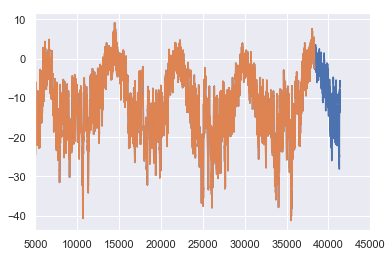

In [16]:
plt.xlim(5000,45000)
plt.plot(temp_values)
plt.plot(df.tempr.values)
plt.show()